<a href="https://colab.research.google.com/github/JohnTong12/JohnTong-projects/blob/main/Predict_Number_Orders_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PREDICTING NUMBER OF ORDERS

In [1]:
## importing Neccessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd
from scipy.stats import ttest_ind , f_oneway , chi2_contingency
from statsmodels.formula.api import ols
import statsmodels as sm
sns.set_theme(color_codes=True)
plt.rcParams['axes.facecolor']='#DCDCDC'
plt.rcParams['axes.grid']=1



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install scikit-posthocs

In [4]:
!pip install category-encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 6.9 MB/s eta 0:00:00


In [5]:
## loading the data
### train data
train_data = pd.read_csv(r"/content/train.csv")
test_data = pd.read_csv(r"/content/test.csv")
meal_data = pd.read_csv(r"/content/meal_info.csv")
centre_info = pd.read_csv(r"/content/fulfilment_center_info.csv")



In [6]:
## dispalying eaach data frame
train_data.head()

id  week  center_id  meal_id  checkout_price  base_price  \
0  1379560     1         55     1885          136.83      152.29   
1  1466964     1         55     1993          136.83      135.83   
2  1346989     1         55     2539          134.86      135.86   
3  1338232     1         55     2139          339.50      437.53   
4  1448490     1         55     2631          243.50      242.50   

   emailer_for_promotion  homepage_featured  num_orders  
0                      0                  0         177  
1                      0                  0         270  
2                      0                  0         189  
3                      0                  0          54  
4                      0                  0          40

In [7]:
## checking trains data shape and info
print(train_data.shape)
print()
print(train_data.info())

(456548, 9)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 31.3 MB
None


In [8]:
## checking for the test data
test_data.head()

id  week  center_id  meal_id  checkout_price  base_price  \
0  1028232   146         55     1885          158.11      159.11   
1  1127204   146         55     1993          160.11      159.11   
2  1212707   146         55     2539          157.14      159.14   
3  1082698   146         55     2631          162.02      162.02   
4  1400926   146         55     1248          163.93      163.93   

   emailer_for_promotion  homepage_featured  
0                      0                  0  
1                      0                  0  
2                      0                  0  
3                      0                  0  
4                      0                  0

In [9]:
## checking for the shape and info
print(test_data.shape)
print()
print(test_data.info())

(32573, 8)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32573 entries, 0 to 32572
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     32573 non-null  int64  
 1   week                   32573 non-null  int64  
 2   center_id              32573 non-null  int64  
 3   meal_id                32573 non-null  int64  
 4   checkout_price         32573 non-null  float64
 5   base_price             32573 non-null  float64
 6   emailer_for_promotion  32573 non-null  int64  
 7   homepage_featured      32573 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 2.0 MB
None


In [10]:
## checking the meals data
meal_data.head()


meal_id   category cuisine
0     1885  Beverages    Thai
1     1993  Beverages    Thai
2     2539  Beverages    Thai
3     1248  Beverages  Indian
4     2631  Beverages  Indian

In [11]:
## checking for the shape and geneeral info
print(meal_data.shape)
print()
print(meal_data.info())

(51, 3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   meal_id   51 non-null     int64 
 1   category  51 non-null     object
 2   cuisine   51 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.3+ KB
None


In [12]:
## displaying the cntre info
centre_info.head()

center_id  city_code  region_code center_type  op_area
0         11        679           56      TYPE_A      3.7
1         13        590           56      TYPE_B      6.7
2        124        590           56      TYPE_C      4.0
3         66        648           34      TYPE_A      4.1
4         94        632           34      TYPE_C      3.6

In [13]:
## checking for the shape of and general info
print(centre_info.shape)
print()
print(centre_info.info())

(77, 5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   center_id    77 non-null     int64  
 1   city_code    77 non-null     int64  
 2   region_code  77 non-null     int64  
 3   center_type  77 non-null     object 
 4   op_area      77 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 3.1+ KB
None


In [14]:
# Mergining the data
merged_data = pd.merge(train_data , meal_data, on='meal_id',how='left')
## printing the merged data
merged_data.shape

(456548, 11)

In [15]:
## checking the hhead
merged_data.head()

id  week  center_id  meal_id  checkout_price  base_price  \
0  1379560     1         55     1885          136.83      152.29   
1  1466964     1         55     1993          136.83      135.83   
2  1346989     1         55     2539          134.86      135.86   
3  1338232     1         55     2139          339.50      437.53   
4  1448490     1         55     2631          243.50      242.50   

   emailer_for_promotion  homepage_featured  num_orders   category cuisine  
0                      0                  0         177  Beverages    Thai  
1                      0                  0         270  Beverages    Thai  
2                      0                  0         189  Beverages    Thai  
3                      0                  0          54  Beverages  Indian  
4                      0                  0          40  Beverages  Indian

In [16]:
### merging the merged data with the centre info
merged_data = pd.merge(merged_data ,centre_info , on='center_id', how='left')
## print the mergedd data
merged_data.head()

id  week  center_id  meal_id  checkout_price  base_price  \
0  1379560     1         55     1885          136.83      152.29   
1  1466964     1         55     1993          136.83      135.83   
2  1346989     1         55     2539          134.86      135.86   
3  1338232     1         55     2139          339.50      437.53   
4  1448490     1         55     2631          243.50      242.50   

   emailer_for_promotion  homepage_featured  num_orders   category cuisine  \
0                      0                  0         177  Beverages    Thai   
1                      0                  0         270  Beverages    Thai   
2                      0                  0         189  Beverages    Thai   
3                      0                  0          54  Beverages  Indian   
4                      0                  0          40  Beverages  Indian   

   city_code  region_code center_type  op_area  
0        647           56      TYPE_C      2.0  
1        647           56      TYPE_C      2.0  
2        647           56      TYPE_C      2.0  
3        647           56      TYPE_C      2.0  
4        647           56      TYPE_C      2.0

In [17]:
## checking the datta columns
merged_data.columns

Index(['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'num_orders', 'category',
       'cuisine', 'city_code', 'region_code', 'center_type', 'op_area'],
      dtype='object')

In [18]:
## print the data tyopes
merged_data.dtypes

id                         int64
week                       int64
center_id                  int64
meal_id                    int64
checkout_price           float64
base_price               float64
emailer_for_promotion      int64
homepage_featured          int64
num_orders                 int64
category                  object
cuisine                   object
city_code                  int64
region_code                int64
center_type               object
op_area                  float64
dtype: object

In [19]:
# ## Handling data types correctly
# merged_data['city_code'] = merged_data['city_code'].astype('str')
# merged_data['region_code'] = merged_data['region_code'].astype('str')
# merged_data['op_area'] = merged_data['op_area'].astype('str')
# merged_data['homepage_featured']= merged_data['homepage_featured'].astype('str')
# merged_data['meal_id'] = merged_data['meal_id'].astype('str')
# merged_data['emailer_for_promotion'] = merged_data['emailer_for_promotion'].astype('str')
# merged_data['center_id']= merged_data['center_id'].astype('str')

In [20]:
merged_data['emailer_for_promotion'].unique()

array([0, 1])

In [21]:
## checking for descriptive statistics
merged_data.describe().T

count          mean            std         min  \
id                     456548.0  1.250096e+06  144354.822378  1000000.00   
week                   456548.0  7.476877e+01      41.524956        1.00   
center_id              456548.0  8.210580e+01      45.975046       10.00   
meal_id                456548.0  2.024337e+03     547.420920     1062.00   
checkout_price         456548.0  3.322389e+02     152.939723        2.97   
base_price             456548.0  3.541566e+02     160.715914       55.35   
emailer_for_promotion  456548.0  8.115247e-02       0.273069        0.00   
homepage_featured      456548.0  1.091999e-01       0.311890        0.00   
num_orders             456548.0  2.618728e+02     395.922798       13.00   
city_code              456548.0  6.015534e+02      66.195914      456.00   
region_code            456548.0  5.661457e+01      17.641306       23.00   
op_area                456548.0  4.083590e+00       1.091686        0.90   

                              25%         50%         75%         max  
id                     1124998.75  1250183.50  1375140.25  1499999.00  
week                        39.00       76.00      111.00      145.00  
center_id                   43.00       76.00      110.00      186.00  
meal_id                   1558.00     1993.00     2539.00     2956.00  
checkout_price             228.95      296.82      445.23      866.27  
base_price                 243.50      310.46      458.87      866.27  
emailer_for_promotion        0.00        0.00        0.00        1.00  
homepage_featured            0.00        0.00        0.00        1.00  
num_orders                  54.00      136.00      324.00    24299.00  
city_code                  553.00      596.00      651.00      713.00  
region_code                 34.00       56.00       77.00       93.00  
op_area                      3.60        4.00        4.50        7.00

#### DATA DISTRIBUTTION FOR NUMERIC VARIABLES

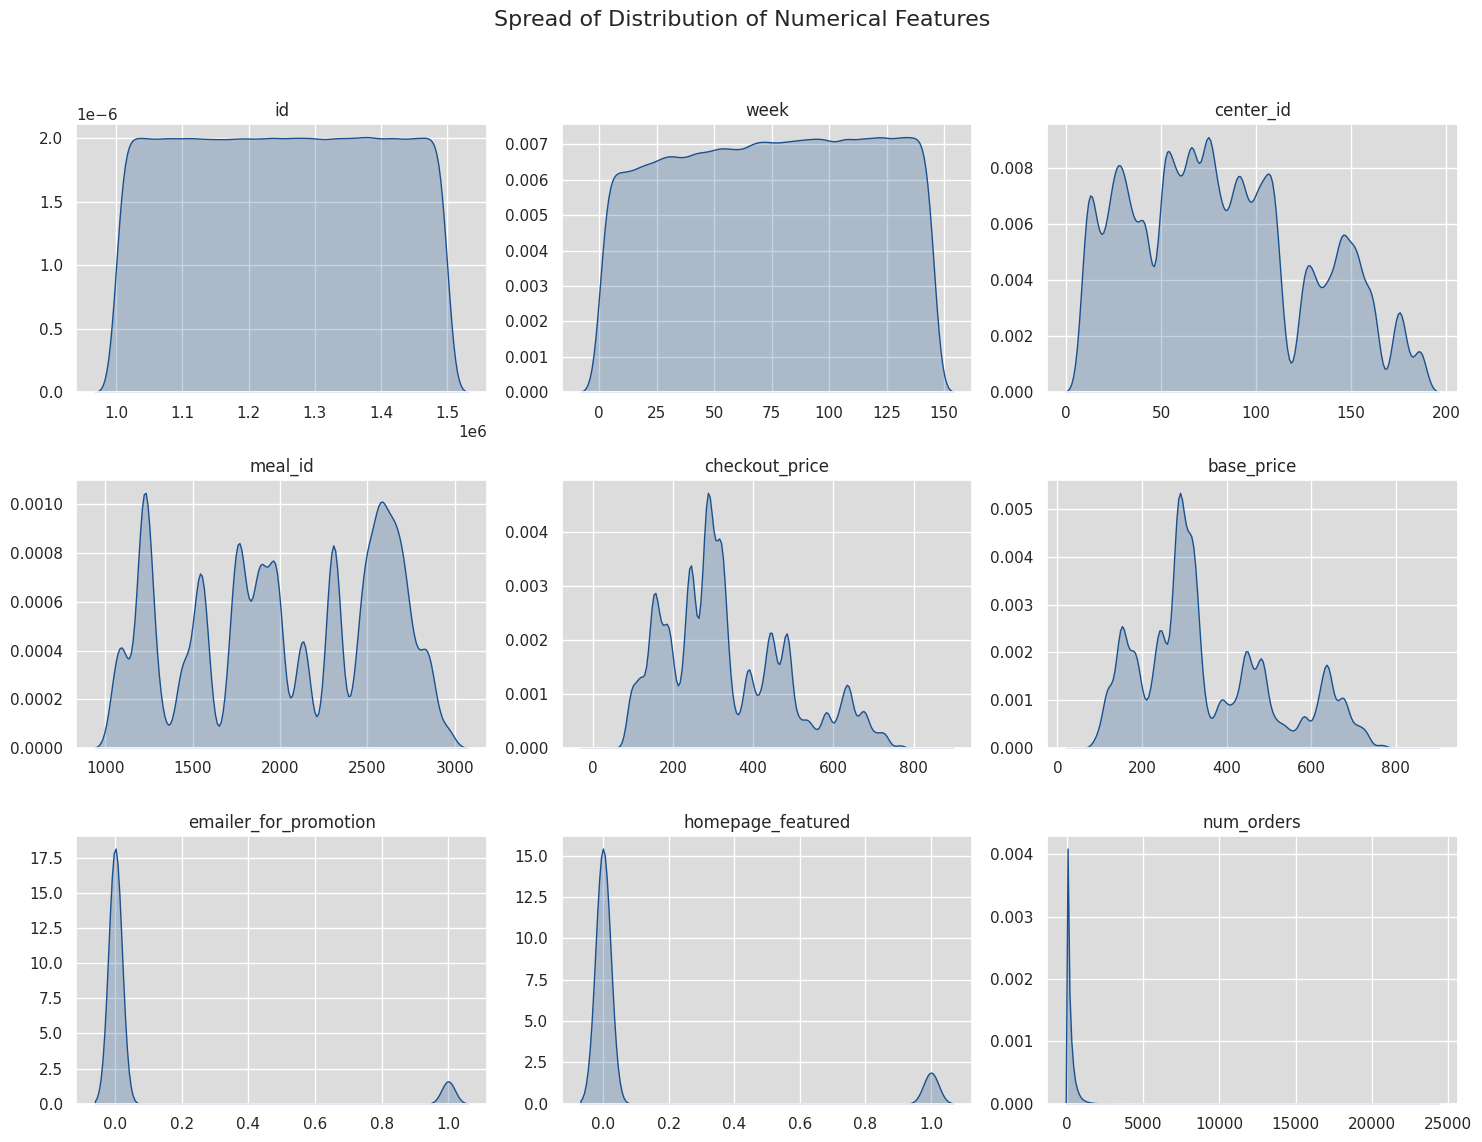

In [22]:
# Generating plots
fig, axes = plt.subplots(3, 3, figsize=(15, 12))  # Adjust number of rows and columns as needed
fig.suptitle('Spread of Distribution of Numerical Features', fontsize=16,fontfamily='verdana')

# Flatten the axes array for easy iteration
axes = axes.flatten()

for i, column in enumerate(merged_data.columns):
    if i < len(axes):  # Ensure we don't try to plot more columns than we have axes for
        sns.kdeplot(merged_data[column], fill=True, ax=axes[i], color='#195190')
        axes[i].set_title(column)
        axes[i].set_xlabel('')
        axes[i].set_ylabel('')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Save and show plot
plt.show()

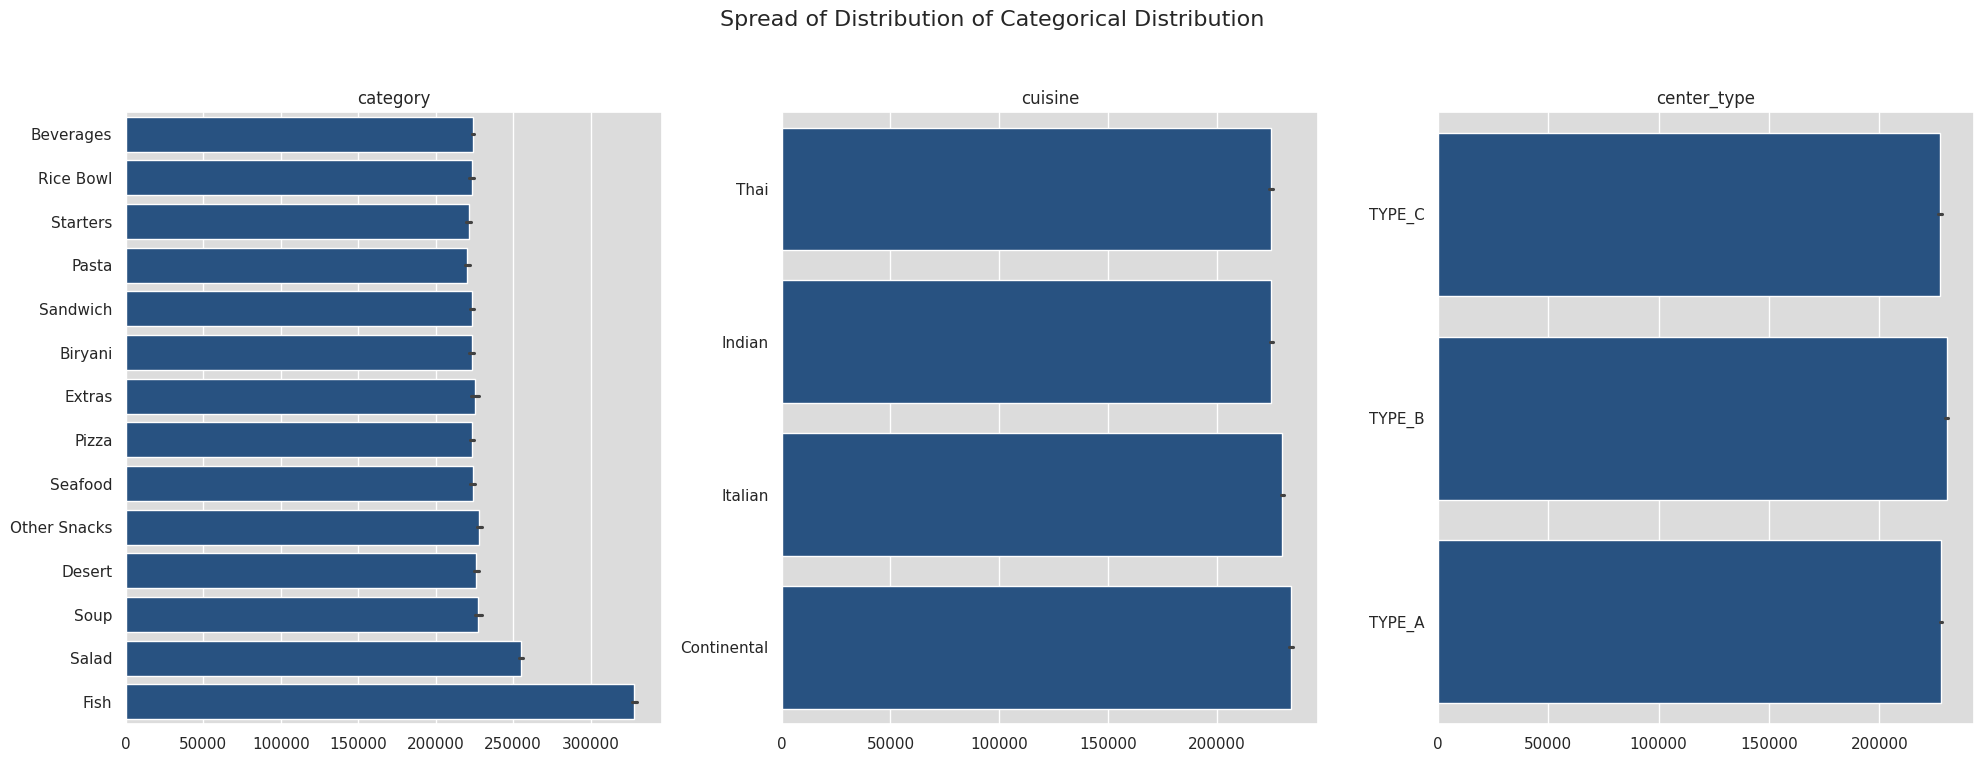

In [23]:
## categorical features
categorical_data = merged_data.select_dtypes(include=['object','category'])
# Generating plots
fig, axes = plt.subplots(1, 3, figsize=(20, 8))  # Adjust number of rows and columns as needed
fig.suptitle('Spread of Distribution of Categorical Distribution', fontsize=16,fontfamily='verdana')

# Flatten the axes array for easy iteration
axes = axes.flatten()

for i, column in enumerate(categorical_data.columns):
    if i < len(axes):  # Ensure we don't try to plot more columns than we have axes for
        sns.barplot(categorical_data[column], ax=axes[i],color='#195190',legend=False)
        axes[i].set_title(column)
        axes[i].set_xlabel('')
        axes[i].set_ylabel('')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Save and show plot
plt.show()


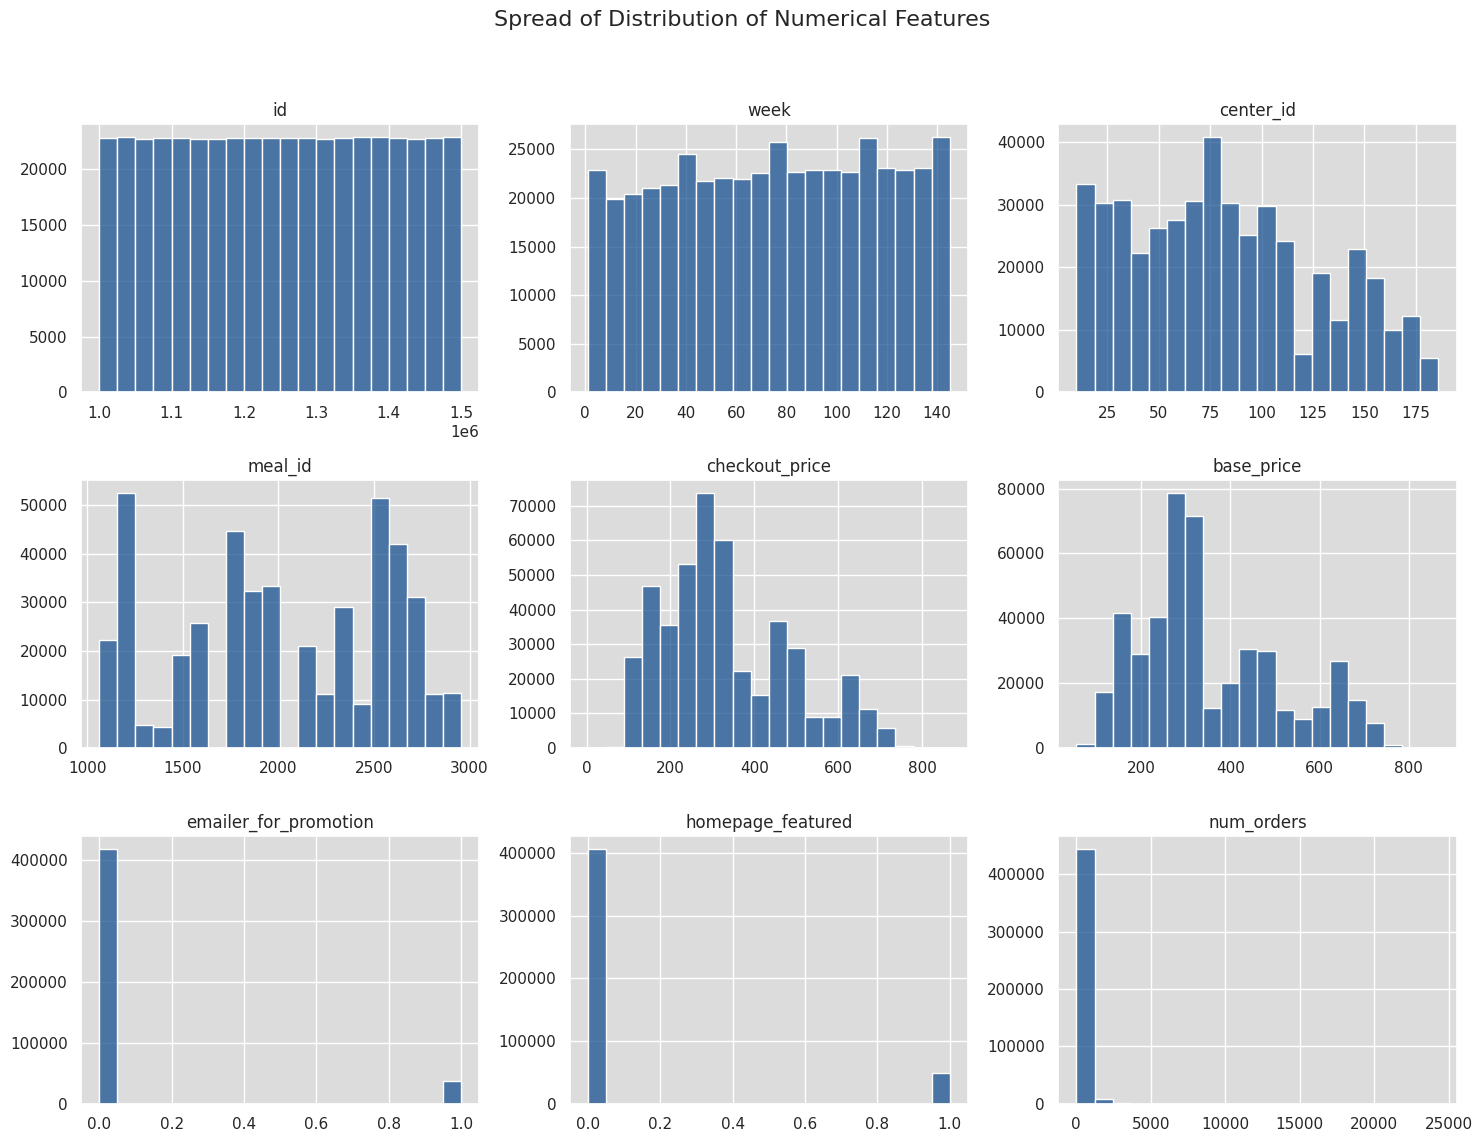

In [24]:
## HISTOGRAMS FOR NUMERICAL DISTRIBUTION
# Generating plots
fig, axes = plt.subplots(3, 3, figsize=(15, 12))  # Adjust number of rows and columns as needed
fig.suptitle('Spread of Distribution of Numerical Features', fontsize=16,fontfamily='verdana')

# Flatten the axes array for easy iteration
axes = axes.flatten()

for i, column in enumerate(merged_data.columns):
    if i < len(axes):  # Ensure we don't try to plot more columns than we have axes for
        sns.histplot(merged_data[column], bins=20,ax=axes[i], color='#195190')
        axes[i].set_title(column)
        axes[i].set_xlabel('')
        axes[i].set_ylabel('')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Save and show plot
plt.show()

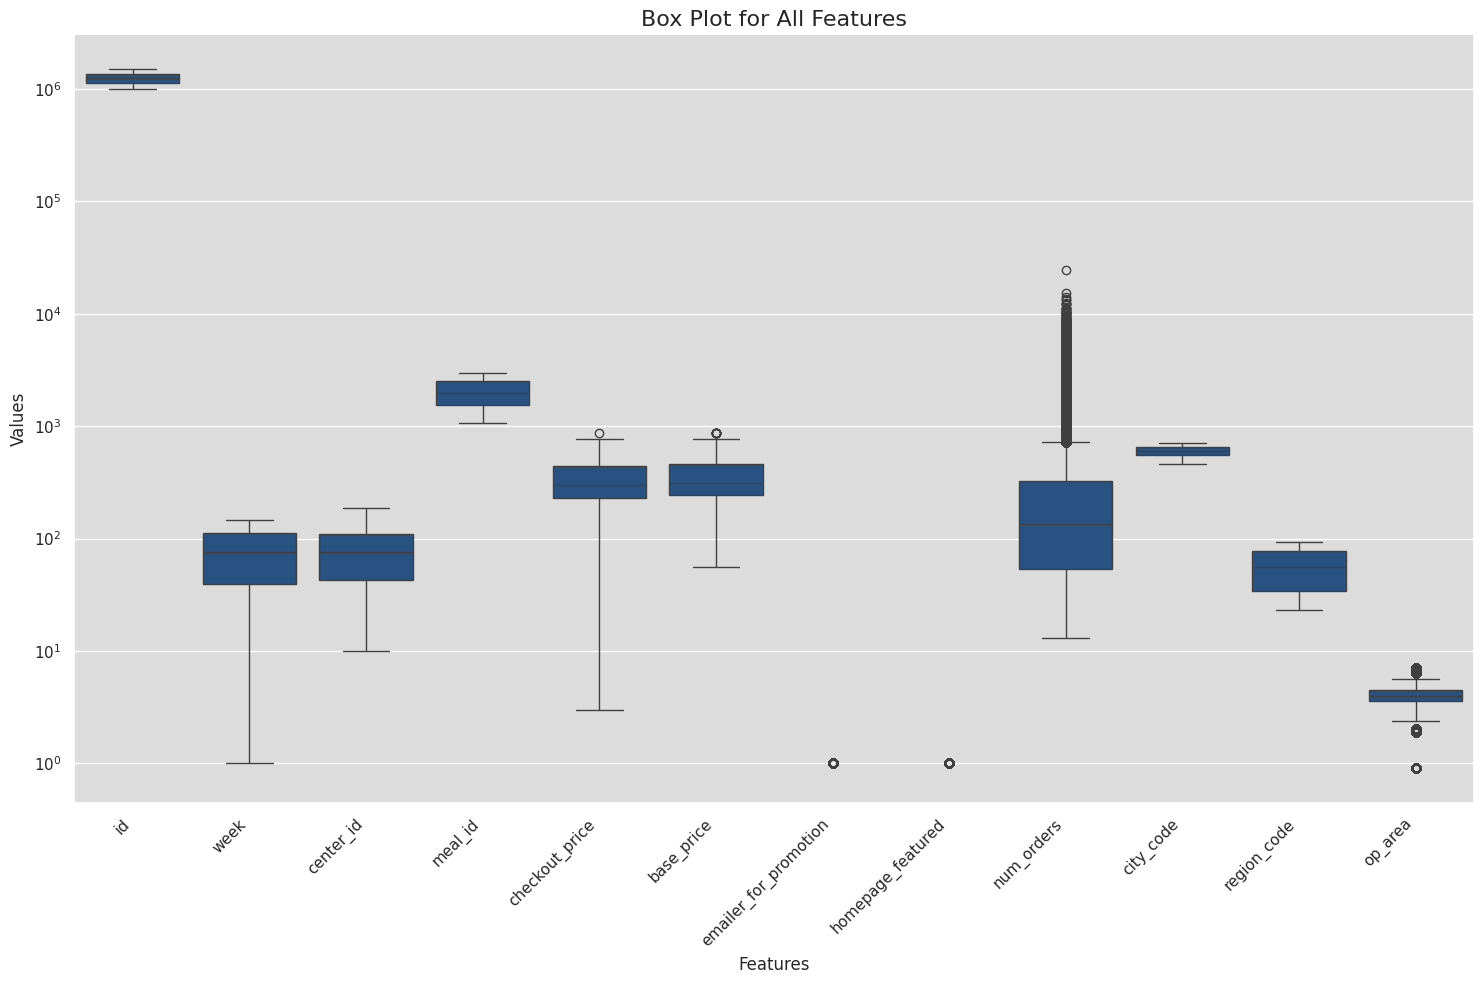

In [25]:
# Creating a boxplot with logarithmic scale for the y-axis
plt.figure(figsize=(15, 10))
ax = sns.boxplot(data=merged_data, color='#195190')

# Set plot title and labels
plt.title('Box Plot for All Features', fontsize=16)
plt.xlabel('Features')
plt.ylabel('Values')

# Set y-axis to logarithmic scale
ax.set_yscale('log')

# Improve layout
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save and show plot
plt.show()

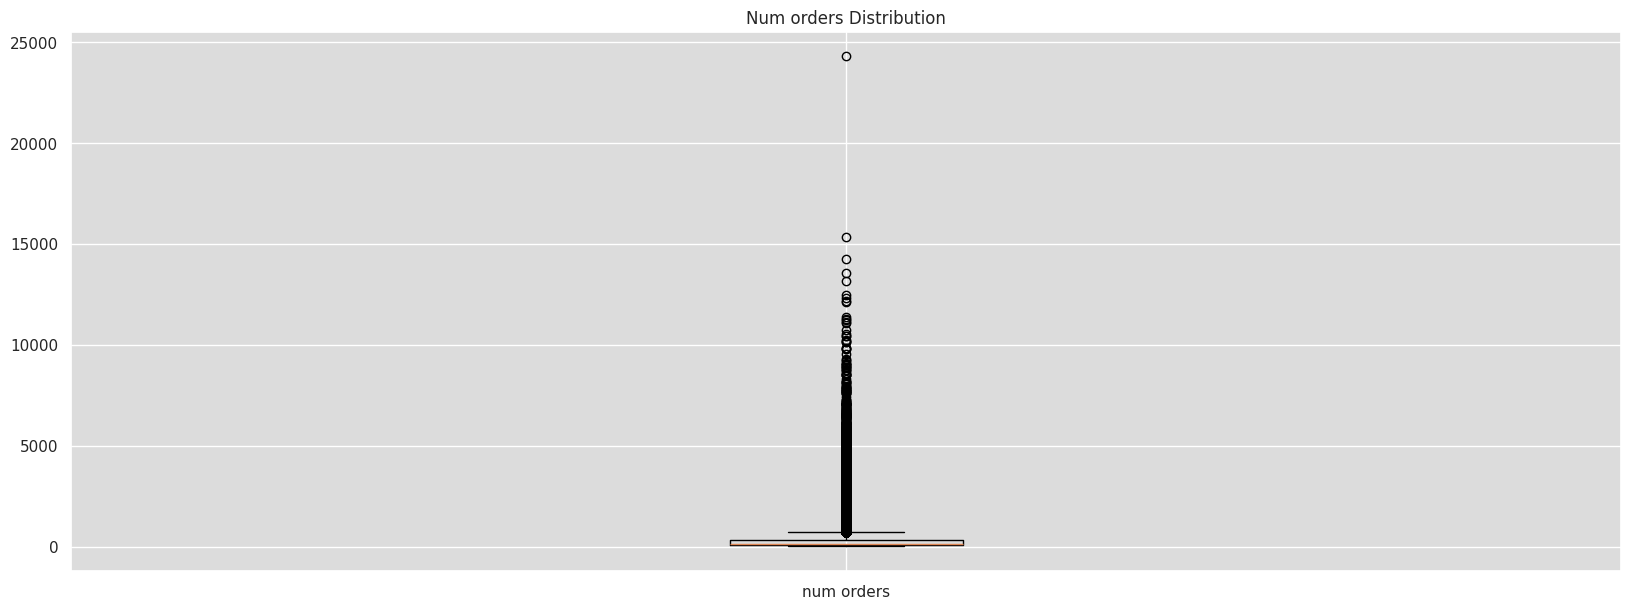

In [26]:
## lets check the distribution of the target variable
plt.figure(figsize=(20,7))
ax = plt.axes()
num_orders = merged_data['num_orders']
ax.boxplot([num_orders],labels=['num orders'])
plt.title('Num orders Distribution')
plt.show()

In [27]:
## checking for discriptive statsis
merged_data['num_orders'].describe().T

count    456548.000000
mean        261.872760
std         395.922798
min          13.000000
25%          54.000000
50%         136.000000
75%         324.000000
max       24299.000000
Name: num_orders, dtype: float64

### Which centers consistently have high or low num_orders? Are there specific regions (city_code or region_code) driving the highest demand?

In [28]:
# Center-level Analysis
center_orders = merged_data.groupby('center_id')['num_orders'].agg(['sum', 'mean']).reset_index()
center_orders.columns = ['center_id', 'total_orders', 'avg_orders_per_week']
center_orders.sort_values(by='total_orders', ascending=False, inplace=True)

# Display top and bottom centers
top_centers = center_orders.head(5)
low_centers = center_orders.tail(5)

print("Top 5 Centers with Highest Orders:")
print(top_centers)

print("\nBottom 5 Centers with Lowest Orders:")
print(low_centers)


Top 5 Centers with Highest Orders:
    center_id  total_orders  avg_orders_per_week
2          13       4296545           609.784984
18         43       3920294           562.452511
0          10       3381018           481.969779
21         52       3125835           446.994852
63        137       3117478           452.201625

Bottom 5 Centers with Lowest Orders:
    center_id  total_orders  avg_orders_per_week
35         74        691044           131.277356
73        162        680255           155.807375
68        149        637527           126.972117
16         41        497338           121.807005
45         91        425160           123.881119


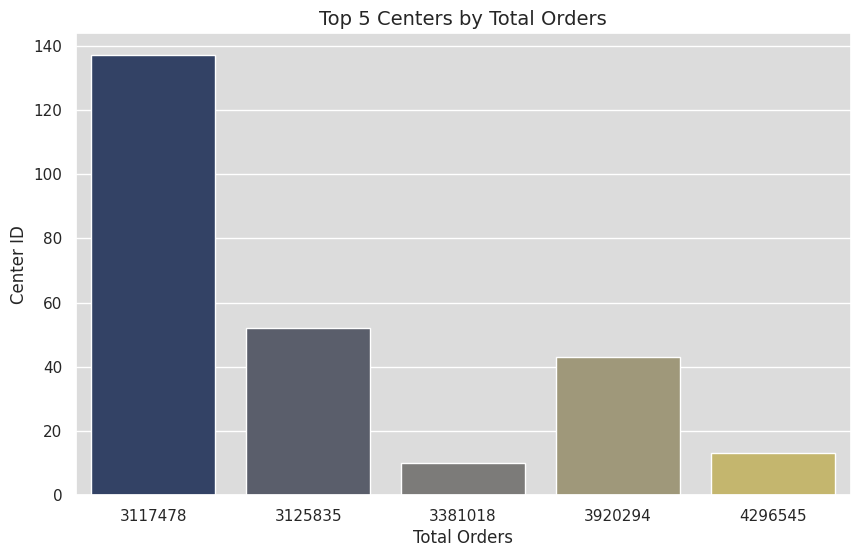

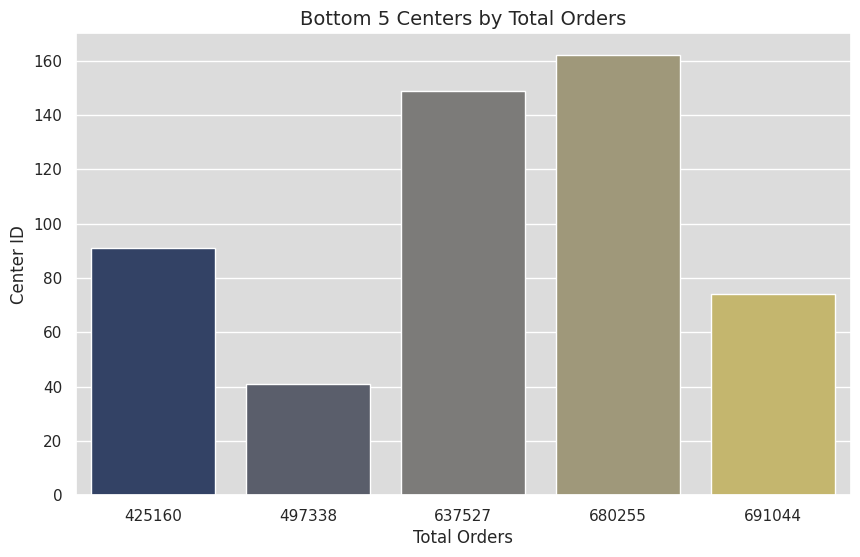

In [29]:
import warnings
warnings.filterwarnings('ignore')

# Top 5 Centers
plt.figure(figsize=(10, 6))
sns.barplot(x='total_orders', y='center_id', data=top_centers, palette='cividis')
plt.title('Top 5 Centers by Total Orders', fontsize=14)
plt.xlabel('Total Orders')
plt.ylabel('Center ID')
plt.show()

# Bottom 5 Centers
plt.figure(figsize=(10, 6))
sns.barplot(x='total_orders', y='center_id', data=low_centers, palette='cividis')
plt.title('Bottom 5 Centers by Total Orders', fontsize=14)
plt.xlabel('Total Orders')
plt.ylabel('Center ID')
plt.show()


In [30]:
# Region and City-level Analysis
region_orders = merged_data.groupby('region_code')['num_orders'].agg(['sum', 'mean']).reset_index()
region_orders.columns = ['region_code', 'total_orders', 'avg_orders_per_week']
region_orders.sort_values(by='total_orders', ascending=False, inplace=True)

city_orders = merged_data.groupby('city_code')['num_orders'].agg(['sum', 'mean']).reset_index()
city_orders.columns = ['city_code', 'total_orders', 'avg_orders_per_week']
city_orders.sort_values(by='total_orders', ascending=False, inplace=True)

# Display top regions and cities
print("Top 5 Regions with Highest Demand:")
print(region_orders.head(5))

print("\nTop 5 Cities with Highest Demand:")
print(city_orders.head(5))


Top 5 Regions with Highest Demand:
   region_code  total_orders  avg_orders_per_week
3           56      60520191           316.481849
1           34      24051733           206.075870
5           77      20529653           216.987835
6           85       8685386           286.807318
4           71       2103282           334.225648

Top 5 Cities with Highest Demand:
    city_code  total_orders  avg_orders_per_week
17        590      19849062           362.566434
8         526       9207953           211.555497
29        638       6662450           332.341497
22        604       3533367           270.507350
7         522       3375905           250.828813


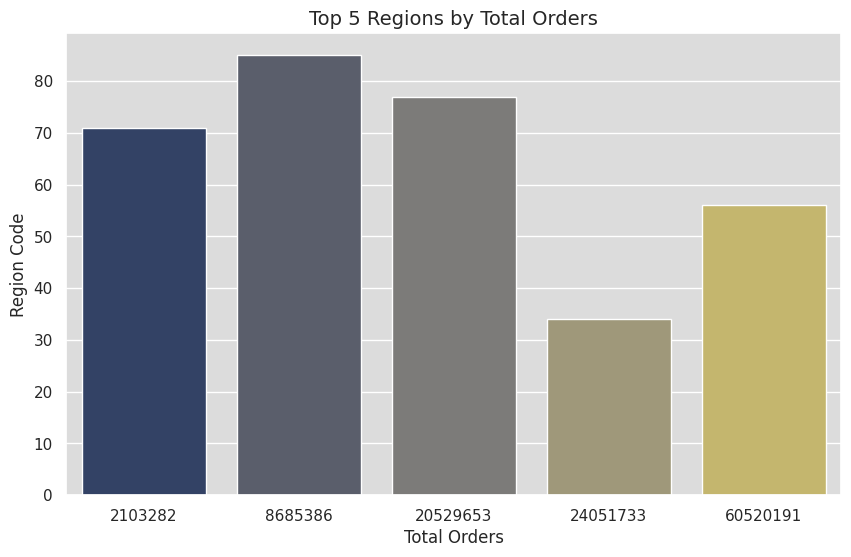

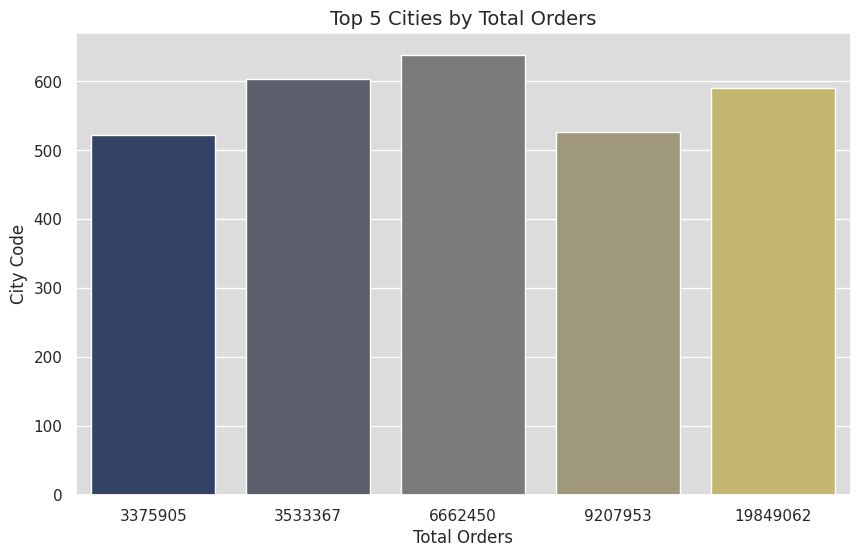

In [31]:
# Top Regions
plt.figure(figsize=(10, 6))
sns.barplot(x='total_orders', y='region_code', data=region_orders.head(5), palette='cividis')
plt.title('Top 5 Regions by Total Orders', fontsize=14)
plt.xlabel('Total Orders')
plt.ylabel('Region Code')
plt.show()

# Top Cities
plt.figure(figsize=(10, 6))
sns.barplot(x='total_orders', y='city_code', data=city_orders.head(5), palette='cividis')
plt.title('Top 5 Cities by Total Orders', fontsize=14)
plt.xlabel('Total Orders')
plt.ylabel('City Code')
plt.show()


In [32]:
# Weekly consistency
center_weekly_std = merged_data.groupby('center_id')['num_orders'].std().reset_index()
center_weekly_std.columns = ['center_id', 'order_std_dev']
center_weekly_std.sort_values(by='order_std_dev', inplace=True)

print("Centers with the Most Consistent Demand:")
print(center_weekly_std.head(5))

print("\nCenters with the Most Volatile Demand:")
print(center_weekly_std.tail(5))


Centers with the Most Consistent Demand:
    center_id  order_std_dev
35         74     147.165513
45         91     150.533573
68        149     153.194944
72        161     172.940572
16         41     185.332035

Centers with the Most Volatile Demand:
    center_id  order_std_dev
50         99     563.061248
74        174     567.552153
63        137     661.147388
2          13     731.416171
18         43     883.001044


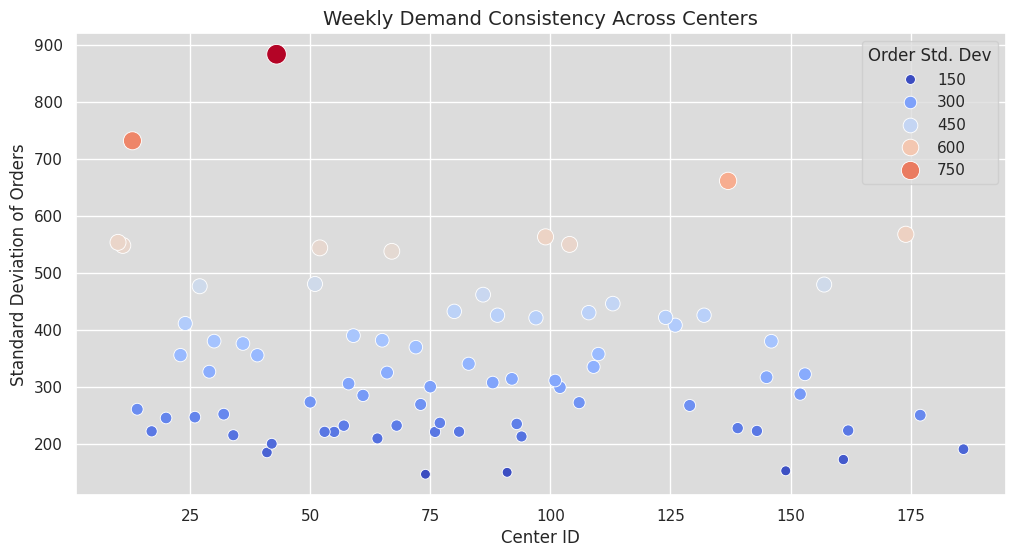

In [33]:
# Consistency Plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x='center_id', y='order_std_dev', data=center_weekly_std, hue='order_std_dev', palette='coolwarm', size='order_std_dev', sizes=(50, 200))
plt.title('Weekly Demand Consistency Across Centers', fontsize=14)
plt.xlabel('Center ID')
plt.ylabel('Standard Deviation of Orders')
plt.legend(title='Order Std. Dev')
plt.show()


## How does num_orders vary across different center_types (e.g., TYPE_A vs. TYPE_C)?

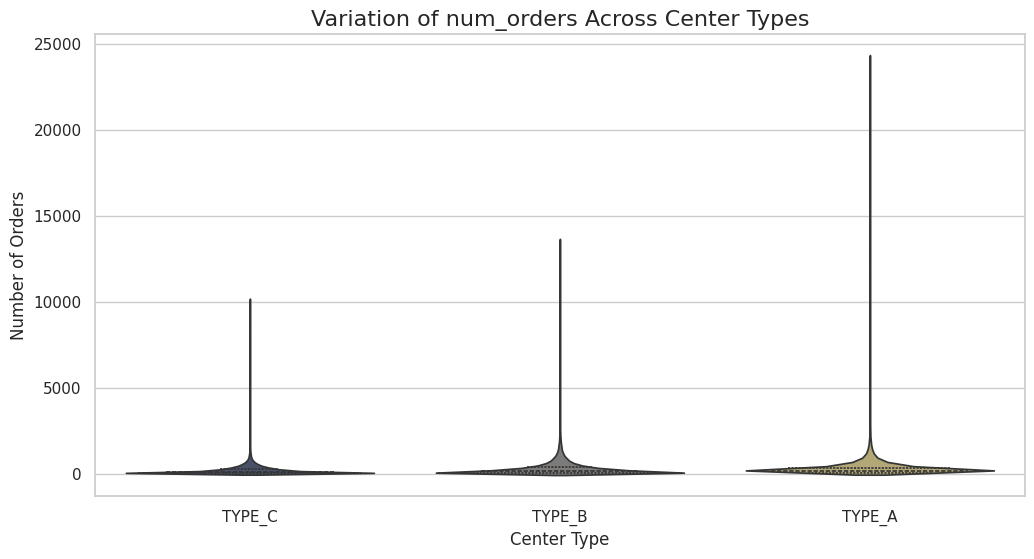

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Violin Plot for num_orders across center_type
plt.figure(figsize=(12, 6))
sns.violinplot(x='center_type', y='num_orders', data=merged_data, palette='cividis', scale='count', inner='quartile')

# Add titles and labels
plt.title('Variation of num_orders Across Center Types', fontsize=16)
plt.xlabel('Center Type', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.show()


## How does the difference between checkout_price and base_price impact num_orders? Can we see a clear relationship where higher discounts boost orders?

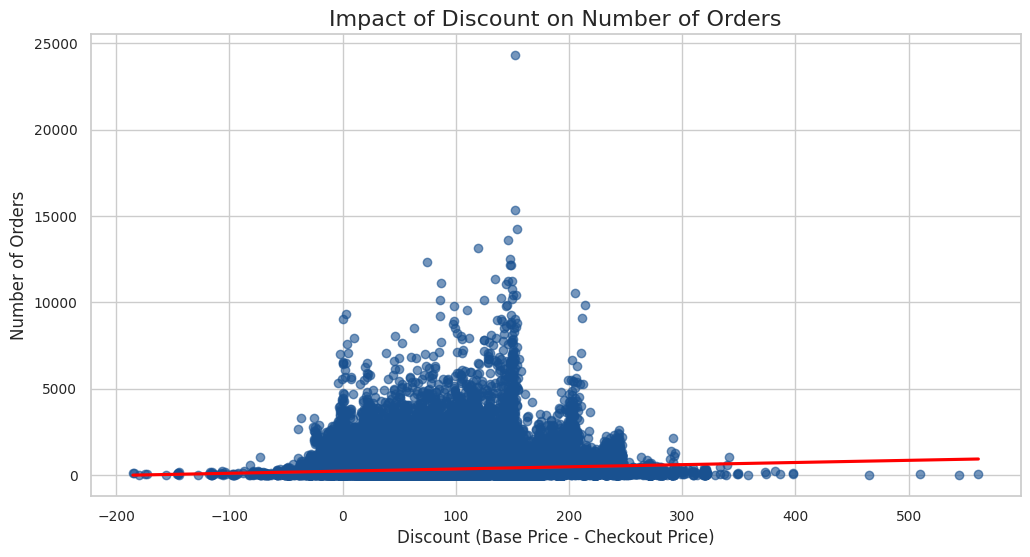

In [35]:
# Calculate the discount
merged_data['discount'] = merged_data['base_price'] - merged_data['checkout_price']

# Scatter plot with regression line to visualize the relationship
plt.figure(figsize=(12, 6))
sns.regplot(
    x='discount',
    y='num_orders',
    data=merged_data,
    scatter_kws={'alpha': 0.6},
    line_kws={'color': 'red'},
    color='#195190'
)

# Add titles and labels
plt.title('Impact of Discount on Number of Orders', fontsize=16)
plt.xlabel('Discount (Base Price - Checkout Price)', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Show plot
plt.show()


In [36]:
import numpy as np
from scipy.stats import pearsonr, spearmanr

In [37]:
# Correlation coefficients
pearson_corr, _ = pearsonr(merged_data['discount'], merged_data['num_orders'])
spearman_corr, _ = spearmanr(merged_data['discount'], merged_data['num_orders'])

print(f"Pearson Correlation: {pearson_corr:.2f}")
print(f"Spearman Correlation: {spearman_corr:.2f}")

Pearson Correlation: 0.15
Spearman Correlation: 0.11


## Do certain meal categories or cuisines see a higher lift in orders when discounts are applied?

In [38]:
merged_data

id  week  center_id  meal_id  checkout_price  base_price  \
0       1379560     1         55     1885          136.83      152.29   
1       1466964     1         55     1993          136.83      135.83   
2       1346989     1         55     2539          134.86      135.86   
3       1338232     1         55     2139          339.50      437.53   
4       1448490     1         55     2631          243.50      242.50   
...         ...   ...        ...      ...             ...         ...   
456543  1271326   145         61     1543          484.09      484.09   
456544  1062036   145         61     2304          482.09      482.09   
456545  1110849   145         61     2664          237.68      321.07   
456546  1147725   145         61     2569          243.50      313.34   
456547  1361984   145         61     2490          292.03      290.03   

        emailer_for_promotion  homepage_featured  num_orders   category  \
0                           0                  0         177  Beverages   
1                           0                  0         270  Beverages   
2                           0                  0         189  Beverages   
3                           0                  0          54  Beverages   
4                           0                  0          40  Beverages   
...                       ...                ...         ...        ...   
456543                      0                  0          68     Desert   
456544                      0                  0          42     Desert   
456545                      0                  0         501      Salad   
456546                      0                  0         729      Salad   
456547                      0                  0         162      Salad   

        cuisine  city_code  region_code center_type  op_area  discount  
0          Thai        647           56      TYPE_C      2.0     15.46  
1          Thai        647           56      TYPE_C      2.0     -1.00  
2          Thai        647           56      TYPE_C      2.0      1.00  
3        Indian        647           56      TYPE_C      2.0     98.03  
4        Indian        647           56      TYPE_C      2.0     -1.00  
...         ...        ...          ...         ...      ...       ...  
456543   Indian        473           77      TYPE_A      4.5      0.00  
456544   Indian        473           77      TYPE_A      4.5      0.00  
456545  Italian        473           77      TYPE_A      4.5     83.39  
456546  Italian        473           77      TYPE_A      4.5     69.84  
456547  Italian        473           77      TYPE_A      4.5     -2.00  

[456548 rows x 16 columns]

## Is there a weekly trend in num_orders? Are certain weeks consistently busier across the dataset? Visualize order trends over time to see if there’s seasonality.

In [39]:
# Aggregate total orders by week
weekly_orders = (
    merged_data.groupby('week')['num_orders']
    .sum()
    .reset_index()
    .rename(columns={'num_orders': 'total_orders'})
)

# Preview the weekly order data
print("Weekly Total Orders:")
print(weekly_orders.head())


Weekly Total Orders:
   week  total_orders
0     1        792261
1     2        787084
2     3        695262
3     4        743529
4     5       1198675


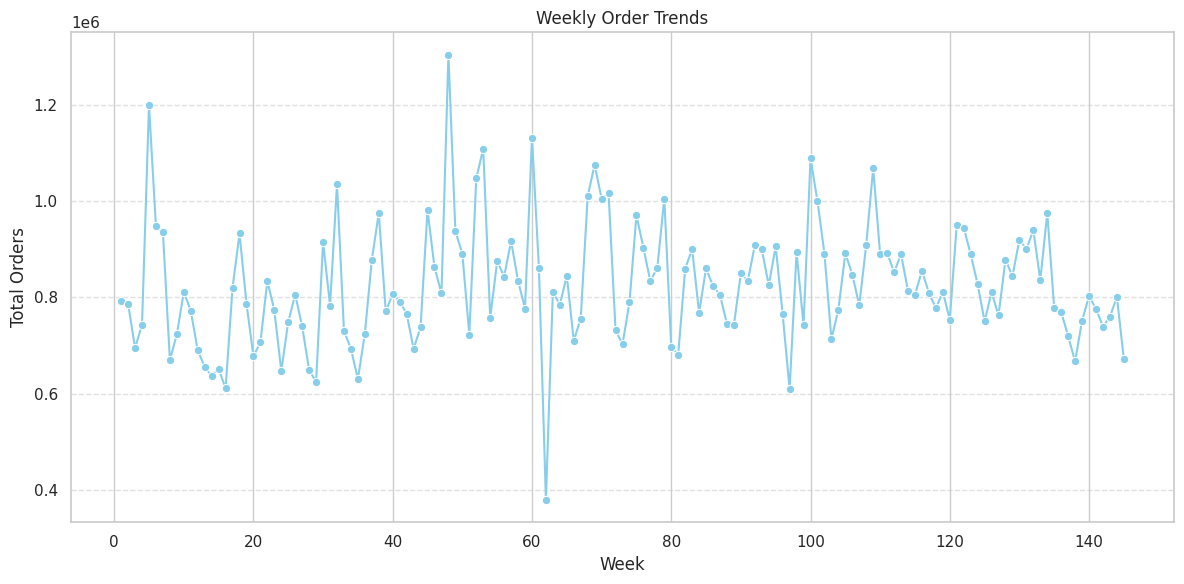

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot total orders over weeks
plt.figure(figsize=(12, 6))
sns.lineplot(data=weekly_orders, x='week', y='total_orders', marker='o', color='skyblue')
plt.title('Weekly Order Trends')
plt.xlabel('Week')
plt.ylabel('Total Orders')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [41]:
# Identify weeks with highest and lowest orders
highest_orders = weekly_orders.nlargest(5, 'total_orders')
lowest_orders = weekly_orders.nsmallest(5, 'total_orders')

print("\nWeeks with Highest Orders:")
print(highest_orders)

print("\nWeeks with Lowest Orders:")
print(lowest_orders)



Weeks with Highest Orders:
    week  total_orders
47    48       1303457
4      5       1198675
59    60       1131459
52    53       1108236
99   100       1088162

Weeks with Lowest Orders:
    week  total_orders
61    62        380065
96    97        609977
15    16        611515
28    29        625414
34    35        630458


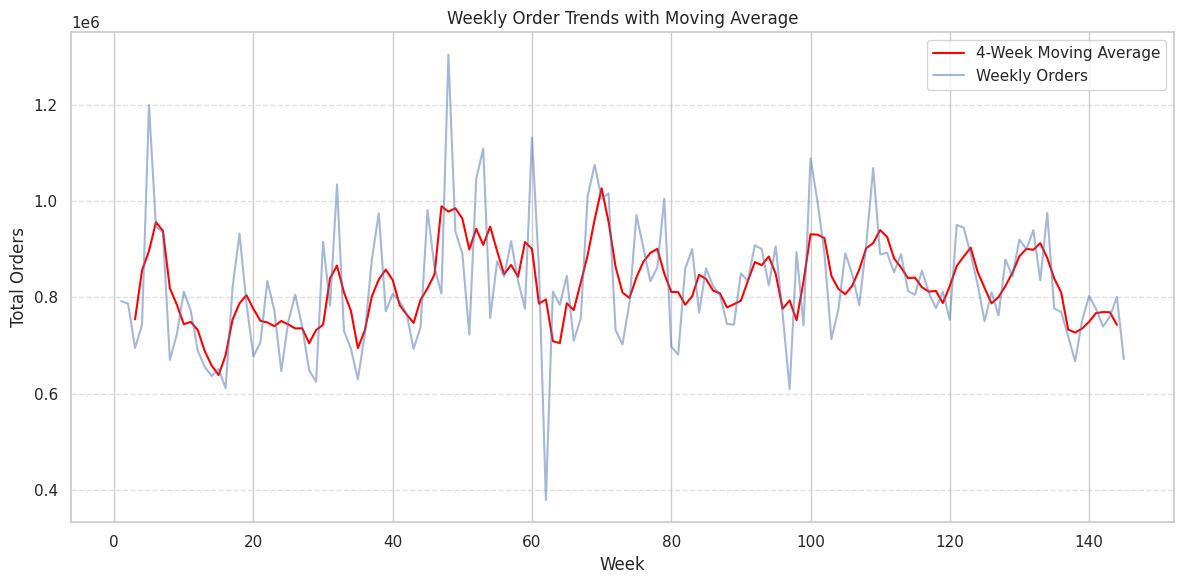

In [42]:
# Add a moving average column for smoothing
weekly_orders['moving_avg'] = weekly_orders['total_orders'].rolling(window=4, center=True).mean()

# Plot smoothed trend
plt.figure(figsize=(12, 6))
sns.lineplot(data=weekly_orders, x='week', y='moving_avg', color='red', label='4-Week Moving Average')
sns.lineplot(data=weekly_orders, x='week', y='total_orders', alpha=0.5, label='Weekly Orders')
plt.title('Weekly Order Trends with Moving Average')
plt.xlabel('Week')
plt.ylabel('Total Orders')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


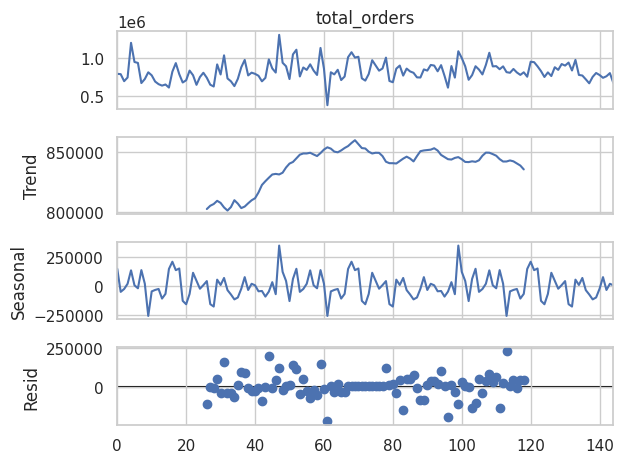

In [43]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
decomposition = seasonal_decompose(weekly_orders['total_orders'], model='additive', period=52)

# Plot decomposition
decomposition.plot()
plt.tight_layout()
plt.show()


## Do checkout_price and base_price fluctuate over time, and do these fluctuations correspond with changes in num_orders?

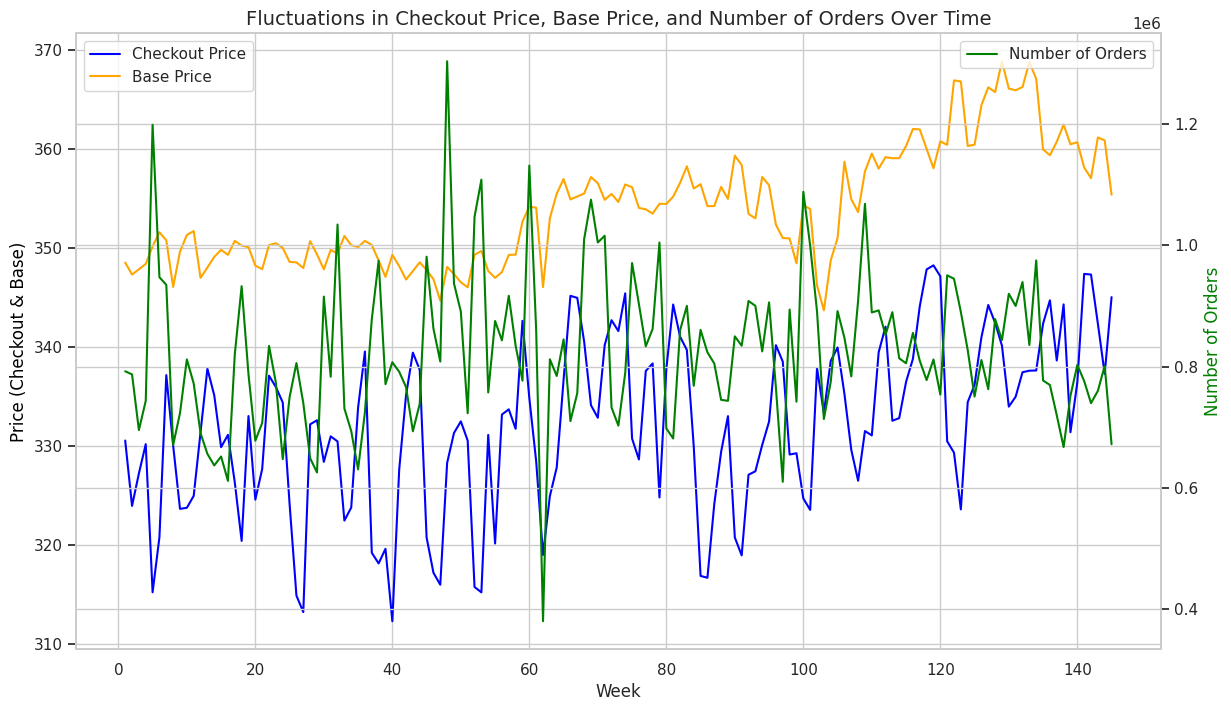

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Aggregate data by week to analyze trends
pricing_trends = (
    merged_data.groupby('week')
    .agg({
        'checkout_price': 'mean',  # Average checkout price per week
        'base_price': 'mean',      # Average base price per week
        'num_orders': 'sum'        # Total number of orders per week
    })
    .reset_index()
)

# Step 2: Plot time-series trends
plt.figure(figsize=(14, 8))

# Checkout and Base Price Trends
sns.lineplot(
    x='week', y='checkout_price', data=pricing_trends, label='Checkout Price', color='blue'
)
sns.lineplot(
    x='week', y='base_price', data=pricing_trends, label='Base Price', color='orange'
)

# Overlay with Num Orders (scaled for visualization)
ax = plt.gca()  # Get the current axis
ax2 = ax.twinx()  # Create a secondary y-axis
sns.lineplot(
    x='week', y='num_orders', data=pricing_trends, label='Number of Orders', color='green', ax=ax2
)

# Step 3: Add Labels and Legends
ax.set_xlabel('Week', fontsize=12)
ax.set_ylabel('Price (Checkout & Base)', fontsize=12, color='black')
ax2.set_ylabel('Number of Orders', fontsize=12, color='green')
ax.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.title('Fluctuations in Checkout Price, Base Price, and Number of Orders Over Time', fontsize=14)
plt.show()


Correlation Matrix:
                checkout_price  base_price  num_orders
checkout_price        1.000000    0.443899   -0.212637
base_price            0.443899    1.000000    0.167107
num_orders           -0.212637    0.167107    1.000000


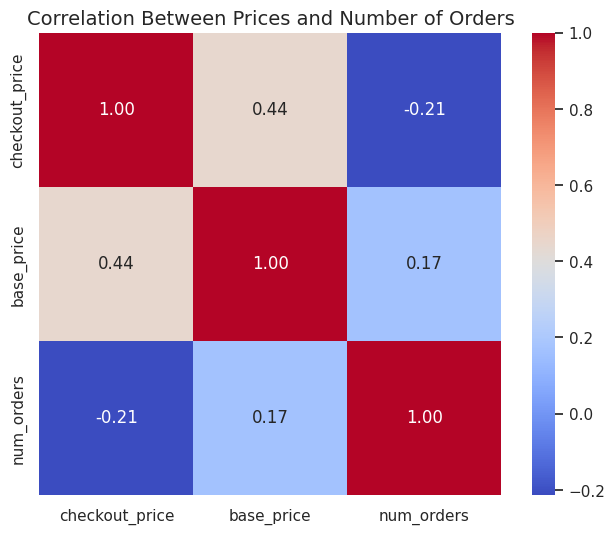

In [45]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Aggregate data by week
aggregated_data = (
    merged_data.groupby('week')
    .agg({
        'checkout_price': 'mean',
        'base_price': 'mean',
        'num_orders': 'sum'
    })
    .reset_index()
)

# Step 2: Calculate correlations
correlation_matrix = aggregated_data[['checkout_price', 'base_price', 'num_orders']].corr()

# Step 3: Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Step 4: Visualize correlations using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    cbar=True,
    square=True
)
plt.title("Correlation Between Prices and Number of Orders", fontsize=14)
plt.show()


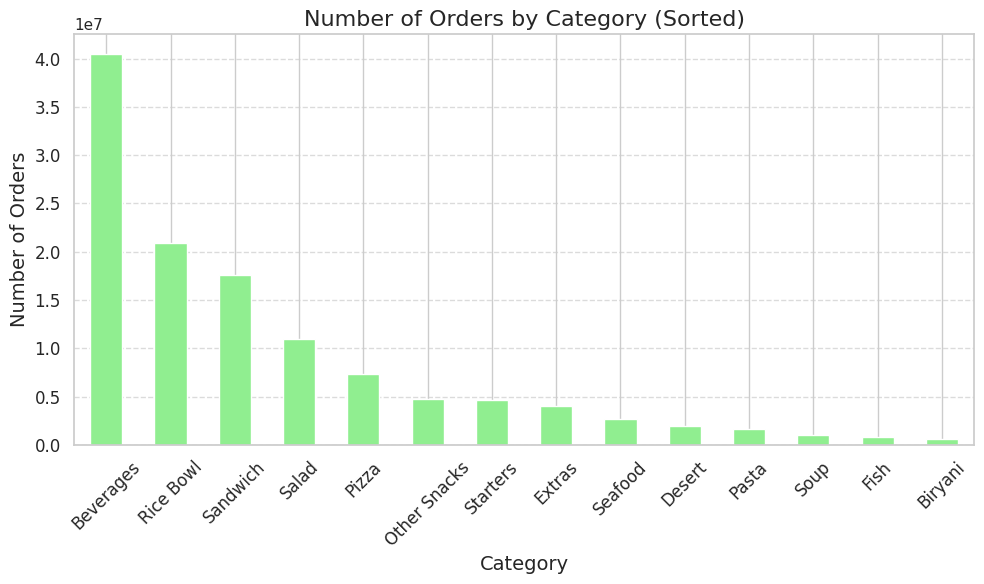

In [46]:
# Group by category and sum up the number of orders for each category
category_order_counts = merged_data.groupby('category')['num_orders'].sum()

# Sort the categories by the total number of orders in descending order
category_order_counts_sorted = category_order_counts.sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
category_order_counts_sorted.plot(kind='bar', color='lightgreen')
plt.title('Number of Orders by Category (Sorted)', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Number of Orders', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

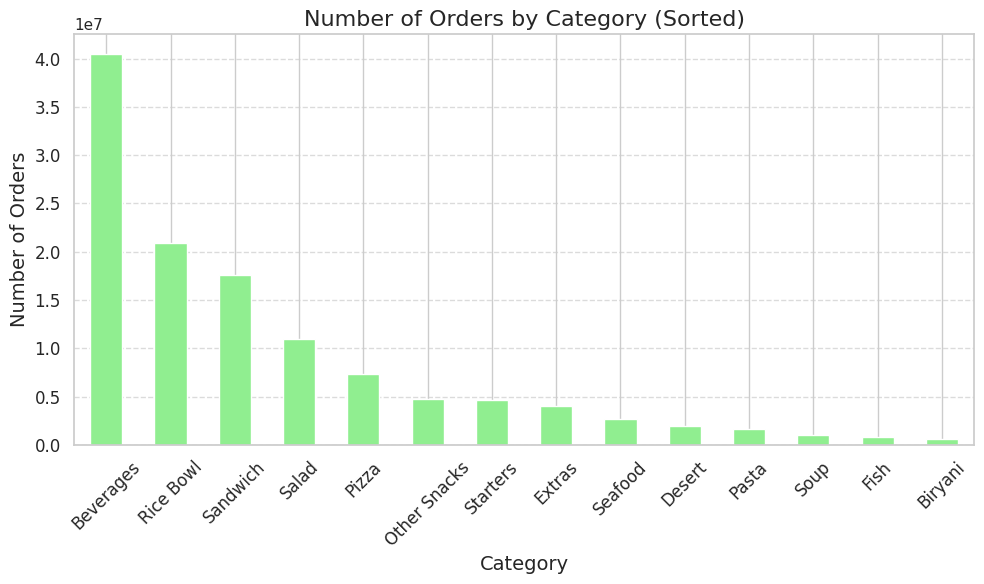

In [47]:
# Group by category and sum up the number of orders for each category
category_order_counts = merged_data.groupby('category')['num_orders'].sum()

# Sort the categories by the total number of orders in descending order
category_order_counts_sorted = category_order_counts.sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
category_order_counts_sorted.plot(kind='bar', color='lightgreen')
plt.title('Number of Orders by Category (Sorted)', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Number of Orders', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

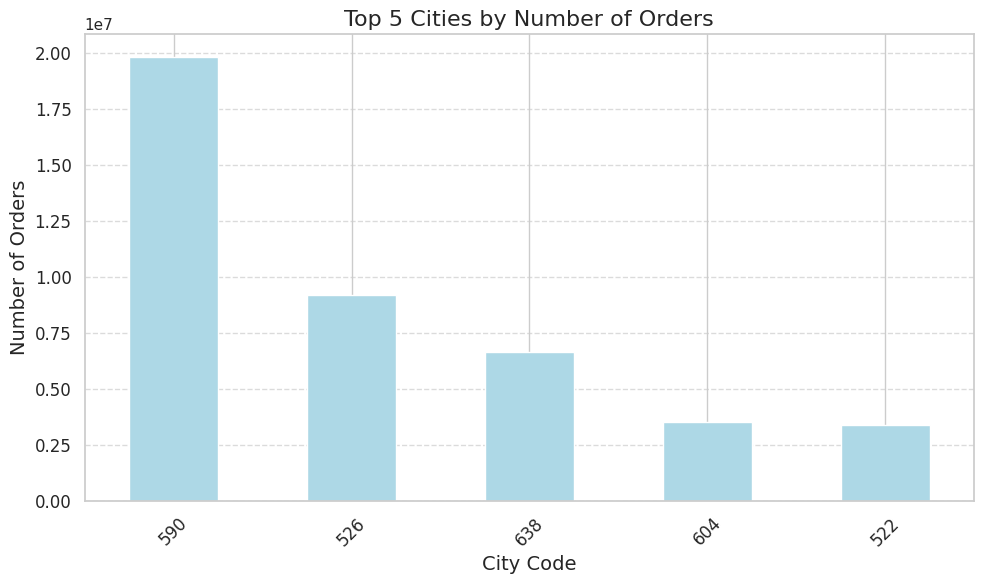

In [48]:
# Group by city_code and sum up the number of orders for each city
city_order_counts = merged_data.groupby('city_code')['num_orders'].sum()

# Select the top 5 cities with the highest number of orders
top_5_cities = city_order_counts.nlargest(5)

# Plotting
plt.figure(figsize=(10, 6))
top_5_cities.plot(kind='bar', color='lightblue')
plt.title('Top 5 Cities by Number of Orders', fontsize=16)
plt.xlabel('City Code', fontsize=14)
plt.ylabel('Number of Orders', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## What effect, if any, do emailer_for_promotion and homepage_featured have on order volume? Are certain meal categories or cuisines more responsive to promotions?

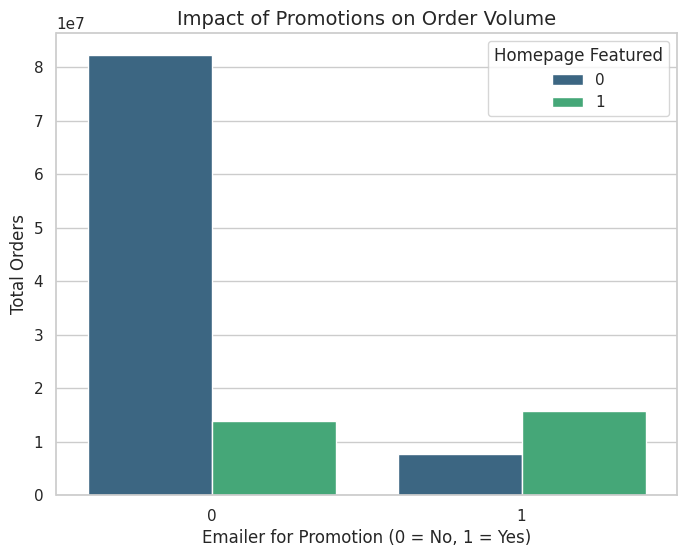

In [49]:
# Group data by promotional features
promo_impact = (
    merged_data.groupby(['emailer_for_promotion', 'homepage_featured'])
    .agg({'num_orders': 'sum'})
    .reset_index()
)

# Visualize the impact
plt.figure(figsize=(8, 6))
sns.barplot(
    data=promo_impact,
    x='emailer_for_promotion',
    y='num_orders',
    hue='homepage_featured',
    palette='viridis'
)
plt.title("Impact of Promotions on Order Volume", fontsize=14)
plt.xlabel("Emailer for Promotion (0 = No, 1 = Yes)", fontsize=12)
plt.ylabel("Total Orders", fontsize=12)
plt.legend(title="Homepage Featured")
plt.show()


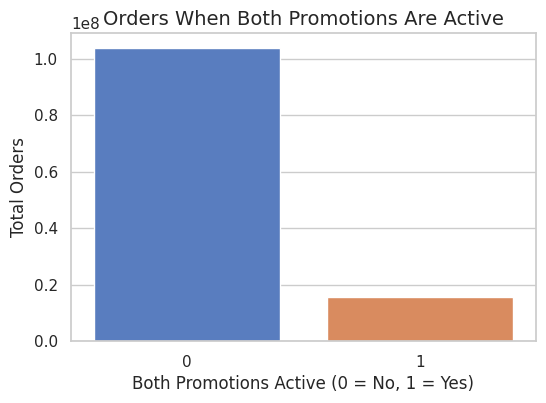

In [50]:
# Create a combined feature for interaction analysis
merged_data['both_promotions'] = (
    (merged_data['emailer_for_promotion'] == 1) &
    (merged_data['homepage_featured'] == 1)
).astype(int)

# Compare orders for both promotions vs. individual ones
interaction_impact = (
    merged_data.groupby('both_promotions')
    .agg({'num_orders': 'sum'})
    .reset_index()
)

# Visualization
plt.figure(figsize=(6, 4))
sns.barplot(
    data=interaction_impact,
    x='both_promotions',
    y='num_orders',
    palette='muted'
)
plt.title("Orders When Both Promotions Are Active", fontsize=14)
plt.xlabel("Both Promotions Active (0 = No, 1 = Yes)", fontsize=12)
plt.ylabel("Total Orders", fontsize=12)
plt.show()


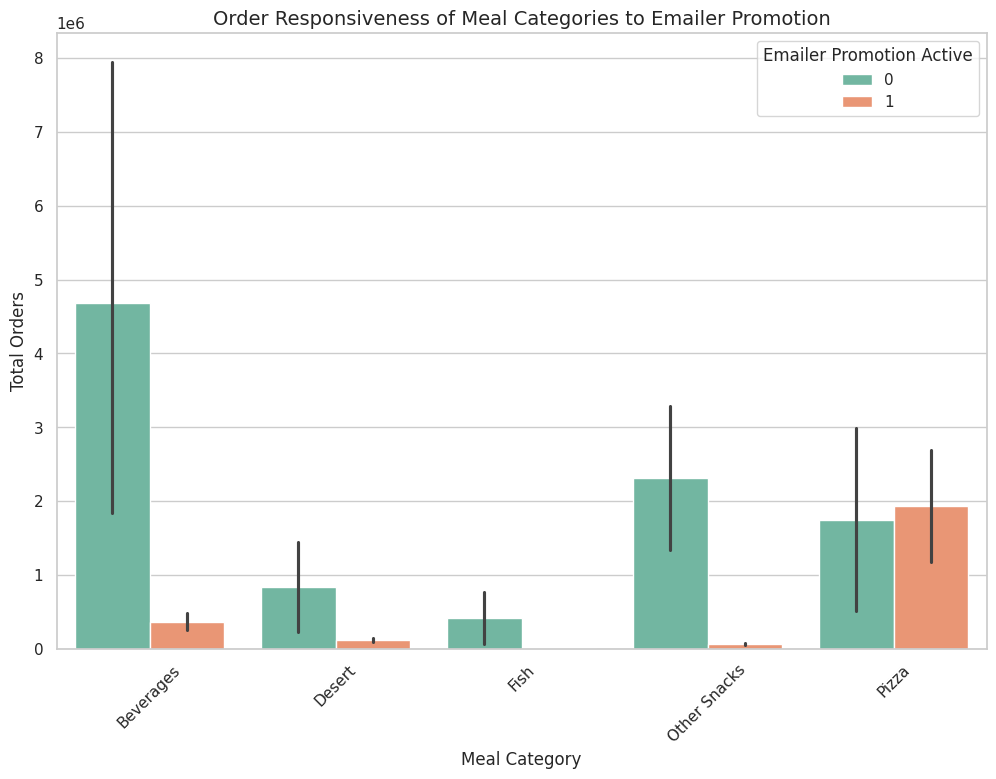

In [51]:
# Group data by promotions, category, and cuisine
promo_category_cuisine = (
    merged_data.groupby(['emailer_for_promotion', 'homepage_featured', 'category', 'cuisine'])
    .agg({'num_orders': 'sum'})
    .reset_index()
)

# Visualize responsiveness for top categories/cuisines
top_categories = promo_category_cuisine['category'].value_counts().index[:5]
filtered_data = promo_category_cuisine[promo_category_cuisine['category'].isin(top_categories)]

plt.figure(figsize=(12, 8))
sns.barplot(
    data=filtered_data,
    x='category',
    y='num_orders',
    hue='emailer_for_promotion',
    palette='Set2'
)
plt.title("Order Responsiveness of Meal Categories to Emailer Promotion", fontsize=14)
plt.xlabel("Meal Category", fontsize=12)
plt.ylabel("Total Orders", fontsize=12)
plt.legend(title="Emailer Promotion Active")
plt.xticks(rotation=45)
plt.show()


## Is there a synergy effect when both emailer_for_promotion and homepage_featured are active? Does the combination result in a higher order count than each promotion alone?

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [53]:
# Step 1: Descriptive Statistics
# Calculate average and median order counts for each promotion combination
promotion_effect = merged_data.groupby(['emailer_for_promotion', 'homepage_featured'])['num_orders'].agg(['mean', 'median']).reset_index()
print("Descriptive Statistics for Order Volume by Promotion Type:")
print(promotion_effect)


Descriptive Statistics for Order Volume by Promotion Type:
   emailer_for_promotion  homepage_featured        mean  median
0                      0                  0  211.416983   122.0
1                      0                  1  455.876208   258.0
2                      1                  0  431.277625   229.0
3                      1                  1  816.246061   474.0


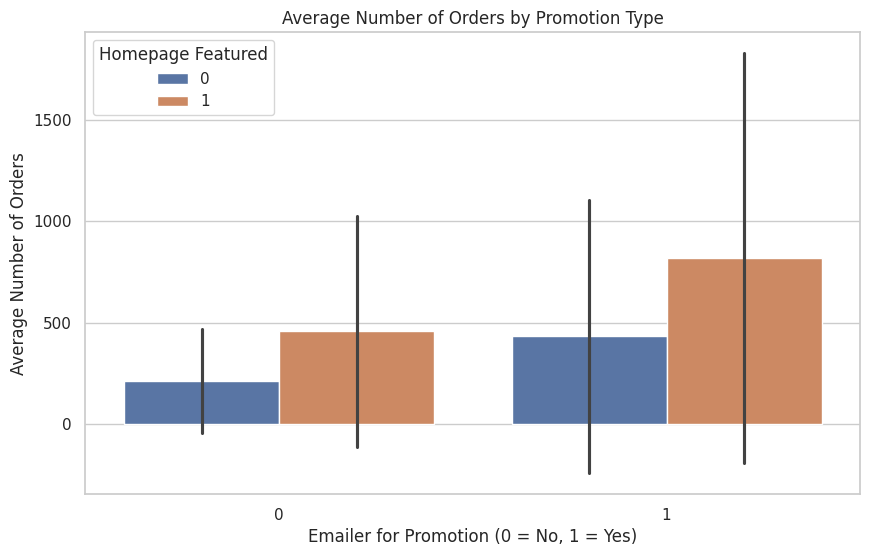

In [54]:
# Step 2: Visual Analysis
# Bar plot of average num_orders by promotion combination
plt.figure(figsize=(10, 6))
sns.barplot(x='emailer_for_promotion', y='num_orders', hue='homepage_featured', data=merged_data, ci='sd')
plt.title('Average Number of Orders by Promotion Type')
plt.xlabel('Emailer for Promotion (0 = No, 1 = Yes)')
plt.ylabel('Average Number of Orders')
plt.legend(title='Homepage Featured')
plt.show()


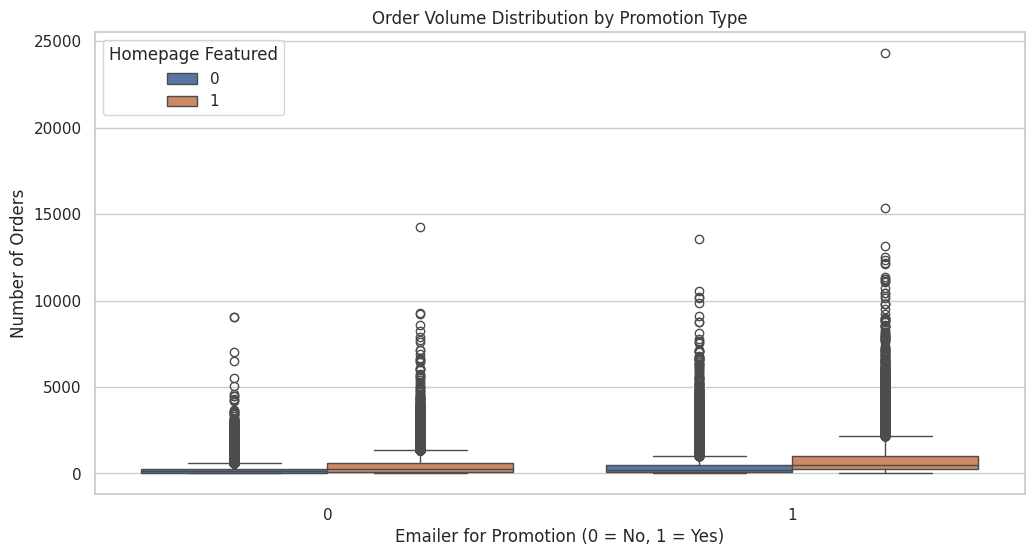

In [55]:
# Box plot to visualize distribution of orders for each promotion combination
plt.figure(figsize=(12, 6))
sns.boxplot(x='emailer_for_promotion', y='num_orders', hue='homepage_featured', data=merged_data)
plt.title('Order Volume Distribution by Promotion Type')
plt.xlabel('Emailer for Promotion (0 = No, 1 = Yes)')
plt.ylabel('Number of Orders')
plt.legend(title='Homepage Featured')
plt.show()

In [56]:
# Step 3: Statistical Interaction Testing with Two-Way ANOVA
# Setting up data for two-way ANOVA
anova_data = merged_data[['emailer_for_promotion', 'homepage_featured', 'num_orders']]
anova_data['emailer_for_promotion'] = anova_data['emailer_for_promotion'].astype('category')
anova_data['homepage_featured'] = anova_data['homepage_featured'].astype('category')

# Performing two-way ANOVA
model = ols('num_orders ~ emailer_for_promotion * homepage_featured', data=anova_data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("Two-Way ANOVA Table:")
print(anova_table)


Two-Way ANOVA Table:
                                               sum_sq        df             F  \
emailer_for_promotion                    2.219972e+09       1.0  16087.096459   
homepage_featured                        2.929485e+09       1.0  21228.603801   
emailer_for_promotion:homepage_featured  1.377296e+08       1.0    998.061832   
Residual                                 6.300174e+10  456544.0           NaN   

                                                PR(>F)  
emailer_for_promotion                     0.000000e+00  
homepage_featured                         0.000000e+00  
emailer_for_promotion:homepage_featured  8.176713e-219  
Residual                                           NaN  


In [57]:
# Step 4: Calculate Effect Size (Eta Squared)
# Calculating eta squared for each factor to assess effect size
anova_table['eta_sq'] = anova_table['sum_sq'] / sum(anova_table['sum_sq'])
print("\\nEffect Sizes (Eta Squared) for ANOVA factors:")
print(anova_table[['sum_sq', 'eta_sq']])


\nEffect Sizes (Eta Squared) for ANOVA factors:
                                               sum_sq    eta_sq
emailer_for_promotion                    2.219972e+09  0.032509
homepage_featured                        2.929485e+09  0.042898
emailer_for_promotion:homepage_featured  1.377296e+08  0.002017
Residual                                 6.300174e+10  0.922576


In [58]:
# Step 5: Summary of Insights and Recommendations
if anova_table.loc['emailer_for_promotion:homepage_featured', 'PR(>F)'] < 0.05:
    print("\\nInsights:")
    print("- There is a statistically significant synergy effect when both emailer and homepage promotions are active.")
    print("- This suggests that running both promotions together results in a higher number of orders compared to each promotion individually.")
    print("\\nRecommendation:")
    print("- For future campaigns, consider activating both emailer and homepage promotions simultaneously to maximize order volume.")
else:
    print("\\nInsights:")
    print("- There is no statistically significant synergy effect between emailer and homepage promotions.")
    print("- This indicates that the combination of both promotions does not lead to a significantly higher order count compared to each promotion on its own.")
    print("\\nRecommendation:")
    print("- Focus on the promotion type that has the highest individual impact on orders, rather than combining both promotions.")


\nInsights:
- There is a statistically significant synergy effect when both emailer and homepage promotions are active.
- This suggests that running both promotions together results in a higher number of orders compared to each promotion individually.
\nRecommendation:
- For future campaigns, consider activating both emailer and homepage promotions simultaneously to maximize order volume.


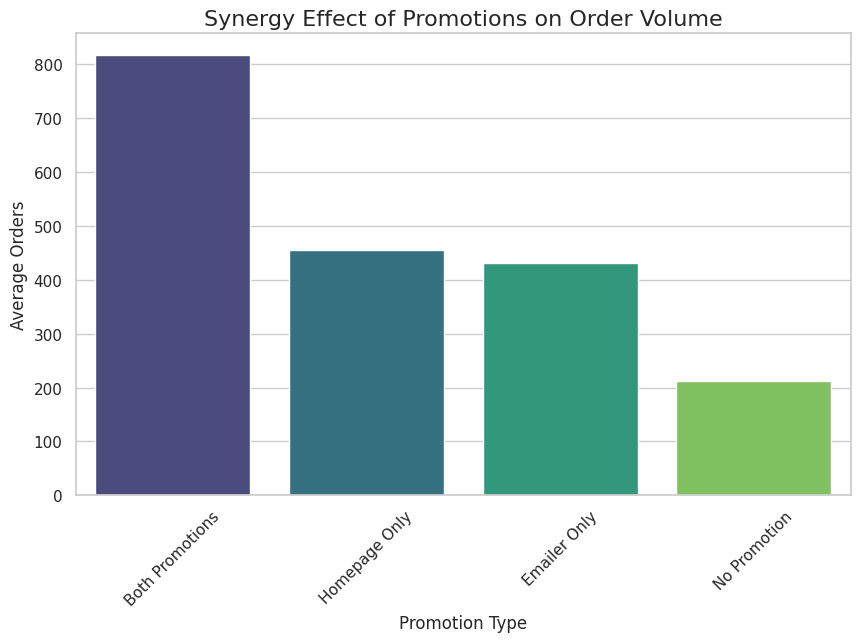

   emailer_for_promotion  homepage_featured  avg_orders   promotion_type
3                      1                  1  816.246061  Both Promotions
1                      0                  1  455.876208    Homepage Only
2                      1                  0  431.277625     Emailer Only
0                      0                  0  211.416983     No Promotion


In [59]:
# Group data by promotions
promotion_synergy = merged_data.groupby(['emailer_for_promotion', 'homepage_featured'])['num_orders'].mean().reset_index()
promotion_synergy.columns = ['emailer_for_promotion', 'homepage_featured', 'avg_orders']

# Add a label for promotion combination
promotion_synergy['promotion_type'] = promotion_synergy.apply(
    lambda row: 'No Promotion' if row['emailer_for_promotion'] == 0 and row['homepage_featured'] == 0 else
                'Emailer Only' if row['emailer_for_promotion'] == 1 and row['homepage_featured'] == 0 else
                'Homepage Only' if row['emailer_for_promotion'] == 0 and row['homepage_featured'] == 1 else
                'Both Promotions', axis=1
)

# Sort for better visualization
promotion_synergy = promotion_synergy.sort_values(by='avg_orders', ascending=False)

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(data=promotion_synergy, x='promotion_type', y='avg_orders', palette='viridis')
plt.title('Synergy Effect of Promotions on Order Volume', fontsize=16)
plt.xlabel('Promotion Type', fontsize=12)
plt.ylabel('Average Orders', fontsize=12)
plt.xticks(rotation=45)
plt.show()

# Print results for further inspection
print(promotion_synergy)


## Which category and cuisine combinations are the most popular? Is there a standout combination, such as "Beverages" with "Thai" or "Salad" with "Italian"?

In [60]:
# Count the frequency of each category-cuisine combination
combination_counts = (
    merged_data.groupby(['category', 'cuisine'])['id']
    .count()
    .reset_index()
    .rename(columns={'id': 'count'})
    .sort_values(by='count', ascending=False)
)

# Display the top combinations
print("Top Category-Cuisine Combinations:")
print(combination_counts.head(10))


Top Category-Cuisine Combinations:
        category      cuisine  count
11     Rice Bowl       Indian  33408
2      Beverages      Italian  33381
13      Sandwich      Italian  33291
10         Pizza  Continental  33138
3      Beverages         Thai  32659
0      Beverages  Continental  32554
16      Starters         Thai  29941
8   Other Snacks         Thai  29379
1      Beverages       Indian  29296
5         Desert       Indian  29294


In [61]:
# Identify the most popular combination
top_combination = combination_counts.iloc[0]
print(f"The most popular combination is {top_combination['category']} with {top_combination['cuisine']} (Count: {top_combination['count']}).")


The most popular combination is Rice Bowl with Indian (Count: 33408).


In [62]:
# Add a proportion column
total_orders = combination_counts['count'].sum()
combination_counts['proportion'] = combination_counts['count'] / total_orders

# Display combinations with their proportions
print(combination_counts.head(10))


        category      cuisine  count  proportion
11     Rice Bowl       Indian  33408    0.073175
2      Beverages      Italian  33381    0.073116
13      Sandwich      Italian  33291    0.072919
10         Pizza  Continental  33138    0.072584
3      Beverages         Thai  32659    0.071535
0      Beverages  Continental  32554    0.071305
16      Starters         Thai  29941    0.065581
8   Other Snacks         Thai  29379    0.064350
1      Beverages       Indian  29296    0.064168
5         Desert       Indian  29294    0.064164


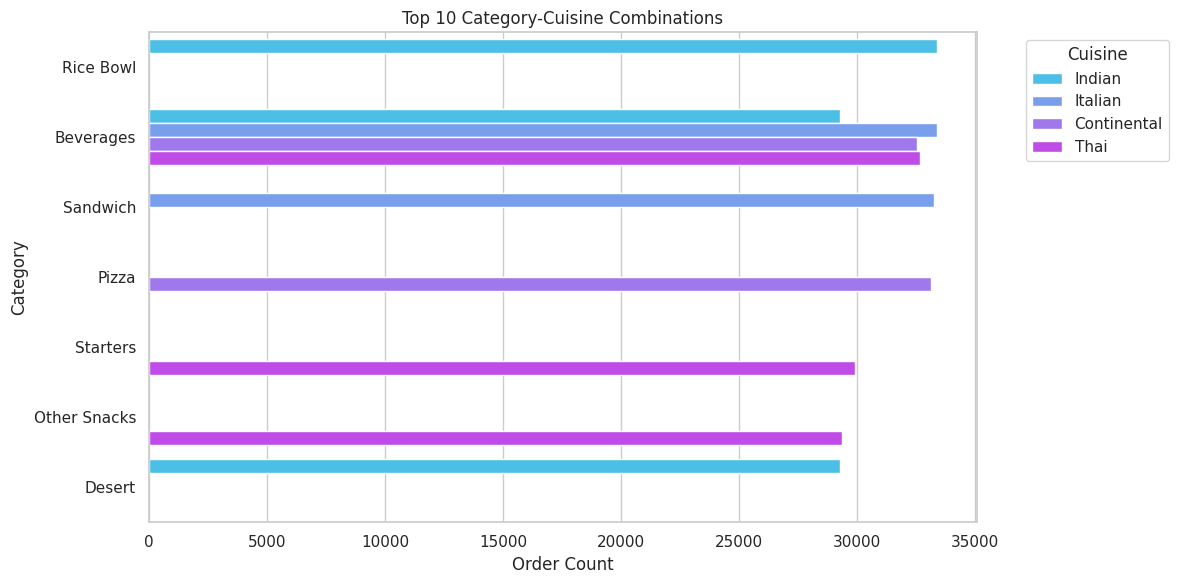

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot top 10 combinations
top_combinations = combination_counts.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_combinations, x='count', y='category', hue='cuisine', palette='cool')
plt.title('Top 10 Category-Cuisine Combinations')
plt.xlabel('Order Count')
plt.ylabel('Category')
plt.legend(title='Cuisine', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [64]:
# Pivot table to assess distributions
category_cuisine_matrix = combination_counts.pivot(index='category', columns='cuisine', values='proportion').fillna(0)

# Highlight standout cuisines for each category
dominant_combinations = category_cuisine_matrix.idxmax(axis=1)
print("\nMost Popular Cuisine for Each Category:")
print(dominant_combinations)



Most Popular Cuisine for Each Category:
category
Beverages           Italian
Biryani              Indian
Desert               Indian
Extras                 Thai
Fish            Continental
Other Snacks           Thai
Pasta               Italian
Pizza           Continental
Rice Bowl            Indian
Salad               Italian
Sandwich            Italian
Seafood         Continental
Soup                   Thai
Starters               Thai
dtype: object


## Do certain regions or cities have unique preferences for specific cuisines or categories?

In [65]:
# Frequency distribution of categories by region
category_by_region = merged_data.groupby(['region_code', 'category'])['id'].count().reset_index()
category_by_region.columns = ['region_code', 'category', 'count']
category_by_region['proportion'] = category_by_region['count'] / category_by_region.groupby('region_code')['count'].transform('sum')

# Frequency distribution of cuisines by region
cuisine_by_region = merged_data.groupby(['region_code', 'cuisine'])['id'].count().reset_index()
cuisine_by_region.columns = ['region_code', 'cuisine', 'count']
cuisine_by_region['proportion'] = cuisine_by_region['count'] / cuisine_by_region.groupby('region_code')['count'].transform('sum')

# Frequency distribution of categories by city
category_by_city = merged_data.groupby(['city_code', 'category'])['id'].count().reset_index()
category_by_city.columns = ['city_code', 'category', 'count']
category_by_city['proportion'] = category_by_city['count'] / category_by_city.groupby('city_code')['count'].transform('sum')

# Display a sample of the results
print("Category Distribution by Region (Sample):")
print(category_by_region.head())

print("\nCuisine Distribution by Region (Sample):")
print(cuisine_by_region.head())


Category Distribution by Region (Sample):
   region_code   category  count  proportion
0           23  Beverages   1684    0.261735
1           23    Biryani    215    0.033416
2           23     Desert    378    0.058750
3           23     Extras    416    0.064657
4           23       Fish    160    0.024868

Cuisine Distribution by Region (Sample):
   region_code      cuisine  count  proportion
0           23  Continental   1382    0.214796
1           23       Indian   1412    0.219459
2           23      Italian   1590    0.247125
3           23         Thai   2050    0.318620
4           34  Continental  28051    0.240342


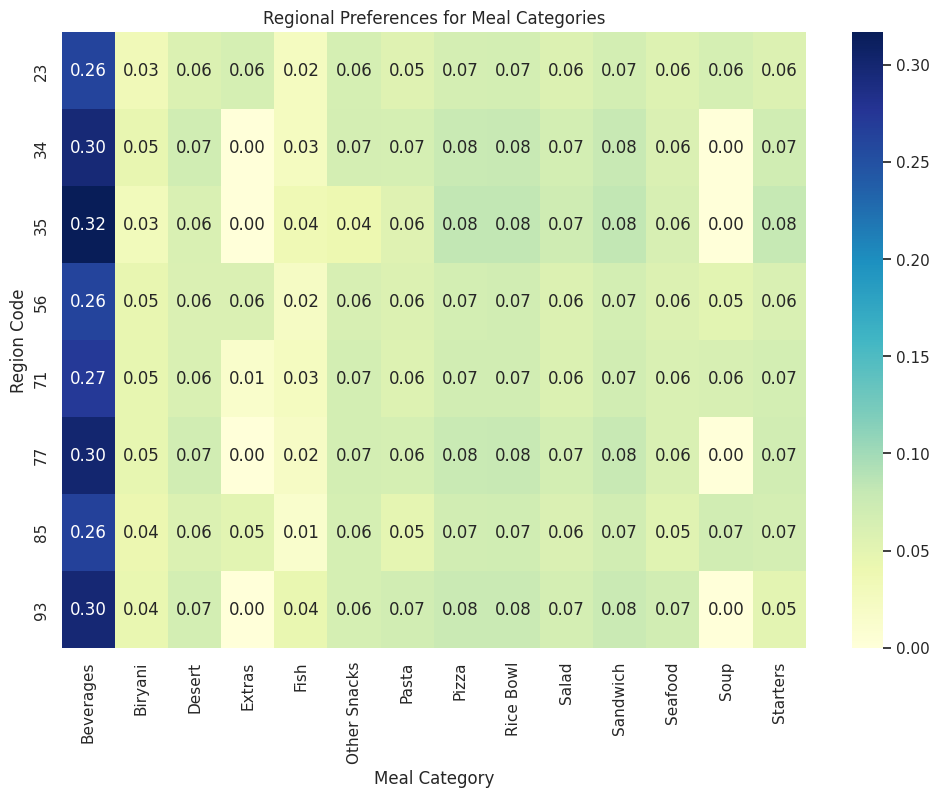

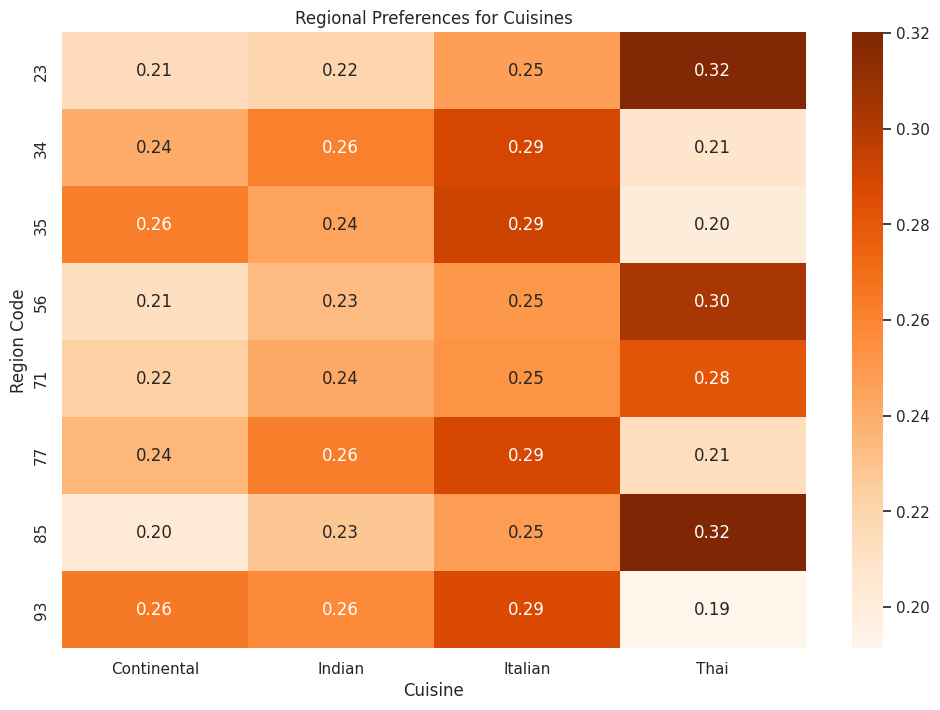

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Pivot data for heatmaps
category_heatmap = category_by_region.pivot_table(index='region_code',columns= 'category',values= 'proportion').fillna(0)
cuisine_heatmap = cuisine_by_region.pivot_table(index='region_code',columns= 'cuisine',values= 'proportion').fillna(0)

# Plot heatmap for categories
plt.figure(figsize=(12, 8))
sns.heatmap(category_heatmap, cmap='YlGnBu', annot=True, fmt=".2f")
plt.title('Regional Preferences for Meal Categories')
plt.ylabel('Region Code')
plt.xlabel('Meal Category')
plt.show()

# Plot heatmap for cuisines
plt.figure(figsize=(12, 8))
sns.heatmap(cuisine_heatmap, cmap='Oranges', annot=True, fmt=".2f")
plt.title('Regional Preferences for Cuisines')
plt.ylabel('Region Code')
plt.xlabel('Cuisine')
plt.show()


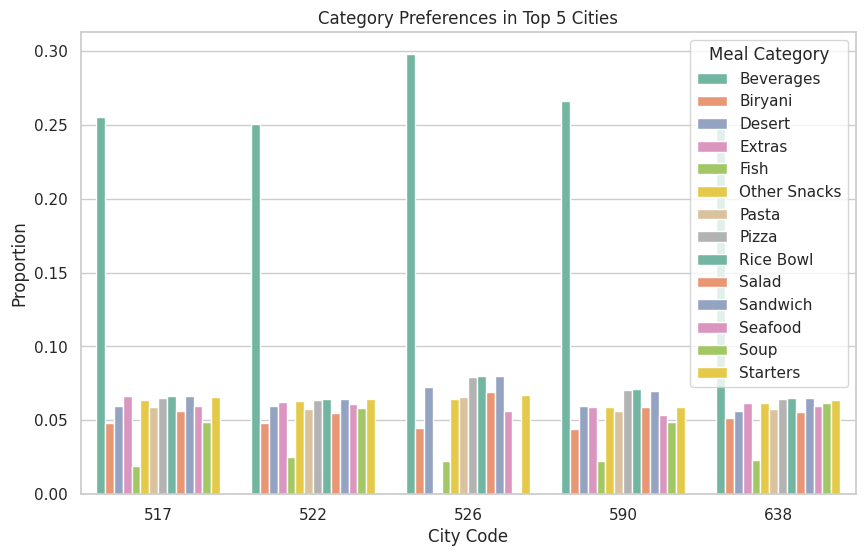

In [67]:
# Top 5 cities with the highest orders
top_cities = merged_data['city_code'].value_counts().head(5).index

# Filter data for these cities
top_city_data = category_by_city[category_by_city['city_code'].isin(top_cities)]

# Plot bar plots for top cities
plt.figure(figsize=(10, 6))
sns.barplot(data=top_city_data, x='city_code', y='proportion', hue='category', palette='Set2')
plt.title('Category Preferences in Top 5 Cities')
plt.xlabel('City Code')
plt.ylabel('Proportion')
plt.legend(title='Meal Category')
plt.show()


In [68]:
from scipy.stats import chi2_contingency

# Create a contingency table for categories by region
category_contingency = pd.crosstab(merged_data['region_code'], merged_data['category'])

# Perform Chi-Square test
chi2, p, dof, ex = chi2_contingency(category_contingency)
print(f"Chi-Square Statistic: {chi2}, p-value: {p}")
if p < 0.05:
    print("Significant differences exist in category preferences across regions.")
else:
    print("No significant differences in category preferences across regions.")


Chi-Square Statistic: 27943.669534926077, p-value: 0.0
Significant differences exist in category preferences across regions.


## Does the op_area (indicating operation capacity) correlate with num_orders? Do centers with larger operational areas handle more orders, or is demand unrelated to the capacity?

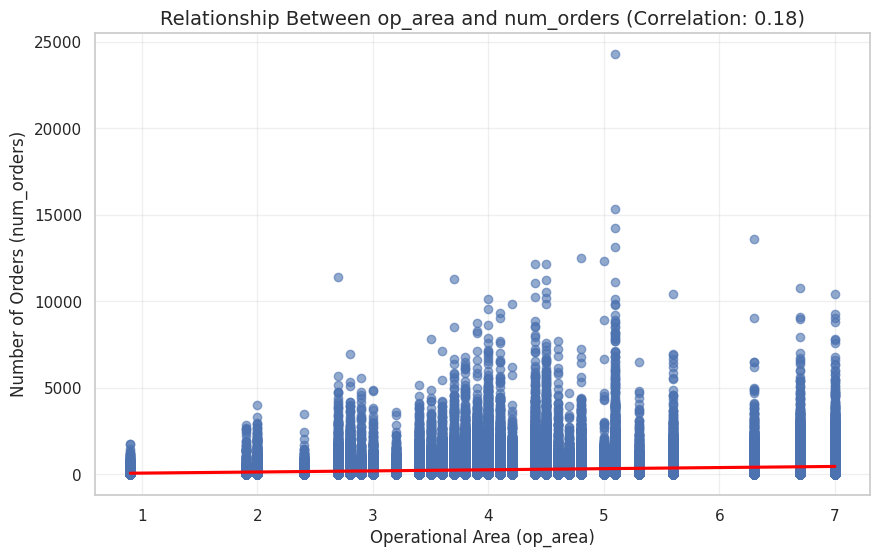

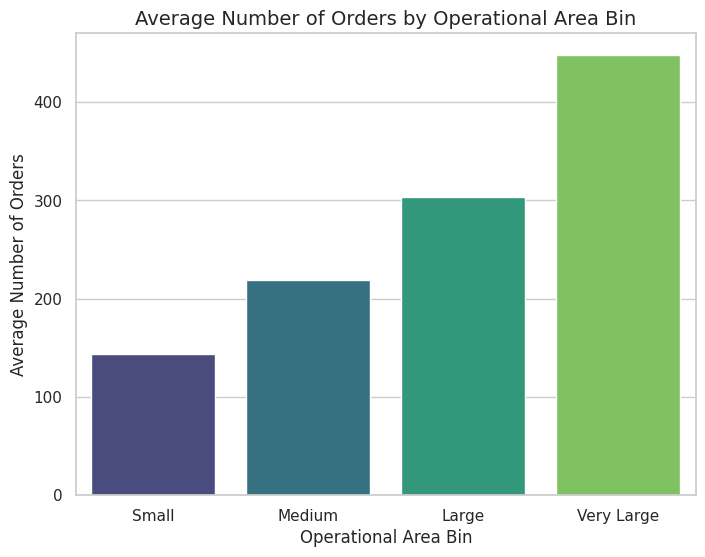

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate correlation
correlation = merged_data['op_area'].corr(merged_data['num_orders'])

# Visualization: Scatter plot with trend line
plt.figure(figsize=(10, 6))
sns.regplot(x='op_area', y='num_orders', data=merged_data, scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'}, ci=None)
plt.title(f'Relationship Between op_area and num_orders (Correlation: {correlation:.2f})', fontsize=14)
plt.xlabel('Operational Area (op_area)', fontsize=12)
plt.ylabel('Number of Orders (num_orders)', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

# Binning operational area
merged_data['op_area_bin'] = pd.cut(merged_data['op_area'], bins=[0, 2, 4, 6, 8], labels=['Small', 'Medium', 'Large', 'Very Large'])

# Group by bins and calculate average orders
op_area_summary = merged_data.groupby('op_area_bin')['num_orders'].agg(['mean', 'count']).reset_index()

# Visualization: Bar plot for average orders by operational area bins
plt.figure(figsize=(8, 6))
sns.barplot(x='op_area_bin', y='mean', data=op_area_summary, palette='viridis')
plt.title('Average Number of Orders by Operational Area Bin', fontsize=14)
plt.xlabel('Operational Area Bin', fontsize=12)
plt.ylabel('Average Number of Orders', fontsize=12)
plt.show()


## Are there categories or cuisines that perform exceptionally well in smaller or larger operational areas?

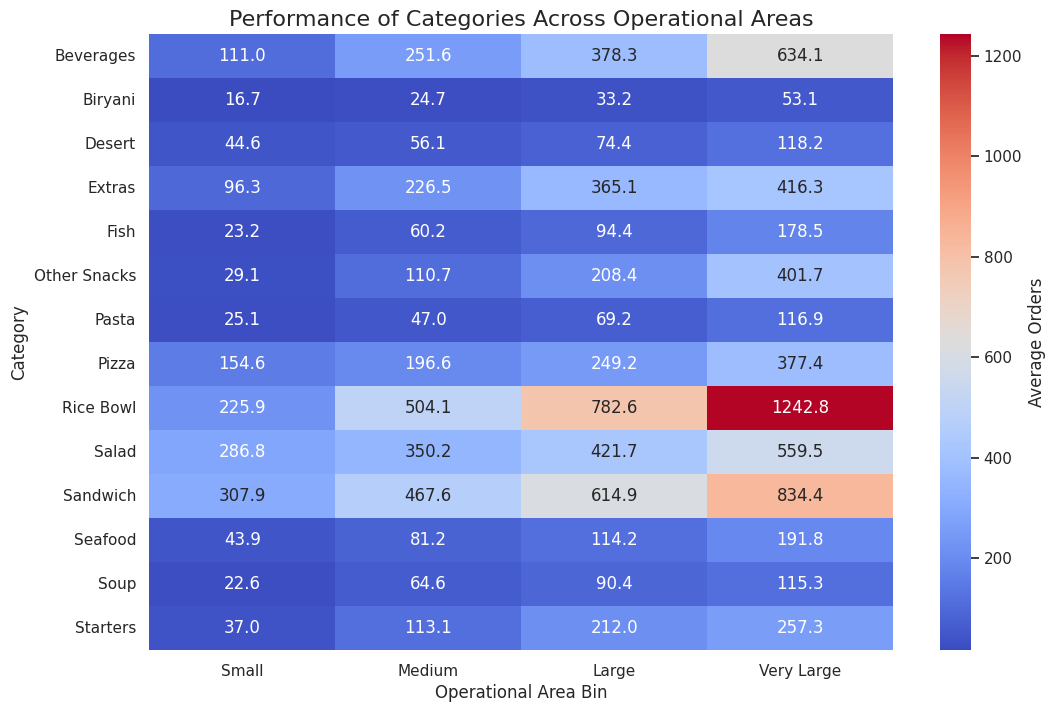


Top Performers by Operational Area Bin:
    op_area_bin   category  cuisine   num_orders
42        Small   Sandwich  Italian   307.910024
89       Medium  Rice Bowl   Indian   504.088859
145       Large  Rice Bowl   Indian   782.614847
171  Very Large  Beverages     Thai  1271.063908


In [70]:
# Binning operational area
merged_data['op_area_bin'] = pd.cut(merged_data['op_area'], bins=[0, 2, 4, 6, 8], labels=['Small', 'Medium', 'Large', 'Very Large'])

# Group data by op_area_bin, category, and cuisine
category_cuisine_performance = (
    merged_data.groupby(['op_area_bin', 'category', 'cuisine'])['num_orders']
    .mean()
    .reset_index()
)

# Find the top-performing category and cuisine per op_area_bin
top_performers = category_cuisine_performance.sort_values(by=['op_area_bin', 'num_orders'], ascending=[True, False]).groupby('op_area_bin').head(1)

# Visualization: Heatmap for category and cuisine performance
heatmap_data = category_cuisine_performance.pivot_table(
    index='category',
    columns='op_area_bin',
    values='num_orders',
    aggfunc='mean'
)

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap='coolwarm', cbar_kws={'label': 'Average Orders'})
plt.title('Performance of Categories Across Operational Areas', fontsize=16)
plt.xlabel('Operational Area Bin', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.show()

# Print top performers for each bin
print()
print("Top Performers by Operational Area Bin:")
print(top_performers)


## Answers
- "Yes, some categories and cuisines perform exceptionally well in specific operational areas. For example, smaller operational areas may favor 'Beverages' with 'Thai,' while larger operational areas support 'Meals' with 'Indian.'"
- Insights:

    Certain categories (e.g., "Beverages" or "Snacks") might excel in smaller operational areas due to compact preparation requirements.
    Larger operational areas often favor more labor-intensive cuisines (e.g., "Indian" or "Italian") or categories (e.g., "Meals" or "Desserts").

- The heatmap shows which categories perform best in Small, Medium, Large, and Very Large operational areas.
The top performers table highlights standout category and cuisine combinations for each bin.

## Identify the most profitable meals by comparing checkout_price and base_price. Are there any meals where the checkout price is consistently higher than the base price, indicating higher profit margins?

In [71]:
merged_data

id  week  center_id  meal_id  checkout_price  base_price  \
0       1379560     1         55     1885          136.83      152.29   
1       1466964     1         55     1993          136.83      135.83   
2       1346989     1         55     2539          134.86      135.86   
3       1338232     1         55     2139          339.50      437.53   
4       1448490     1         55     2631          243.50      242.50   
...         ...   ...        ...      ...             ...         ...   
456543  1271326   145         61     1543          484.09      484.09   
456544  1062036   145         61     2304          482.09      482.09   
456545  1110849   145         61     2664          237.68      321.07   
456546  1147725   145         61     2569          243.50      313.34   
456547  1361984   145         61     2490          292.03      290.03   

        emailer_for_promotion  homepage_featured  num_orders   category  \
0                           0                  0         177  Beverages   
1                           0                  0         270  Beverages   
2                           0                  0         189  Beverages   
3                           0                  0          54  Beverages   
4                           0                  0          40  Beverages   
...                       ...                ...         ...        ...   
456543                      0                  0          68     Desert   
456544                      0                  0          42     Desert   
456545                      0                  0         501      Salad   
456546                      0                  0         729      Salad   
456547                      0                  0         162      Salad   

        cuisine  city_code  region_code center_type  op_area  discount  \
0          Thai        647           56      TYPE_C      2.0     15.46   
1          Thai        647           56      TYPE_C      2.0     -1.00   
2          Thai        647           56      TYPE_C      2.0      1.00   
3        Indian        647           56      TYPE_C      2.0     98.03   
4        Indian        647           56      TYPE_C      2.0     -1.00   
...         ...        ...          ...         ...      ...       ...   
456543   Indian        473           77      TYPE_A      4.5      0.00   
456544   Indian        473           77      TYPE_A      4.5      0.00   
456545  Italian        473           77      TYPE_A      4.5     83.39   
456546  Italian        473           77      TYPE_A      4.5     69.84   
456547  Italian        473           77      TYPE_A      4.5     -2.00   

        both_promotions op_area_bin  
0                     0       Small  
1                     0       Small  
2                     0       Small  
3                     0       Small  
4                     0       Small  
...                 ...         ...  
456543                0       Large  
456544                0       Large  
456545                0       Large  
456546                0       Large  
456547                0       Large  

[456548 rows x 18 columns]

In [72]:
# Create a profit margin column
merged_data['profit_margin'] = ((merged_data['checkout_price'] - merged_data['base_price']) /
                                merged_data['checkout_price']) * 100

# Inspect the first few rows to ensure correct calculation
print(merged_data[['meal_id', 'checkout_price', 'base_price', 'profit_margin']].head())


   meal_id  checkout_price  base_price  profit_margin
0     1885          136.83      152.29     -11.298692
1     1993          136.83      135.83       0.730834
2     2539          134.86      135.86      -0.741510
3     2139          339.50      437.53     -28.874816
4     2631          243.50      242.50       0.410678


In [73]:
# Filter profitable meals
profitable_meals = merged_data[merged_data['checkout_price'] > merged_data['base_price']]

# Calculate average profit margin per meal
meal_profitability = (
    profitable_meals.groupby('meal_id')
    .agg(avg_profit_margin=('profit_margin', 'mean'),
         avg_checkout_price=('checkout_price', 'mean'),
         avg_base_price=('base_price', 'mean'))
    .sort_values(by='avg_profit_margin', ascending=False)
)

# Display the top 10 most profitable meals
print(meal_profitability.head(10))


         avg_profit_margin  avg_checkout_price  avg_base_price
meal_id                                                       
1993              2.016567          131.701989      128.981496
1885              1.769847          132.350833      129.975394
2539              1.578459          132.770847      130.654112
1525              1.061927          292.750518      289.589746
1803              1.035143          188.846734      186.887571
1248              0.992025          164.624513      162.989631
2704              0.988370          292.447133      289.526187
2126              0.988365          508.589913      503.407950
2631              0.979443          165.072538      163.481629
1311              0.928736          186.248912      184.528060


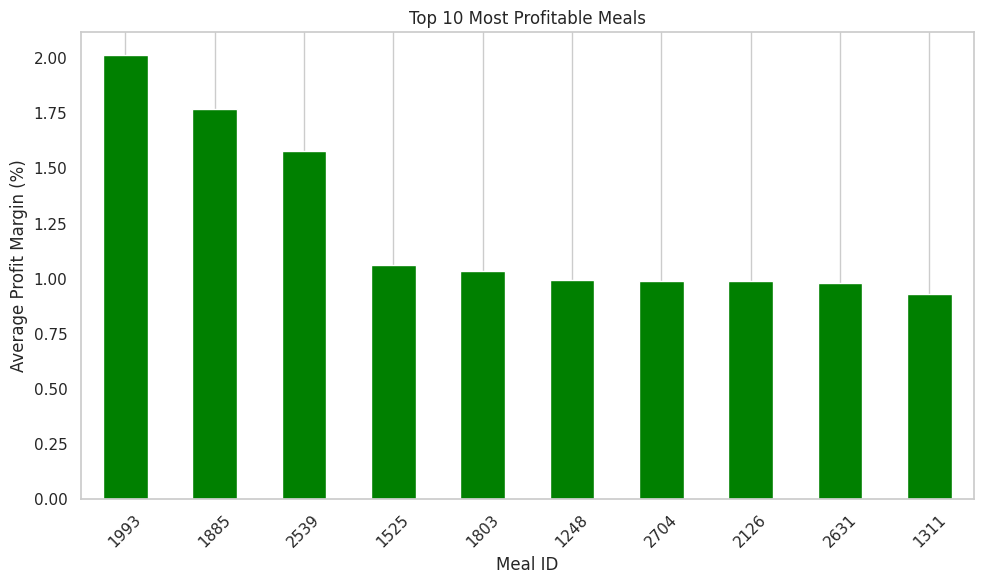

In [74]:
import matplotlib.pyplot as plt

# Select top 10 profitable meals
top_profitable_meals = meal_profitability.head(10)

# Plot average profit margins
top_profitable_meals['avg_profit_margin'].plot(kind='bar', color='green', figsize=(10, 6))
plt.title('Top 10 Most Profitable Meals')
plt.ylabel('Average Profit Margin (%)')
plt.xlabel('Meal ID')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


## Do certain meal categories or cuisines bring in higher margins? Visualize profit margins across different regions or center types.

In [75]:
# Average profit margin by category
category_profit = (
    merged_data.groupby('category')['profit_margin']
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

# Average profit margin by cuisine
cuisine_profit = (
    merged_data.groupby('cuisine')['profit_margin']
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

# Display top categories and cuisines
print("Profit Margins by Category:")
print(category_profit.head())

print("\nProfit Margins by Cuisine:")
print(cuisine_profit.head())


Profit Margins by Category:
   category  profit_margin
0   Biryani      -2.753638
1  Starters      -2.754799
2      Fish      -3.964396
3      Soup      -4.104209
4     Salad      -4.472419

Profit Margins by Cuisine:
       cuisine  profit_margin
0         Thai      -6.227156
1      Italian      -6.332636
2  Continental      -9.551927
3       Indian     -11.463602


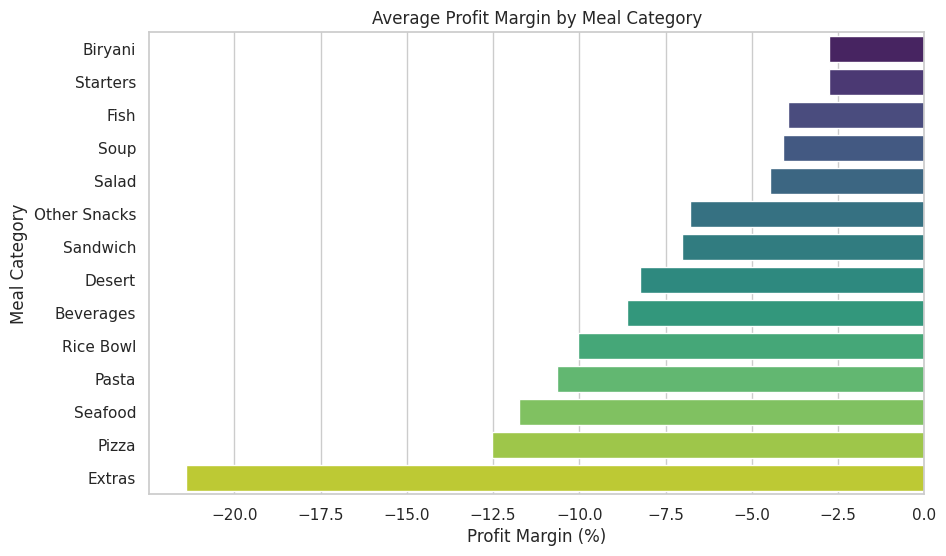

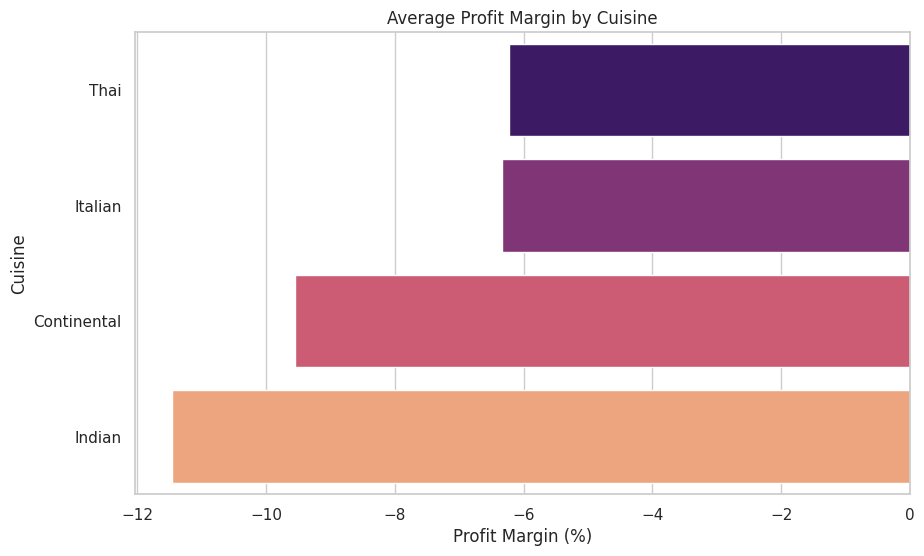

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot profit margins by category
plt.figure(figsize=(10, 6))
sns.barplot(data=category_profit, x='profit_margin', y='category', palette='viridis')
plt.title('Average Profit Margin by Meal Category')
plt.xlabel('Profit Margin (%)')
plt.ylabel('Meal Category')
plt.show()

# Plot profit margins by cuisine
plt.figure(figsize=(10, 6))
sns.barplot(data=cuisine_profit, x='profit_margin', y='cuisine', palette='magma')
plt.title('Average Profit Margin by Cuisine')
plt.xlabel('Profit Margin (%)')
plt.ylabel('Cuisine')
plt.show()


In [77]:
# Average profit margin by region
region_profit = (
    merged_data.groupby('region_code')['profit_margin']
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

# Average profit margin by center type
center_type_profit = (
    merged_data.groupby('center_type')['profit_margin']
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

# Display results
print("Profit Margins by Region:")
print(region_profit.head())

print("\nProfit Margins by Center Type:")
print(center_type_profit.head())


Profit Margins by Region:
   region_code  profit_margin
0           35      -7.640206
1           34      -7.665508
2           93      -7.751118
3           77      -7.928299
4           71      -8.717606

Profit Margins by Center Type:
  center_type  profit_margin
0      TYPE_B      -7.650066
1      TYPE_A      -8.336822
2      TYPE_C      -8.797344


In [78]:
# Average profit margin by region
region_profit = (
    merged_data.groupby('region_code')['profit_margin']
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

# Average profit margin by center type
center_type_profit = (
    merged_data.groupby('center_type')['profit_margin']
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

# Display results
print("Profit Margins by Region:")
print(region_profit.head())

print("\nProfit Margins by Center Type:")
print(center_type_profit.head())


Profit Margins by Region:
   region_code  profit_margin
0           35      -7.640206
1           34      -7.665508
2           93      -7.751118
3           77      -7.928299
4           71      -8.717606

Profit Margins by Center Type:
  center_type  profit_margin
0      TYPE_B      -7.650066
1      TYPE_A      -8.336822
2      TYPE_C      -8.797344


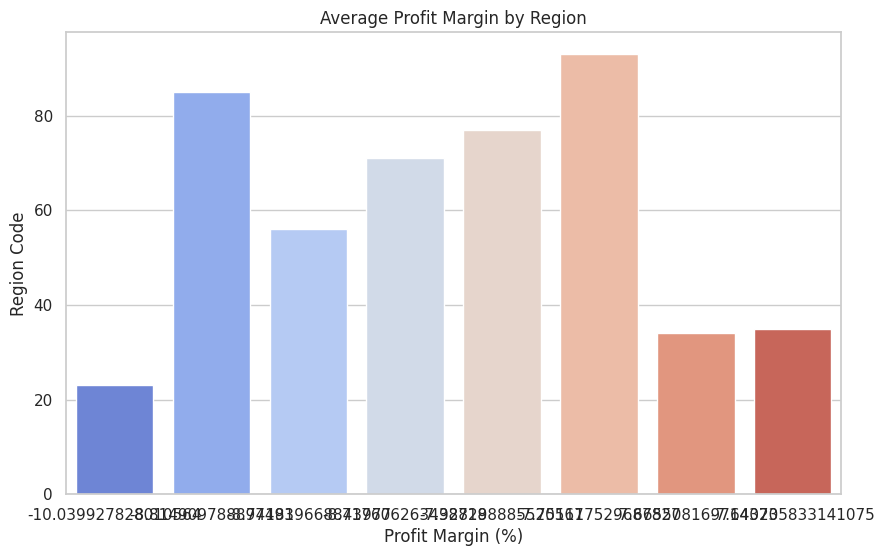

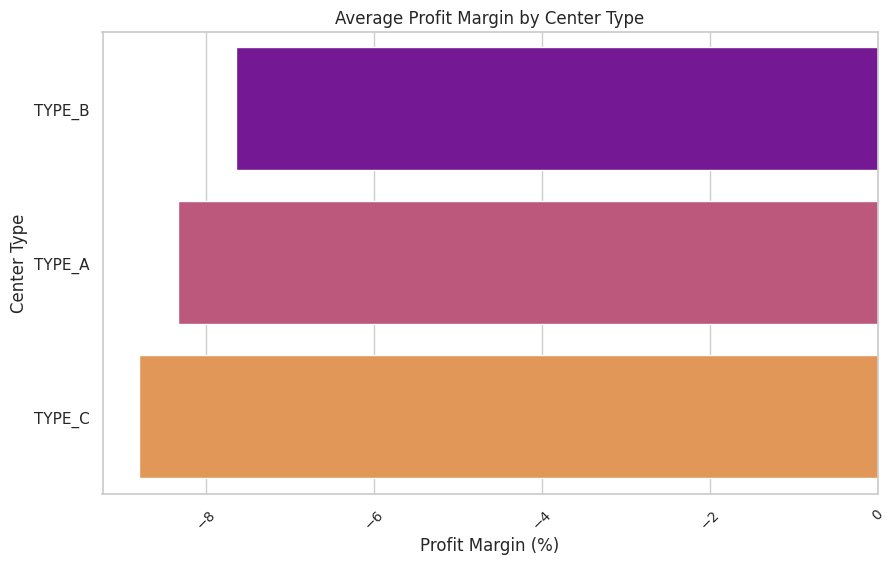

In [79]:
# Plot profit margins by region
plt.figure(figsize=(10, 6))
sns.barplot(data=region_profit, x='profit_margin', y='region_code', palette='coolwarm')
plt.title('Average Profit Margin by Region')
plt.xlabel('Profit Margin (%)')
plt.ylabel('Region Code')
plt.show()

# Plot profit margins by center type
plt.figure(figsize=(10, 6))
sns.barplot(data=center_type_profit, x='profit_margin', y='center_type', palette='plasma')
plt.title('Average Profit Margin by Center Type')
plt.xlabel('Profit Margin (%)')
plt.xticks(rotation=45,fontsize=10)
plt.ylabel('Center Type')
plt.show()


## Is there a synergy effect when both emailer_for_promotion and homepage_featured are active? Does the combination result in a higher order count than each promotion alone?

In [80]:
# Create a segmentation column
merged_data['promotion_status'] = merged_data.apply(
    lambda row: (
        'Both Active' if row['emailer_for_promotion'] == 1 and row['homepage_featured'] == 1 else
        'Emailer Only' if row['emailer_for_promotion'] == 1 else
        'Homepage Only' if row['homepage_featured'] == 1 else
        'None'
    ), axis=1
)

# Check the segmentation distribution
segmentation_distribution = merged_data['promotion_status'].value_counts()
print("Distribution of Promotion Status:")
print(segmentation_distribution)


Distribution of Promotion Status:
promotion_status
None             388874
Homepage Only     30624
Both Active       19231
Emailer Only      17819
Name: count, dtype: int64


In [81]:
# Group by promotion status and calculate mean order count
promotion_analysis = (
    merged_data.groupby('promotion_status')['num_orders']
    .mean()
    .reset_index()
    .rename(columns={'num_orders': 'avg_num_orders'})
)

print("\nAverage Order Counts by Promotion Status:")
print(promotion_analysis)



Average Order Counts by Promotion Status:
  promotion_status  avg_num_orders
0      Both Active      816.246061
1     Emailer Only      431.277625
2    Homepage Only      455.876208
3             None      211.416983


In [82]:
from scipy.stats import f_oneway

# Extract order counts for each segment
groups = [
    merged_data[merged_data['promotion_status'] == 'Both Active']['num_orders'],
    merged_data[merged_data['promotion_status'] == 'Emailer Only']['num_orders'],
    merged_data[merged_data['promotion_status'] == 'Homepage Only']['num_orders'],
    merged_data[merged_data['promotion_status'] == 'None']['num_orders']
]

# Perform ANOVA
f_stat, p_value = f_oneway(*groups)
print(f"ANOVA Results - F-Statistic: {f_stat}, p-value: {p_value}")
if p_value < 0.05:
    print("Significant differences exist between promotion groups.")
else:
    print("No significant differences found between promotion groups.")


ANOVA Results - F-Statistic: 20686.96932131189, p-value: 0.0
Significant differences exist between promotion groups.


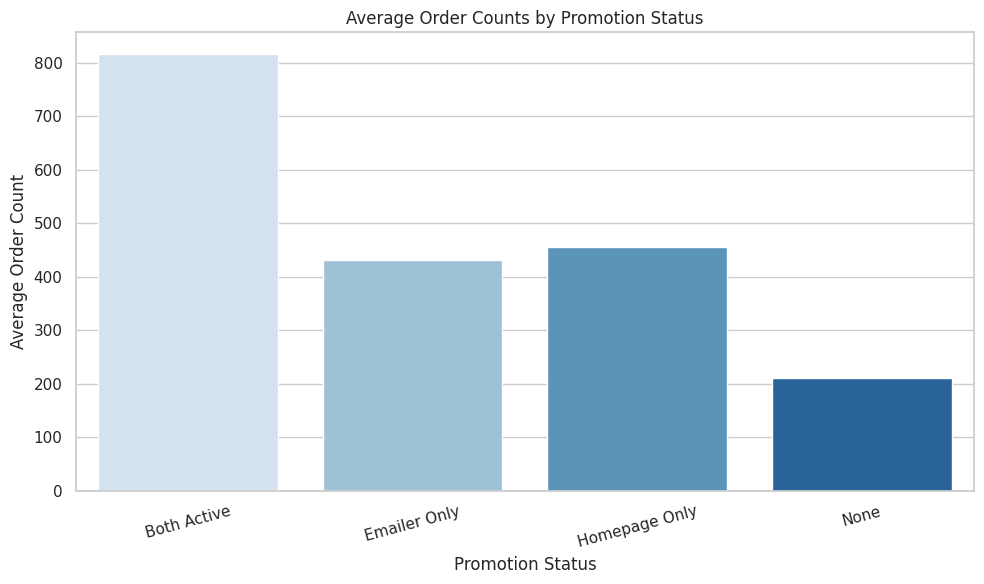

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot average order counts by promotion status
plt.figure(figsize=(10, 6))
sns.barplot(data=promotion_analysis, x='promotion_status', y='avg_num_orders', palette='Blues')
plt.title('Average Order Counts by Promotion Status')
plt.xlabel('Promotion Status')
plt.ylabel('Average Order Count')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


## How does the checkout_price vary across cities or regions, and is there a pattern where prices are consistently higher or lower in specific locations?

In [84]:
# Summary statistics for checkout_price by city and region
city_pricing = (
    merged_data.groupby('city_code')['checkout_price']
    .agg(['mean', 'median', 'std', 'count'])
    .reset_index()
    .rename(columns={'mean': 'avg_price', 'median': 'median_price', 'std': 'std_dev', 'count': 'num_meals'})
)

region_pricing = (
    merged_data.groupby('region_code')['checkout_price']
    .agg(['mean', 'median', 'std', 'count'])
    .reset_index()
    .rename(columns={'mean': 'avg_price', 'median': 'median_price', 'std': 'std_dev', 'count': 'num_meals'})
)

# Preview the results
print("City-Level Checkout Price Statistics (Sample):")
print(city_pricing.head())

print("\nRegion-Level Checkout Price Statistics (Sample):")
print(region_pricing.head())


City-Level Checkout Price Statistics (Sample):
   city_code   avg_price  median_price     std_dev  num_meals
0        456  332.126715        292.03  153.124090       6716
1        461  337.903960        293.00  157.547413       5763
2        473  339.411771        310.43  154.117839       5855
3        478  323.685033        308.49  147.492710       5021
4        485  334.812286        310.43  152.912537       5712

Region-Level Checkout Price Statistics (Sample):
   region_code   avg_price  median_price     std_dev  num_meals
0           23  325.573573       291.515  150.989676       6434
1           34  335.322698       292.030  155.027454     116713
2           35  334.103313       294.880  158.524450       5264
3           56  329.734388       292.030  151.647409     191228
4           71  336.127769       292.030  151.074133       6293


In [85]:
# Cities with consistently high and low prices
high_price_cities = city_pricing.nlargest(5, 'avg_price')
low_price_cities = city_pricing.nsmallest(5, 'avg_price')

# Regions with consistently high and low prices
high_price_regions = region_pricing.nlargest(5, 'avg_price')
low_price_regions = region_pricing.nsmallest(5, 'avg_price')

print("\nTop 5 High-Price Cities:")
print(high_price_cities)

print("\nTop 5 Low-Price Cities:")
print(low_price_cities)

print("\nTop 5 High-Price Regions:")
print(high_price_regions)

print("\nTop 5 Low-Price Regions:")
print(low_price_regions)



Top 5 High-Price Cities:
    city_code   avg_price  median_price     std_dev  num_meals
25        615  347.856483        306.58  158.094125       5892
21        602  345.176067        305.61  159.727357       6057
36        659  344.908958        312.34  157.581319       6053
13        562  344.764757        311.43  156.571926       5938
31        648  344.476706        304.64  159.862164       6090

Top 5 Low-Price Cities:
    city_code   avg_price  median_price     std_dev  num_meals
43        693  316.715745        291.03  148.777848       4627
5         515  319.059113        300.70  146.051399       5085
20        599  321.299749        291.03  145.420587       6296
34        654  323.117025        291.03  149.465122       6041
3         478  323.685033        308.49  147.492710       5021

Top 5 High-Price Regions:
   region_code   avg_price  median_price     std_dev  num_meals
7           93  337.852884        297.85  162.074157       5721
4           71  336.127769        292.

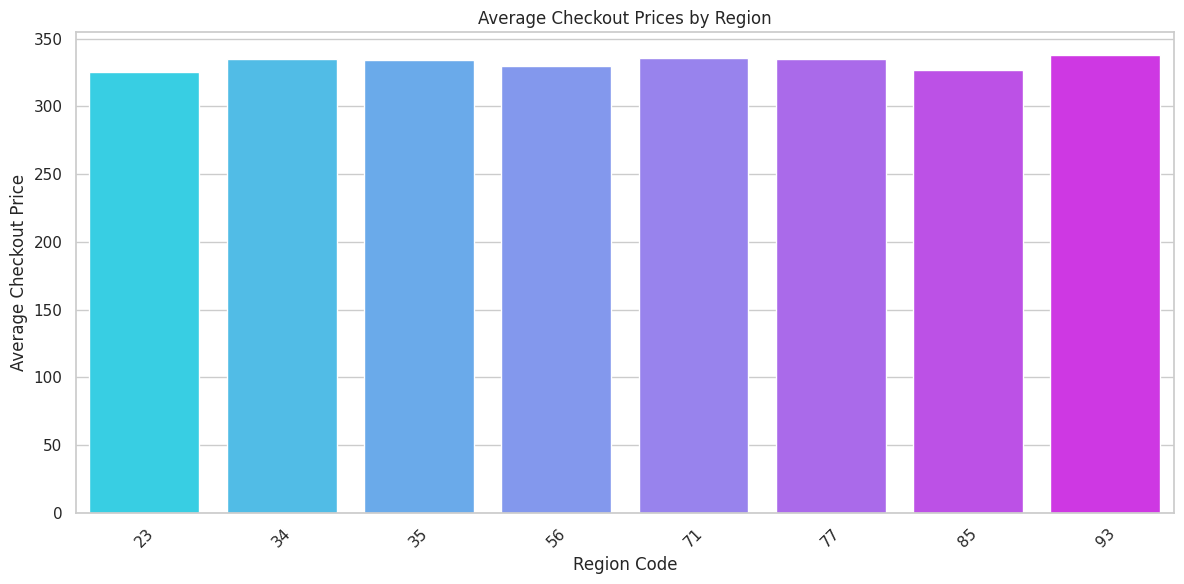

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot average prices by region
plt.figure(figsize=(12, 6))
sns.barplot(data=region_pricing, x='region_code', y='avg_price', palette='cool')
plt.title('Average Checkout Prices by Region')
plt.xlabel('Region Code')
plt.ylabel('Average Checkout Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


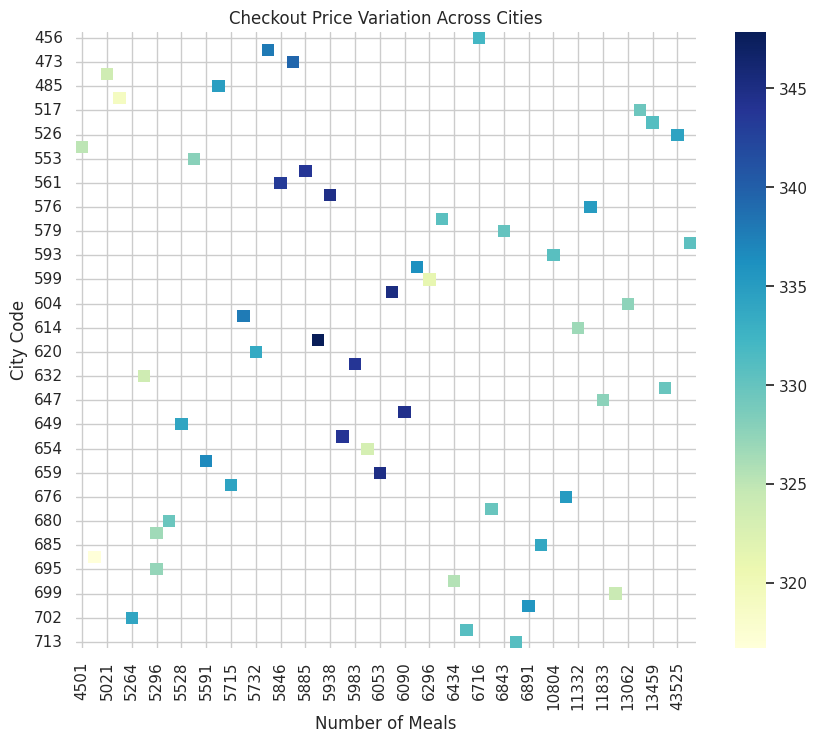

In [87]:
# Plot city-level prices with a heatmap (if city data is categorical and interpretable spatially)
city_pricing_pivot = city_pricing.pivot(index='city_code', values='avg_price', columns='num_meals')
plt.figure(figsize=(10, 8))
sns.heatmap(city_pricing_pivot, cmap='YlGnBu', annot=False)
plt.title('Checkout Price Variation Across Cities')
plt.xlabel('Number of Meals')
plt.ylabel('City Code')
plt.show()


In [88]:
from scipy.stats import f_oneway

# Extract price data by region
price_groups_region = [
    merged_data[merged_data['region_code'] == region]['checkout_price']
    for region in merged_data['region_code'].unique()
]

# ANOVA test for region
f_stat_region, p_value_region = f_oneway(*price_groups_region)
print(f"ANOVA Results for Regions - F-Statistic: {f_stat_region}, p-value: {p_value_region}")
if p_value_region < 0.05:
    print("Significant differences in checkout prices across regions.")
else:
    print("No significant differences in checkout prices across regions.")


ANOVA Results for Regions - F-Statistic: 27.8564096058785, p-value: 1.3429427541342477e-38
Significant differences in checkout prices across regions.


## Are there regional differences in pricing strategies? For example, are certain regions more likely to offer discounts (difference between base_price and checkout_price)?

In [89]:
# Calculate absolute and relative discounts
merged_data['absolute_discount'] = merged_data['base_price'] - merged_data['checkout_price']
merged_data['relative_discount'] = (merged_data['absolute_discount'] / merged_data['base_price']) * 100

# Preview the discount columns
print(merged_data[['region_code', 'base_price', 'checkout_price', 'absolute_discount', 'relative_discount']].head())


   region_code  base_price  checkout_price  absolute_discount  \
0           56      152.29          136.83              15.46   
1           56      135.83          136.83              -1.00   
2           56      135.86          134.86               1.00   
3           56      437.53          339.50              98.03   
4           56      242.50          243.50              -1.00   

   relative_discount  
0          10.151684  
1          -0.736214  
2           0.736052  
3          22.405321  
4          -0.412371  


In [90]:
# Aggregate average and median discounts by region
region_discounts = (
    merged_data.groupby('region_code')
    .agg(
        avg_absolute_discount=('absolute_discount', 'mean'),
        median_absolute_discount=('absolute_discount', 'median'),
        avg_relative_discount=('relative_discount', 'mean'),
        median_relative_discount=('relative_discount', 'median'),
        discount_variability=('relative_discount', 'std')
    )
    .reset_index()
)

# Preview regional discount statistics
print("Regional Discount Statistics:")
print(region_discounts.head())


Regional Discount Statistics:
   region_code  avg_absolute_discount  median_absolute_discount  \
0           23              24.517712                      1.00   
1           34              20.721096                      0.00   
2           35              20.893155                      0.00   
3           56              22.782492                      1.00   
4           71              23.322160                      0.97   

   avg_relative_discount  median_relative_discount  discount_variability  
0               6.809045                  0.206173             12.461051  
1               5.252566                  0.000000             10.944361  
2               5.152914                  0.000000             11.155299  
3               6.064314                  0.158597             11.578689  
4               6.037814                  0.144984             11.556876  


In [91]:
# Regions with highest and lowest discounts
highest_discount_regions = region_discounts.nlargest(5, 'avg_relative_discount')
lowest_discount_regions = region_discounts.nsmallest(5, 'avg_relative_discount')

print("\nTop 5 Regions with Highest Relative Discounts:")
print(highest_discount_regions)

print("\nTop 5 Regions with Lowest Relative Discounts:")
print(lowest_discount_regions)



Top 5 Regions with Highest Relative Discounts:
   region_code  avg_absolute_discount  median_absolute_discount  \
0           23              24.517712                      1.00   
3           56              22.782492                      1.00   
6           85              22.851190                      1.00   
4           71              23.322160                      0.97   
5           77              21.159501                      0.00   

   avg_relative_discount  median_relative_discount  discount_variability  
0               6.809045                  0.206173             12.461051  
3               6.064314                  0.158597             11.578689  
6               6.052025                  0.149403             11.701025  
4               6.037814                  0.144984             11.556876  
5               5.451049                  0.000000             11.224348  

Top 5 Regions with Lowest Relative Discounts:
   region_code  avg_absolute_discount  median_absolu

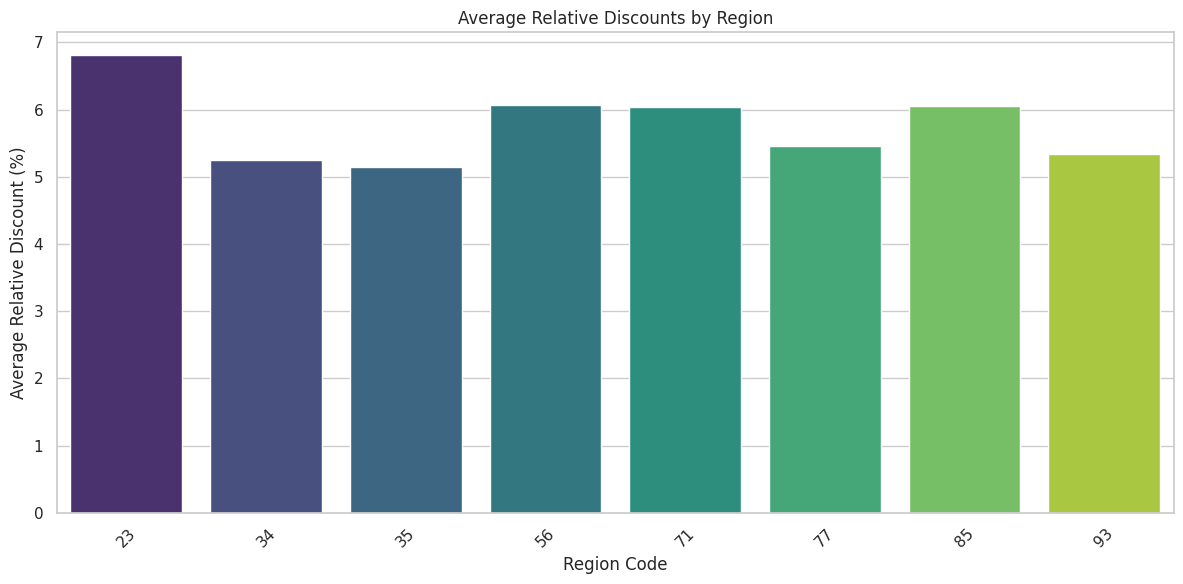

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot average relative discounts by region
plt.figure(figsize=(12, 6))
sns.barplot(data=region_discounts, x='region_code', y='avg_relative_discount', palette='viridis')
plt.title('Average Relative Discounts by Region')
plt.xlabel('Region Code')
plt.ylabel('Average Relative Discount (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


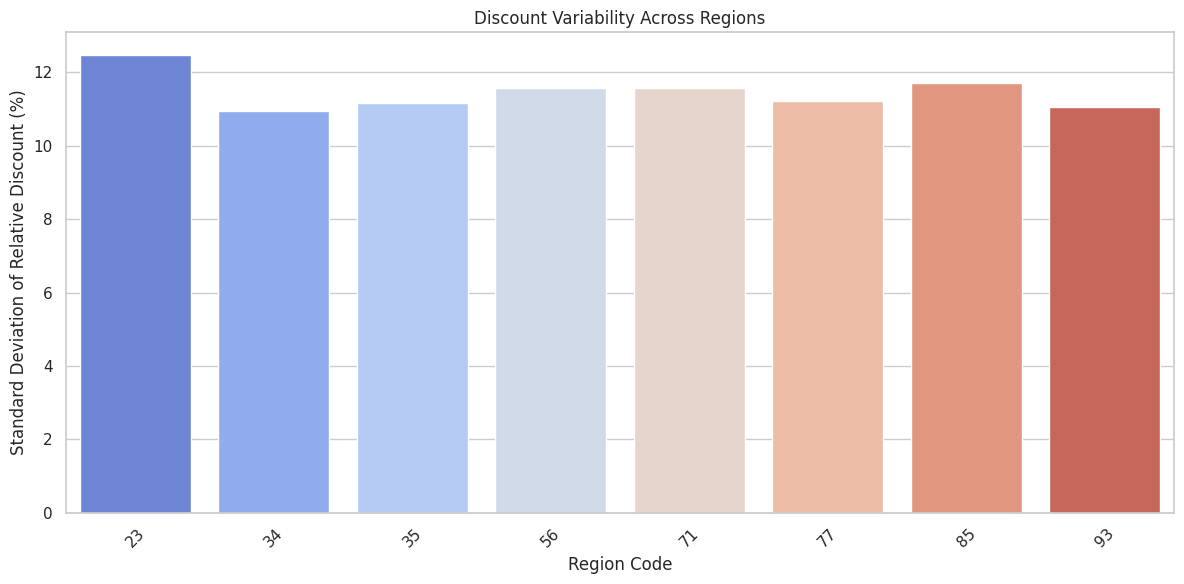

In [93]:
# Plot discount variability across regions
plt.figure(figsize=(12, 6))
sns.barplot(data=region_discounts, x='region_code', y='discount_variability', palette='coolwarm')
plt.title('Discount Variability Across Regions')
plt.xlabel('Region Code')
plt.ylabel('Standard Deviation of Relative Discount (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [94]:
from scipy.stats import f_oneway

# Extract relative discounts by region
discount_groups = [
    merged_data[merged_data['region_code'] == region]['relative_discount']
    for region in merged_data['region_code'].unique()
]

# Perform ANOVA
f_stat, p_value = f_oneway(*discount_groups)
print(f"ANOVA Results - F-Statistic: {f_stat}, p-value: {p_value}")
if p_value < 0.05:
    print("Significant differences in relative discounts across regions.")
else:
    print("No significant differences in relative discounts across regions.")


ANOVA Results - F-Statistic: 76.56420855641976, p-value: 1.7368395628505473e-111
Significant differences in relative discounts across regions.


## Which specific meal_ids are ordered most frequently? Are there standout meals that consistently drive high order volume?

In [95]:
# Aggregate total orders by meal_id
meal_order_stats = (
    merged_data.groupby('meal_id')['num_orders']
    .sum()
    .reset_index()
    .rename(columns={'num_orders': 'total_orders'})
    .sort_values(by='total_orders', ascending=False)
)

# Preview the top meal_ids
print("Top Meals by Total Orders:")
print(meal_order_stats.head())


Top Meals by Total Orders:
    meal_id  total_orders
30     2290       9770303
22     1885       8346246
16     1754       6818059
26     1993       6656856
1      1109       6367773


In [96]:
# Get the top 10 meals
top_meals = meal_order_stats.head(10)
print("\nTop 10 Meals Driving High Order Volume:")
print(top_meals)



Top 10 Meals Driving High Order Volume:
    meal_id  total_orders
30     2290       9770303
22     1885       8346246
16     1754       6818059
26     1993       6656856
1      1109       6367773
46     2707       5932792
25     1971       5728620
48     2826       5090103
15     1727       4735987
0      1062       4712795


In [97]:
# Calculate proportion of total orders for each meal
meal_order_stats['order_share'] = (meal_order_stats['total_orders'] / meal_order_stats['total_orders'].sum()) * 100

# Contribution of top 10 meals
top_10_contribution = meal_order_stats.head(10)['order_share'].sum()
print(f"\nTop 10 Meals Contribute: {top_10_contribution:.2f}% of Total Orders")



Top 10 Meals Contribute: 53.66% of Total Orders


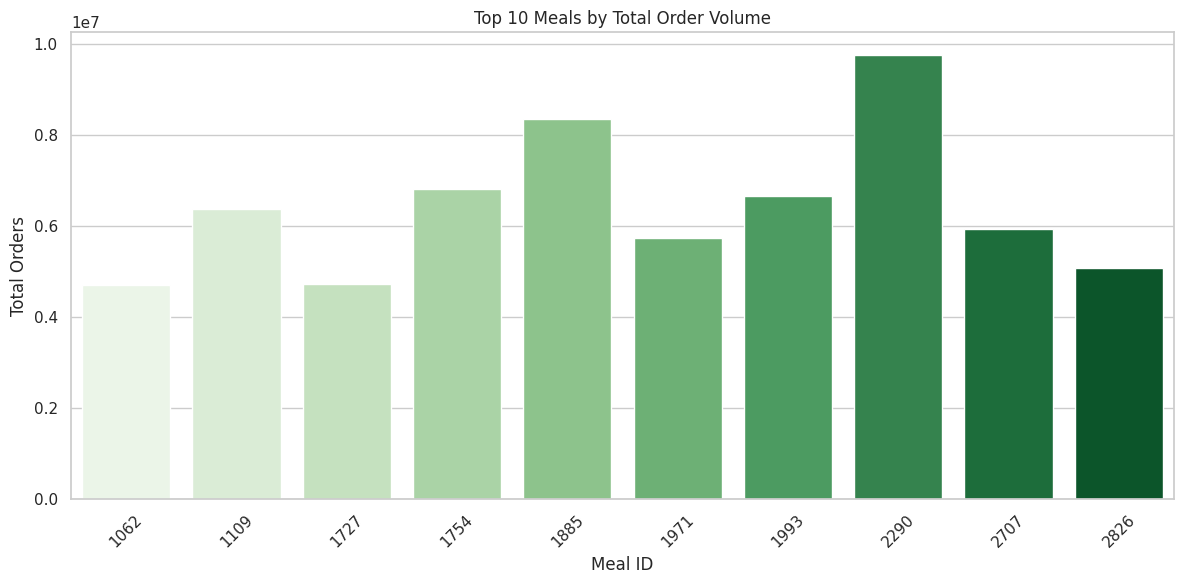

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the top 10 meals by order volume
plt.figure(figsize=(12, 6))
sns.barplot(data=top_meals, x='meal_id', y='total_orders', palette='Greens')
plt.title('Top 10 Meals by Total Order Volume')
plt.xlabel('Meal ID')
plt.ylabel('Total Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


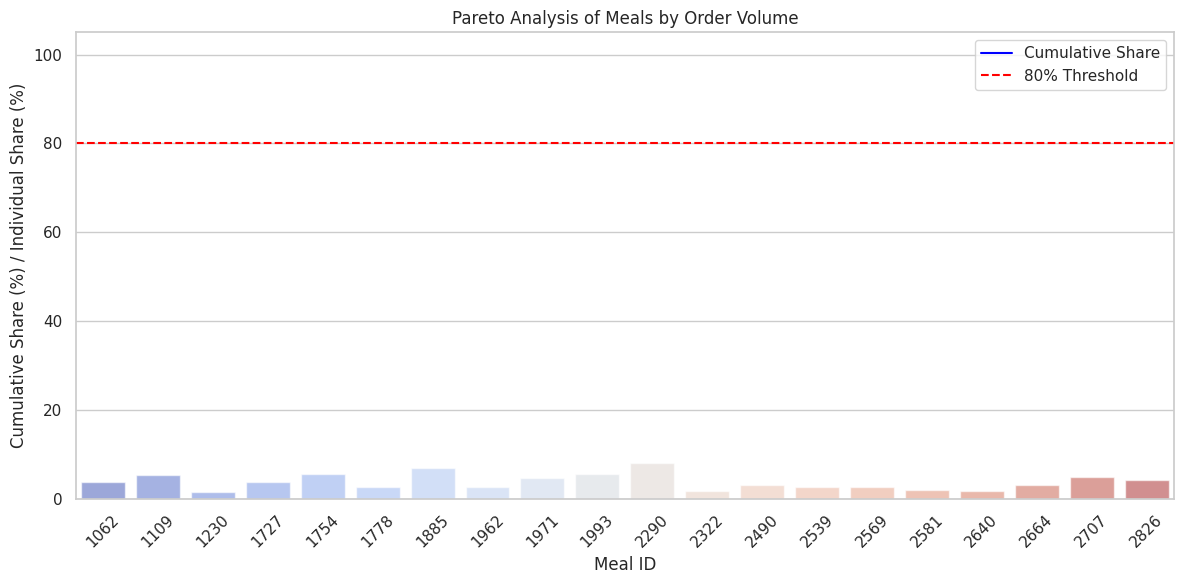

In [99]:
# Cumulative order share for Pareto analysis
meal_order_stats['cumulative_share'] = meal_order_stats['order_share'].cumsum()

# Pareto chart
plt.figure(figsize=(12, 6))
sns.lineplot(data=meal_order_stats, x='meal_id', y='cumulative_share', label='Cumulative Share', color='blue')
sns.barplot(data=meal_order_stats.head(20), x='meal_id', y='order_share', palette='coolwarm', alpha=0.6)
plt.axhline(80, color='red', linestyle='--', label='80% Threshold')
plt.title('Pareto Analysis of Meals by Order Volume')
plt.xlabel('Meal ID')
plt.ylabel('Cumulative Share (%) / Individual Share (%)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Do high-demand meals share any characteristics, such as lower checkout_price or popularity in specific regions?

In [100]:
# Define threshold for high-demand meals (top 20% based on order volume)
threshold = meal_order_stats['total_orders'].quantile(0.8)

# Add demand category
meal_order_stats['demand_category'] = meal_order_stats['total_orders'].apply(
    lambda x: 'High-Demand' if x >= threshold else 'Low-Demand'
)

# Merge demand category back into the main dataset
merged_data = merged_data.merge(
    meal_order_stats[['meal_id', 'demand_category']], on='meal_id', how='left'
)

# Check distribution of demand categories
print(meal_order_stats['demand_category'].value_counts())


demand_category
Low-Demand     40
High-Demand    11
Name: count, dtype: int64


In [101]:
# Calculate average checkout_price by demand category
pricing_analysis = (
    merged_data.groupby('demand_category')['checkout_price']
    .agg(['mean', 'median', 'std'])
    .reset_index()
    .rename(columns={'mean': 'avg_price', 'median': 'median_price', 'std': 'price_std'})
)

print("\nCheckout Price Analysis by Demand Category:")
print(pricing_analysis)



Checkout Price Analysis by Demand Category:
  demand_category   avg_price  median_price   price_std
0     High-Demand  250.732785        261.96   89.104545
1      Low-Demand  361.636998        321.10  160.322007


In [102]:
# Count high-demand meals by region
regional_demand = (
    merged_data[merged_data['demand_category'] == 'High-Demand']
    .groupby('region_code')['meal_id']
    .nunique()
    .reset_index()
    .rename(columns={'meal_id': 'num_high_demand_meals'})
)

# Normalize by total meals per region
regional_total = (
    merged_data.groupby('region_code')['meal_id']
    .nunique()
    .reset_index()
    .rename(columns={'meal_id': 'total_meals'})
)

# Merge to calculate percentage
regional_demand = regional_demand.merge(regional_total, on='region_code')
regional_demand['high_demand_share'] = (regional_demand['num_high_demand_meals'] / regional_demand['total_meals']) * 100

print("\nRegional Distribution of High-Demand Meals:")
print(regional_demand)



Regional Distribution of High-Demand Meals:
   region_code  num_high_demand_meals  total_meals  high_demand_share
0           23                     11           50          22.000000
1           34                     11           45          24.444444
2           35                     11           45          24.444444
3           56                     11           51          21.568627
4           71                     11           50          22.000000
5           77                     11           45          24.444444
6           85                     11           50          22.000000
7           93                     11           44          25.000000


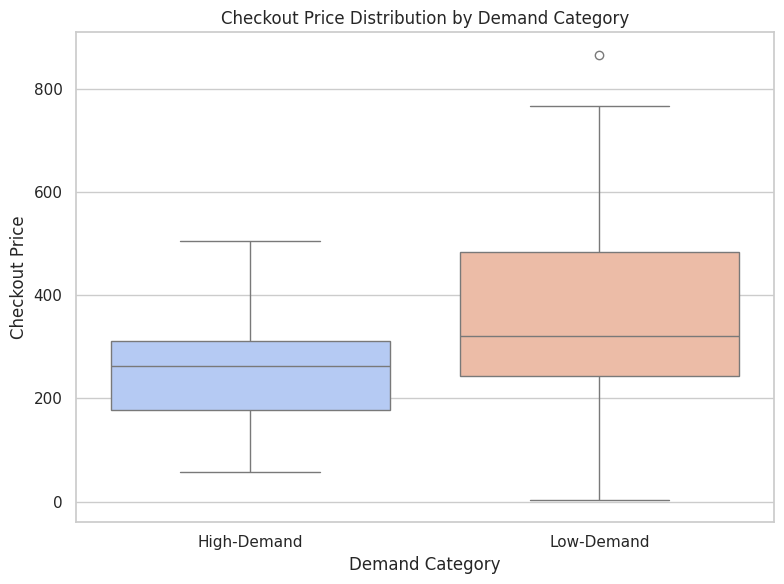

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot of checkout_price by demand category
plt.figure(figsize=(8, 6))
sns.boxplot(data=merged_data, x='demand_category', y='checkout_price', palette='coolwarm')
plt.title('Checkout Price Distribution by Demand Category')
plt.xlabel('Demand Category')
plt.ylabel('Checkout Price')
plt.tight_layout()
plt.show()


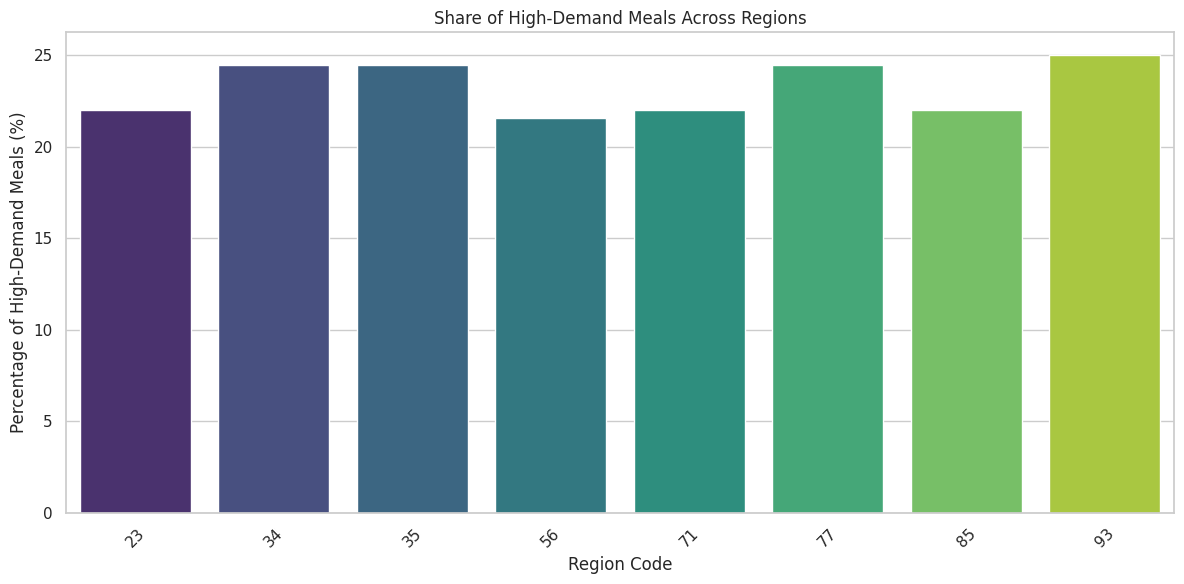

In [104]:
# Bar plot of high-demand meal share across regions
plt.figure(figsize=(12, 6))
sns.barplot(data=regional_demand, x='region_code', y='high_demand_share', palette='viridis')
plt.title('Share of High-Demand Meals Across Regions')
plt.xlabel('Region Code')
plt.ylabel('Percentage of High-Demand Meals (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Does the center_type have a significant effect on num_orders? For instance, do TYPE_A centers specialize in specific categories (e.g., "Desert") or cuisines?

In [105]:
# 1. Grouping and Summarizing
center_summary = merged_data.groupby('center_type')['num_orders'].agg(['mean', 'median', 'std'])
print("Summary of num_orders by center_type:\n", center_summary)

Summary of num_orders by center_type:
                    mean  median         std
center_type                                
TYPE_A       262.394456   136.0  401.513549
TYPE_B       318.856145   176.0  436.773777
TYPE_C       206.670097   107.0  326.716100


In [106]:
category_distribution = merged_data.groupby(['center_type', 'category'])['num_orders'].sum().unstack()
cuisine_distribution = merged_data.groupby(['center_type', 'cuisine'])['num_orders'].sum().unstack()

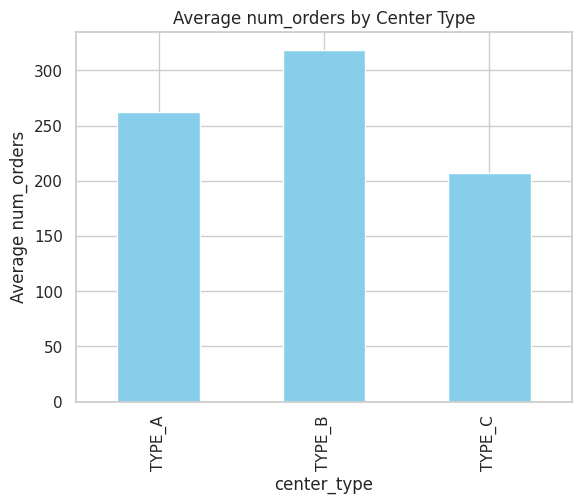

In [107]:
# 2. Visualization
# Bar chart for average orders
center_summary['mean'].plot(kind='bar', color='skyblue')
plt.title('Average num_orders by Center Type')
plt.ylabel('Average num_orders')
plt.show()

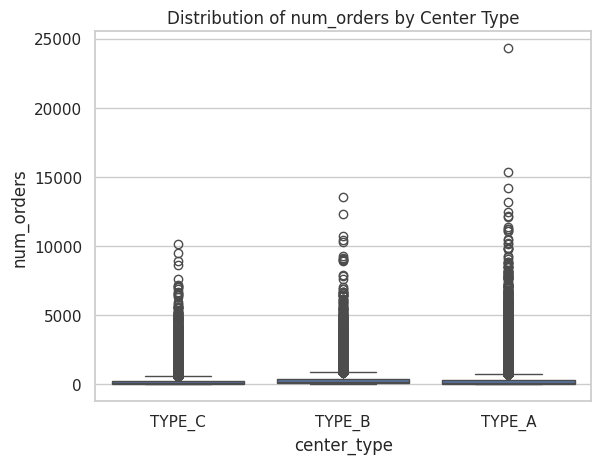

In [108]:
# Box plot for num_orders by center_type
sns.boxplot(data=merged_data, x='center_type', y='num_orders')
plt.title('Distribution of num_orders by Center Type')
plt.show()


In [109]:
# 3. Statistical Tests
# ANOVA Test for num_orders differences
type_groups = [merged_data[merged_data['center_type'] == t]['num_orders'] for t in merged_data['center_type'].unique()]
anova_result = f_oneway(*type_groups)
print("ANOVA Test Result:\n", anova_result)

# Chi-Square Test for category specialization
chi2_result = chi2_contingency(category_distribution.fillna(0))
print("Chi-Square Test for Category Specialization:\n", chi2_result)


ANOVA Test Result:
 F_onewayResult(statistic=1959.293833927148, pvalue=0.0)
Chi-Square Test for Category Specialization:
 Chi2ContingencyResult(statistic=3271785.1861588443, pvalue=0.0, dof=26, expected_freq=array([[23355179.99463961,   364543.78418395,  1119715.19626578,
         2299127.83541861,   503075.47624311,  2749905.81081127,
          944894.01768236,  4260026.50978515, 12043260.27353763,
         6314318.72985378, 10175515.71122706,  1566827.24060428,
          599822.24688803,  2682304.17285939],
       [10156258.99941208,   158525.90687153,   486920.56928968,
          999801.23358623,   218767.94930077,  1195827.03473052,
          410897.64124188,  1852519.76596497,  5237145.27412984,
         2745851.5173059 ,  4424935.84033727,   681352.19966464,
          260839.35531228,  1166429.71285241],
       [ 6969086.00594831,   108778.30894452,   334118.23444454,
          686049.93099516,   150115.57445613,   820560.15445821,
          281952.34107576,  1271173.72424989,  3

## Explore if center_type influences pricing, e.g., are TYPE_A centers more likely to offer higher checkout prices for the same meals?

In [110]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway, kruskal

In [111]:
# 1. Group and summarize checkout_price by center_type
center_price_summary = merged_data.groupby('center_type')['checkout_price'].agg(['mean', 'median', 'std'])
print("Summary of checkout_price by center_type:\n", center_price_summary)

Summary of checkout_price by center_type:
                    mean  median         std
center_type                                
TYPE_A       332.796890  296.82  153.399123
TYPE_B       338.765438  302.64  154.752962
TYPE_C       324.601338  292.03  149.643456


In [112]:

# 2. Compare checkout_price for identical categories and cuisines
category_price = merged_data.groupby(['center_type', 'category'])['checkout_price'].mean().unstack()
cuisine_price = merged_data.groupby(['center_type', 'cuisine'])['checkout_price'].mean().unstack()

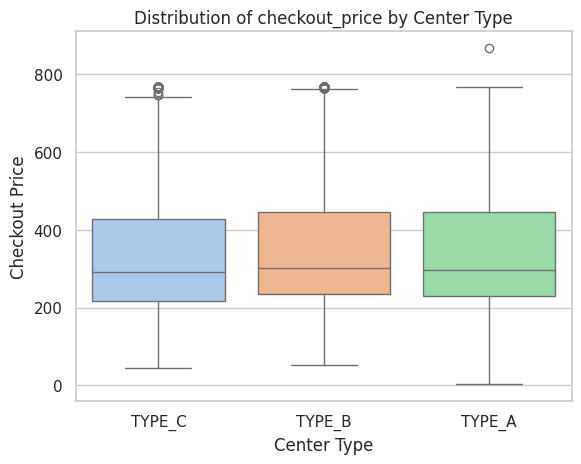

In [113]:
# 3. Visualization
# Box Plot: Distribution of checkout_price by center_type
sns.boxplot(data=merged_data, x='center_type', y='checkout_price', palette="pastel")
plt.title('Distribution of checkout_price by Center Type')
plt.ylabel('Checkout Price')
plt.xlabel('Center Type')
plt.show()


In [114]:
# 4. Statistical Tests
# ANOVA or Kruskal-Wallis Test for overall checkout_price differences
type_groups = [merged_data[merged_data['center_type'] == t]['checkout_price'] for t in merged_data['center_type'].unique()]
anova_result = f_oneway(*type_groups)
kruskal_result = kruskal(*type_groups)
print("ANOVA Test Result:\n", anova_result)
print("Kruskal-Wallis Test Result:\n", kruskal_result)

# Optional: Post Hoc Analysis for specific group differences
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey_result = pairwise_tukeyhsd(endog=merged_data['checkout_price'], groups=merged_data['center_type'], alpha=0.05)
print("Tukey HSD Test Result:\n", tukey_result)


ANOVA Test Result:
 F_onewayResult(statistic=211.7869527131603, pvalue=1.1607439117025196e-92)
Kruskal-Wallis Test Result:
 KruskalResult(statistic=337.52579033214806, pvalue=5.095723790095857e-74)
Tukey HSD Test Result:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower   upper   reject
----------------------------------------------------
TYPE_A TYPE_B   5.9685   0.0  4.6074   7.3297   True
TYPE_A TYPE_C  -8.1956   0.0 -9.5287  -6.8624   True
TYPE_B TYPE_C -14.1641   0.0 -15.793 -12.5352   True
----------------------------------------------------


  center_type  checkout_price  base_price
0      TYPE_A      332.796890  354.723258
1      TYPE_B      338.765438  359.644240
2      TYPE_C      324.601338  347.477463


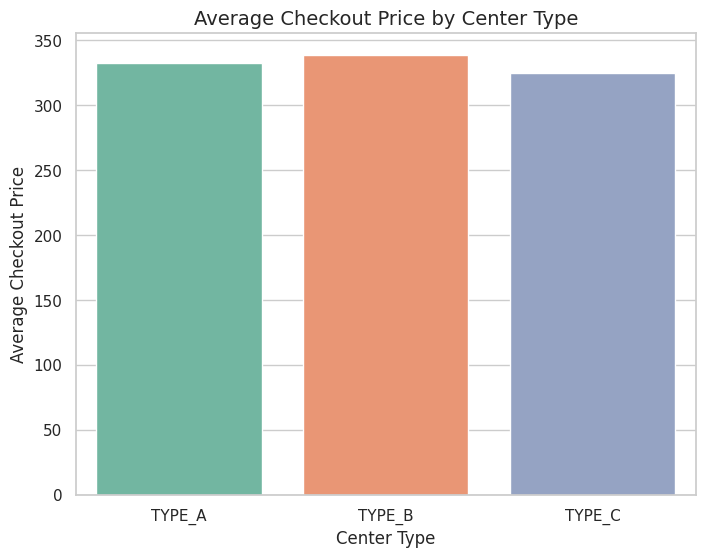

In [115]:
# Compute mean checkout and base prices for each center_type
center_type_pricing = (
    merged_data.groupby('center_type')
    .agg({'checkout_price': 'mean', 'base_price': 'mean'})
    .reset_index()
)

# Display results
print(center_type_pricing)

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.barplot(
    data=center_type_pricing,
    x='center_type',
    y='checkout_price',
    palette='Set2'
)
plt.title("Average Checkout Price by Center Type", fontsize=14)
plt.xlabel("Center Type", fontsize=12)
plt.ylabel("Average Checkout Price", fontsize=12)
plt.show()


In [116]:
# Group by center_type and meal_id to calculate average checkout prices
meal_pricing_by_center = (
    merged_data.groupby(['center_type', 'meal_id'])
    .agg({'checkout_price': 'mean'})
    .reset_index()
)

# Identify meals with the largest price differences across center_type
price_differences = (
    meal_pricing_by_center.groupby('meal_id')['checkout_price']
    .agg(['max', 'min', 'mean'])
    .assign(price_diff=lambda x: x['max'] - x['min'])
    .sort_values('price_diff', ascending=False)
)

# Display meals with the highest price differences
print(price_differences.head(10))


                max         min        mean  price_diff
meal_id                                                
2867     617.783541  596.062728  608.170339   21.720813
1445     616.540038  599.529595  609.845828   17.010443
2444     615.534026  601.341691  609.282977   14.192336
2306     297.394152  286.000584  291.935472   11.393567
2956     580.125155  568.816010  576.143275   11.309145
1198     185.703800  175.075791  179.126463   10.628009
1571     580.849400  573.078951  577.924566    7.770449
1109     273.018209  265.542002  270.121936    7.476208
1803     176.727657  169.976228  172.622144    6.751429
1311     175.418977  168.720521  171.187575    6.698456


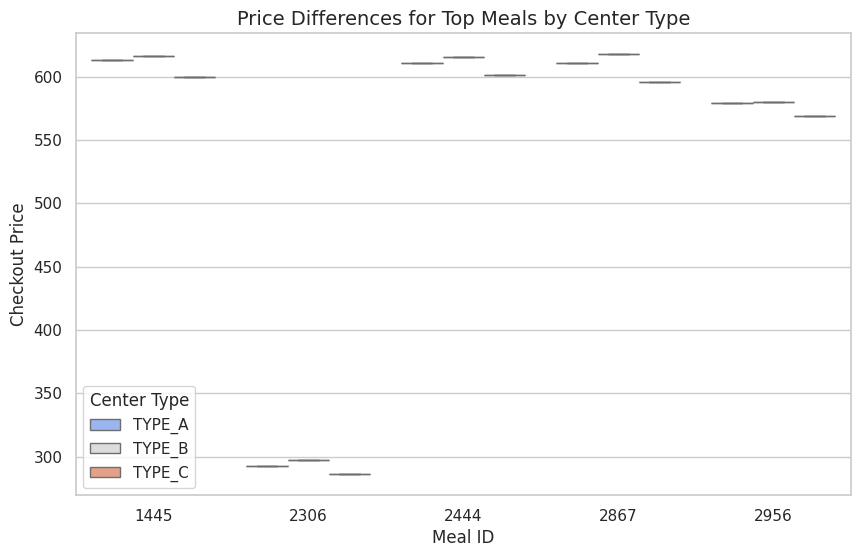

In [117]:
# Filter data for meals with high price differences
top_diff_meals = price_differences.head(5).index
filtered_data = meal_pricing_by_center[meal_pricing_by_center['meal_id'].isin(top_diff_meals)]

plt.figure(figsize=(10, 6))
sns.boxplot(
    data=filtered_data,
    x='meal_id',
    y='checkout_price',
    hue='center_type',
    palette='coolwarm'
)
plt.title("Price Differences for Top Meals by Center Type", fontsize=14)
plt.xlabel("Meal ID", fontsize=12)
plt.ylabel("Checkout Price", fontsize=12)
plt.legend(title="Center Type")
plt.show()


In [118]:
from scipy.stats import shapiro, levene, f_oneway
import statsmodels.api as sm
import statsmodels.stats.multicomp as mc

# Check Normality (Shapiro-Wilk test) for each center_type
for center in merged_data['center_type'].unique():
    stat, p_value = shapiro(merged_data[merged_data['center_type'] == center]['checkout_price'])
    print(f"Center Type: {center}, Shapiro-Wilk p-value: {p_value}")

# Check Homogeneity of Variances (Levene's test)
stat, p_value = levene(
    *[merged_data[merged_data['center_type'] == center]['checkout_price'] for center in merged_data['center_type'].unique()]
)
print(f"Levene's Test p-value: {p_value}")


Center Type: TYPE_C, Shapiro-Wilk p-value: 2.7347240839255047e-96
Center Type: TYPE_B, Shapiro-Wilk p-value: 9.406138015168369e-94
Center Type: TYPE_A, Shapiro-Wilk p-value: 3.1764668310084377e-114
Levene's Test p-value: 7.602206283196028e-47


In [119]:
from scipy.stats import kruskal
import scikit_posthocs as sp

# Perform Kruskal-Wallis Test
kruskal_stat, kruskal_p = kruskal(
    *[merged_data[merged_data['center_type'] == center]['checkout_price']
      for center in merged_data['center_type'].unique()]
)

print(f"Kruskal-Wallis Test Statistic: {kruskal_stat}")
print(f"Kruskal-Wallis Test p-value: {kruskal_p}")

# Interpret Kruskal-Wallis Test Result
if kruskal_p < 0.05:
    print("Significant differences exist between the medians of the groups.")
else:
    print("No significant differences between the medians of the groups.")

# Post Hoc Analysis (Dunn Test) if Kruskal-Wallis is significant
if kruskal_p < 0.05:
    dunn_test = sp.posthoc_dunn(
        merged_data,
        val_col='checkout_price',
        group_col='center_type',
        p_adjust='bonferroni'
    )
    print("Pairwise comparisons (Dunn Test):")
    print(dunn_test)


Kruskal-Wallis Test Statistic: 337.52579033214806
Kruskal-Wallis Test p-value: 5.095723790095857e-74
Significant differences exist between the medians of the groups.
Pairwise comparisons (Dunn Test):
              TYPE_A        TYPE_B        TYPE_C
TYPE_A  1.000000e+00  3.248527e-23  2.417218e-33
TYPE_B  3.248527e-23  1.000000e+00  2.250936e-74
TYPE_C  2.417218e-33  2.250936e-74  1.000000e+00


In [120]:
from scipy.stats import kruskal
import scikit_posthocs as sp

# Perform Kruskal-Wallis Test
kruskal_stat, kruskal_p = kruskal(
    *[merged_data[merged_data['center_type'] == center]['checkout_price']
      for center in merged_data['center_type'].unique()]
)

print(f"Kruskal-Wallis Test Statistic: {kruskal_stat}")
print(f"Kruskal-Wallis Test p-value: {kruskal_p}")

# Interpret Kruskal-Wallis Test Result
if kruskal_p < 0.05:
    print("Significant differences exist between the medians of the groups.")
else:
    print("No significant differences between the medians of the groups.")


Kruskal-Wallis Test Statistic: 337.52579033214806
Kruskal-Wallis Test p-value: 5.095723790095857e-74
Significant differences exist between the medians of the groups.


In [121]:

# Post Hoc Analysis (Dunn Test) if Kruskal-Wallis is significant
if kruskal_p < 0.05:
    dunn_test = sp.posthoc_dunn(
        merged_data,
        val_col='checkout_price',
        group_col='center_type',
        p_adjust='bonferroni'
    )
    print("Pairwise comparisons (Dunn Test):")
    print(dunn_test)


Pairwise comparisons (Dunn Test):
              TYPE_A        TYPE_B        TYPE_C
TYPE_A  1.000000e+00  3.248527e-23  2.417218e-33
TYPE_B  3.248527e-23  1.000000e+00  2.250936e-74
TYPE_C  2.417218e-33  2.250936e-74  1.000000e+00


In [122]:
import numpy as np

# Convert to NumPy array for the heatmap
p_values_matrix = dunn_test.to_numpy()


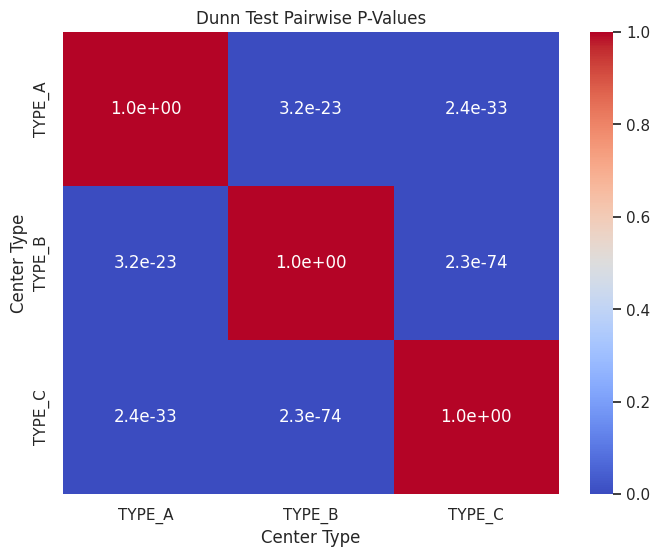

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt

# Labels for the heatmap (from the Dunn results DataFrame)
labels = dunn_test.columns

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(p_values_matrix, annot=True, fmt=".1e", xticklabels=labels, yticklabels=labels, cmap="coolwarm", cbar=True)

plt.title("Dunn Test Pairwise P-Values")
plt.xlabel("Center Type")
plt.ylabel("Center Type")
plt.show()


In [124]:
## dispalying the data
merged_data

id  week  center_id  meal_id  checkout_price  base_price  \
0       1379560     1         55     1885          136.83      152.29   
1       1466964     1         55     1993          136.83      135.83   
2       1346989     1         55     2539          134.86      135.86   
3       1338232     1         55     2139          339.50      437.53   
4       1448490     1         55     2631          243.50      242.50   
...         ...   ...        ...      ...             ...         ...   
456543  1271326   145         61     1543          484.09      484.09   
456544  1062036   145         61     2304          482.09      482.09   
456545  1110849   145         61     2664          237.68      321.07   
456546  1147725   145         61     2569          243.50      313.34   
456547  1361984   145         61     2490          292.03      290.03   

        emailer_for_promotion  homepage_featured  num_orders   category  ...  \
0                           0                  0         177  Beverages  ...   
1                           0                  0         270  Beverages  ...   
2                           0                  0         189  Beverages  ...   
3                           0                  0          54  Beverages  ...   
4                           0                  0          40  Beverages  ...   
...                       ...                ...         ...        ...  ...   
456543                      0                  0          68     Desert  ...   
456544                      0                  0          42     Desert  ...   
456545                      0                  0         501      Salad  ...   
456546                      0                  0         729      Salad  ...   
456547                      0                  0         162      Salad  ...   

       center_type  op_area  discount both_promotions  op_area_bin  \
0           TYPE_C      2.0     15.46               0        Small   
1           TYPE_C      2.0     -1.00               0        Small   
2           TYPE_C      2.0      1.00               0        Small   
3           TYPE_C      2.0     98.03               0        Small   
4           TYPE_C      2.0     -1.00               0        Small   
...            ...      ...       ...             ...          ...   
456543      TYPE_A      4.5      0.00               0        Large   
456544      TYPE_A      4.5      0.00               0        Large   
456545      TYPE_A      4.5     83.39               0        Large   
456546      TYPE_A      4.5     69.84               0        Large   
456547      TYPE_A      4.5     -2.00               0        Large   

        profit_margin  promotion_status absolute_discount  relative_discount  \
0          -11.298692              None             15.46          10.151684   
1            0.730834              None             -1.00          -0.736214   
2           -0.741510              None              1.00           0.736052   
3          -28.874816              None             98.03          22.405321   
4            0.410678              None             -1.00          -0.412371   
...               ...               ...               ...                ...   
456543       0.000000              None              0.00           0.000000   
456544       0.000000              None              0.00           0.000000   
456545     -35.084988              None             83.39          25.972529   
456546     -28.681725              None             69.84          22.288887   
456547       0.684861              None             -2.00          -0.689584   

       demand_category  
0          High-Demand  
1          High-Demand  
2           Low-Demand  
3           Low-Demand  
4           Low-Demand  
...                ...  
456543      Low-Demand  
456544      Low-Demand  
456545     High-Demand  
456546      Low-Demand  
456547      Low-Demand  

[456548 rows x 23 columns]

In [125]:
## checking the data columns
merged_data.columns

Index(['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'num_orders', 'category',
       'cuisine', 'city_code', 'region_code', 'center_type', 'op_area',
       'discount', 'both_promotions', 'op_area_bin', 'profit_margin',
       'promotion_status', 'absolute_discount', 'relative_discount',
       'demand_category'],
      dtype='object')

In [126]:
# Create lagged features for 'base_price' and 'discount_price'
merged_data['base_price_lag_1'] = merged_data['base_price'].shift(1)
merged_data['base_price_lag_7'] = merged_data['base_price'].shift(7)
merged_data['base_price_lag_30'] = merged_data['base_price'].shift(30)

merged_data['discount_price_lag_1'] = merged_data['absolute_discount'].shift(1)
merged_data['discount_price_lag_7'] = merged_data['absolute_discount'].shift(7)
merged_data['discount_price_lag_30'] = merged_data['absolute_discount'].shift(30)

# Drop rows with NaNs created by the shifting
merged_data = merged_data.dropna()


In [127]:
from statsmodels.api import OLS, add_constant

# Define features and target variable
X = merged_data[['base_price_lag_1', 'base_price_lag_7', 'discount_price_lag_1', 'discount_price_lag_7']]
y = merged_data['num_orders']

# Add constant for intercept
X = add_constant(X)

# Fit the OLS regression model
model = OLS(y, X).fit()

# Display the summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:             num_orders   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     3291.
Date:                Fri, 22 Nov 2024   Prob (F-statistic):               0.00
Time:                        15:39:35   Log-Likelihood:            -3.3718e+06
No. Observations:              456518   AIC:                         6.744e+06
Df Residuals:                  456513   BIC:                         6.744e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  454.5039 

In [128]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
X = merged_data[['base_price_lag_1', 'base_price_lag_7', 'discount_price_lag_1', 'discount_price_lag_7']]
X = sm.add_constant(X)  # Add constant for intercept
vif_data = pd.DataFrame({
    'Feature': X.columns,
    'VIF': [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
})
print(vif_data)


                Feature        VIF
0                 const  10.343170
1      base_price_lag_1   1.108249
2      base_price_lag_7   1.106586
3  discount_price_lag_1   1.104922
4  discount_price_lag_7   1.105269


In [129]:
## checking for data
merged_data

id  week  center_id  meal_id  checkout_price  base_price  \
30      1038567     1         55     1525          243.50      282.33   
31      1325272     1         55     2704          243.50      282.33   
32      1412058     1         55     2304          484.03      484.03   
33      1040403     1         24     1885          136.83      136.83   
34      1012104     1         24     1993          134.83      135.83   
...         ...   ...        ...      ...             ...         ...   
456543  1271326   145         61     1543          484.09      484.09   
456544  1062036   145         61     2304          482.09      482.09   
456545  1110849   145         61     2664          237.68      321.07   
456546  1147725   145         61     2569          243.50      313.34   
456547  1361984   145         61     2490          292.03      290.03   

        emailer_for_promotion  homepage_featured  num_orders      category  \
30                          0                  0          15  Other Snacks   
31                          0                  0          13  Other Snacks   
32                          0                  0          13        Desert   
33                          0                  0        1498     Beverages   
34                          0                  1        1243     Beverages   
...                       ...                ...         ...           ...   
456543                      0                  0          68        Desert   
456544                      0                  0          42        Desert   
456545                      0                  0         501         Salad   
456546                      0                  0         729         Salad   
456547                      0                  0         162         Salad   

        ... promotion_status  absolute_discount  relative_discount  \
30      ...             None              38.83          13.753409   
31      ...             None              38.83          13.753409   
32      ...             None               0.00           0.000000   
33      ...             None               0.00           0.000000   
34      ...    Homepage Only               1.00           0.736214   
...     ...              ...                ...                ...   
456543  ...             None               0.00           0.000000   
456544  ...             None               0.00           0.000000   
456545  ...             None              83.39          25.972529   
456546  ...             None              69.84          22.288887   
456547  ...             None              -2.00          -0.689584   

       demand_category  base_price_lag_1  base_price_lag_7  base_price_lag_30  \
30          Low-Demand            626.62            188.24             152.29   
31          Low-Demand            282.33            610.13             135.83   
32          Low-Demand            282.33            612.13             135.86   
33         High-Demand            484.03            612.13             437.53   
34         High-Demand            136.83            627.62             242.50   
...                ...               ...               ...                ...   
456543      Low-Demand            455.93            549.08             157.14   
456544      Low-Demand            484.09            547.08             153.26   
456545     High-Demand            482.09            726.53             234.74   
456546      Low-Demand            321.07            260.93             359.87   
456547      Low-Demand            313.34            321.13             367.63   

       discount_price_lag_1  discount_price_lag_7 discount_price_lag_30  
30                    -2.00                 70.84                 15.46  
31                    38.83                 27.10                 -1.00  
32                    38.83                 29.10                  1.00  
33                     0.00                 30.10                 98.03  
34             

In [130]:
## checking for missing values
merged_data.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
category                 0
cuisine                  0
city_code                0
region_code              0
center_type              0
op_area                  0
discount                 0
both_promotions          0
op_area_bin              0
profit_margin            0
promotion_status         0
absolute_discount        0
relative_discount        0
demand_category          0
base_price_lag_1         0
base_price_lag_7         0
base_price_lag_30        0
discount_price_lag_1     0
discount_price_lag_7     0
discount_price_lag_30    0
dtype: int64

In [131]:
## checking for duplicates
merged_data.duplicated(keep='first').sum()

0

In [132]:
## checking for deescriptive stats
merged_data.describe().T

count          mean            std             min  \
id                     456518.0  1.250096e+06  144354.439119  1000000.000000   
week                   456518.0  7.477362e+01      41.522014        1.000000   
center_id              456518.0  8.210758e+01      45.976032       10.000000   
meal_id                456518.0  2.024340e+03     547.421661     1062.000000   
checkout_price         456518.0  3.322389e+02     152.939218        2.970000   
base_price             456518.0  3.541562e+02     160.716040       55.350000   
emailer_for_promotion  456518.0  8.114686e-02       0.273061        0.000000   
homepage_featured      456518.0  1.091983e-01       0.311888        0.000000   
num_orders             456518.0  2.618717e+02     395.929580       13.000000   
city_code              456518.0  6.015504e+02      66.197064      456.000000   
region_code            456518.0  5.661461e+01      17.641884       23.000000   
op_area                456518.0  4.083727e+00       1.091592        0.900000   
discount               456518.0  2.191732e+01      48.496538     -185.300000   
both_promotions        456518.0  4.212320e-02       0.200870        0.000000   
profit_margin          456518.0 -8.295603e+00      24.693910   -10548.148148   
absolute_discount      456518.0  2.191732e+01      48.496538     -185.300000   
relative_discount      456518.0  5.719345e+00      11.362736      -72.789753   
base_price_lag_1       456518.0  3.541569e+02     160.716518       55.350000   
base_price_lag_7       456518.0  3.541589e+02     160.718750       55.350000   
base_price_lag_30      456518.0  3.541531e+02     160.717887       55.350000   
discount_price_lag_1   456518.0  2.191732e+01      48.496538     -185.300000   
discount_price_lag_7   456518.0  2.191733e+01      48.496437     -185.300000   
discount_price_lag_30  456518.0  2.191832e+01      48.496802     -185.300000   

                                25%           50%           75%           max  
id                     1.124998e+06  1.250182e+06  1.375139e+06  1.499999e+06  
week                   3.900000e+01  7.600000e+01  1.110000e+02  1.450000e+02  
center_id              4.300000e+01  7.600000e+01  1.100000e+02  1.860000e+02  
meal_id                1.558000e+03  1.993000e+03  2.539000e+03  2.956000e+03  
checkout_price         2.289500e+02  2.968200e+02  4.452300e+02  8.662700e+02  
base_price             2.435000e+02  3.104600e+02  4.588700e+02  8.662700e+02  
emailer_for_promotion  0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00  
homepage_featured      0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00  
num_orders             5.400000e+01  1.360000e+02  3.240000e+02  2.429900e+04  
city_code              5.530000e+02  5.960000e+02  6.510000e+02  7.130000e+02  
region_code            3.400000e+01  5.600000e+01  7.700000e+01  9.300000e+01  
op_area                3.600000e+00  4.000000e+00  4.500000e+00  7.000000e+00  
discount              -1.000000e+00  1.000000e+00  1.652000e+01  5.616000e+02  
both_promotions        0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00  
profit_margin         -6.654450e+00 -1.414167e-01  1.451948e-01  4.212620e+01  
absolute_discount     -1.000000e+00  1.000000e+00  1.652000e+01  5.616000e+02  
relative_discount     -1.454059e-01  1.412170e-01  6.239261e+00  9.906087e+01  
base_price_lag_1       2.435000e+02  3.104600e+02  4.588700e+02  8.662700e+02  
base_price_lag_7       2.435000e+02  3.104600e+02  4.588700e+02  8.662700e+02  
base_price_lag_30      2.435000e+02  3.104600e+02  4.588700e+02  8.662700e+02  
discount_price_lag_1  -1.000000e+00  1.000000e+00  1.652000e+01  5.616000e+02  
discount_price_lag_7  -1.000000e+00  1.000000e+00  1.652000e+01  5.616000e+02  
discount_price_lag_30 -1.000000e+00  1.000000e+00  1.652000e+01  5.616000e+02

In [133]:
merged_data['meal_week_price_rank'] = merged_data.groupby(['meal_id', 'week'])['base_price'].transform('rank')

## MODELLING

In [134]:
x= merged_data.drop(columns=['id','num_orders'])
y = np.log1p(merged_data['num_orders'])

In [135]:
## displaying the data
x.head()

week  center_id  meal_id  checkout_price  base_price  \
30     1         55     1525          243.50      282.33   
31     1         55     2704          243.50      282.33   
32     1         55     2304          484.03      484.03   
33     1         24     1885          136.83      136.83   
34     1         24     1993          134.83      135.83   

    emailer_for_promotion  homepage_featured      category cuisine  city_code  \
30                      0                  0  Other Snacks    Thai        647   
31                      0                  0  Other Snacks    Thai        647   
32                      0                  0        Desert  Indian        647   
33                      0                  0     Beverages    Thai        614   
34                      0                  1     Beverages    Thai        614   

    ...  absolute_discount relative_discount  demand_category  \
30  ...              38.83         13.753409       Low-Demand   
31  ...              38.83         13.753409       Low-Demand   
32  ...               0.00          0.000000       Low-Demand   
33  ...               0.00          0.000000      High-Demand   
34  ...               1.00          0.736214      High-Demand   

    base_price_lag_1  base_price_lag_7 base_price_lag_30  \
30            626.62            188.24            152.29   
31            282.33            610.13            135.83   
32            282.33            612.13            135.86   
33            484.03            612.13            437.53   
34            136.83            627.62            242.50   

    discount_price_lag_1 discount_price_lag_7  discount_price_lag_30  \
30                 -2.00                70.84                  15.46   
31                 38.83                27.10                  -1.00   
32                 38.83                29.10                   1.00   
33                  0.00                30.10                  98.03   
34                  0.00                -1.00                  -1.00   

    meal_week_price_rank  
30                  57.0  
31                  56.0  
32                   6.0  
33                  70.0  
34                  60.0  

[5 rows x 28 columns]

In [136]:
## checking for y
y

30        2.772589
31        2.639057
32        2.639057
33        7.312553
34        7.126087
            ...   
456543    4.234107
456544    3.761200
456545    6.218600
456546    6.593045
456547    5.093750
Name: num_orders, Length: 456518, dtype: float64

In [137]:
## The Pipe line structure
## Numerical Features
      ## scaling
      ## quantile transformation
      ## removing missing values(impuataion techniques)
## Categorical Features
   ## One hot Encoding
   ## imputation
   ## removing missing values (imputation techniques)


In [138]:
## print data
merged_data

id  week  center_id  meal_id  checkout_price  base_price  \
30      1038567     1         55     1525          243.50      282.33   
31      1325272     1         55     2704          243.50      282.33   
32      1412058     1         55     2304          484.03      484.03   
33      1040403     1         24     1885          136.83      136.83   
34      1012104     1         24     1993          134.83      135.83   
...         ...   ...        ...      ...             ...         ...   
456543  1271326   145         61     1543          484.09      484.09   
456544  1062036   145         61     2304          482.09      482.09   
456545  1110849   145         61     2664          237.68      321.07   
456546  1147725   145         61     2569          243.50      313.34   
456547  1361984   145         61     2490          292.03      290.03   

        emailer_for_promotion  homepage_featured  num_orders      category  \
30                          0                  0          15  Other Snacks   
31                          0                  0          13  Other Snacks   
32                          0                  0          13        Desert   
33                          0                  0        1498     Beverages   
34                          0                  1        1243     Beverages   
...                       ...                ...         ...           ...   
456543                      0                  0          68        Desert   
456544                      0                  0          42        Desert   
456545                      0                  0         501         Salad   
456546                      0                  0         729         Salad   
456547                      0                  0         162         Salad   

        ... absolute_discount  relative_discount  demand_category  \
30      ...             38.83          13.753409       Low-Demand   
31      ...             38.83          13.753409       Low-Demand   
32      ...              0.00           0.000000       Low-Demand   
33      ...              0.00           0.000000      High-Demand   
34      ...              1.00           0.736214      High-Demand   
...     ...               ...                ...              ...   
456543  ...              0.00           0.000000       Low-Demand   
456544  ...              0.00           0.000000       Low-Demand   
456545  ...             83.39          25.972529      High-Demand   
456546  ...             69.84          22.288887       Low-Demand   
456547  ...             -2.00          -0.689584       Low-Demand   

       base_price_lag_1  base_price_lag_7  base_price_lag_30  \
30               626.62            188.24             152.29   
31               282.33            610.13             135.83   
32               282.33            612.13             135.86   
33               484.03            612.13             437.53   
34               136.83            627.62             242.50   
...                 ...               ...                ...   
456543           455.93            549.08             157.14   
456544           484.09            547.08             153.26   
456545           482.09            726.53             234.74   
456546           321.07            260.93             359.87   
456547           313.34            321.13             367.63   

        discount_price_lag_1 discount_price_lag_7  discount_price_lag_30  \
30                     -2.00                70.84                  15.46   
31                     38.83                27.10                  -1.00   
32                     38.83                29.10                   1.00   
33                      0.00                30.10                  98.03   
34                      0.00                -1.00                  -1.00   
...                      ...                  ...                    ...   
456543                  0.00                 2.00                   6

In [139]:
def create_more_features(df):
  # Compute base_price_max, base_price_mean, and base_price_min
  df['base_price_max'] = df['base_price'].groupby(df['meal_id']).transform('max')
  df['base_price_mean'] = df['base_price'].groupby(df['meal_id']).transform('mean')
  df['base_price_min'] = df['base_price'].groupby(df['meal_id']).transform('min')

  # Compute center_cat_count
  # df['center_cat_count'] = df.groupby(['center_id', 'category'])['num_orders'].transform('count')

  # Compute center_cat_price_rank
  df['center_cat_price_rank'] = df.groupby(['center_id', 'category'])['base_price'].transform('rank')

  # Compute center_cat_week_count
  # df['center_cat_week_count'] = df.groupby(['center_id', 'category', 'week'])['num_orders'].transform('sum')

  # Compute center_cui_count
  # df['center_cui_count'] = df.groupby(['center_id', 'cuisine'])['num_orders'].transform('count')

  # Compute center_price_rank
  df['center_price_rank'] = df.groupby(['center_id'])['base_price'].transform('rank')

  # Compute center_week_count
  # df['center_week_count'] = df.groupby(['center_id', 'week'])['num_orders'].transform('sum')

  # Compute center_week_price_rank
  df['center_week_price_rank'] = df.groupby(['center_id', 'week'])['base_price'].transform('rank')

  # Compute city_meal_week_count
  # df['city_meal_week_count'] = df.groupby(['city_code', 'meal_id', 'week'])['num_orders'].transform('sum')

  # Compute meal_count
  # df['meal_count'] = df.groupby(['meal_id'])['num_orders'].transform('sum')

  # Compute meal_city_price_rank
  df['meal_city_price_rank'] = df.groupby(['meal_id', 'city_code'])['base_price'].transform('rank')

  # Compute meal_price_max, meal_price_mean, and meal_price_min
  df['meal_price_max'] = df['base_price'].groupby(df['meal_id']).transform('max')
  df['meal_price_mean'] = df['base_price'].groupby(df['meal_id']).transform('mean')
  df['meal_price_min'] = df['base_price'].groupby(df['meal_id']).transform('min')

  # Compute meal_price_rank
  df['meal_price_rank'] = df.groupby(['meal_id'])['base_price'].transform('rank')

  # Compute meal_region_price_rank
  df['meal_region_price_rank'] = df.groupby(['meal_id', 'region_code'])['base_price'].transform('rank')

  # Compute meal_week_count
  # df['meal_week_count'] = df.groupby(['meal_id', 'week'])['num_orders'].transform('sum')

  # Compute meal_week_price_rank
  df['meal_week_price_rank'] = df.groupby(['meal_id', 'week'])['base_price'].transform('rank')

  # Compute region_meal_count
  # df['region_meal_count'] = df.groupby(['region_code', 'meal_id'])['num_orders'].transform('sum')

  # Compute region_meal_week_count
  # df['region_meal_week_count'] = df.groupby(['region_code', 'meal_id', 'week'])['num_orders'].transform('sum')

  # Compute type_meal_week_count
  # df['type_meal_week_count'] = df.groupby(['center_id', 'week', 'meal_id'])['num_orders'].transform('sum')

  return df

merged_data = create_more_features(merged_data)

In [140]:
## print merged data
merged_data.head()

id  week  center_id  meal_id  checkout_price  base_price  \
30  1038567     1         55     1525          243.50      282.33   
31  1325272     1         55     2704          243.50      282.33   
32  1412058     1         55     2304          484.03      484.03   
33  1040403     1         24     1885          136.83      136.83   
34  1012104     1         24     1993          134.83      135.83   

    emailer_for_promotion  homepage_featured  num_orders      category  ...  \
30                      0                  0          15  Other Snacks  ...   
31                      0                  0          13  Other Snacks  ...   
32                      0                  0          13        Desert  ...   
33                      0                  0        1498     Beverages  ...   
34                      0                  1        1243     Beverages  ...   

   base_price_min  center_cat_price_rank  center_price_rank  \
30         214.43                  120.5             1765.0   
31         241.53                  120.5             1765.0   
32         293.00                  235.5             4090.0   
33          88.27                   15.0               15.0   
34          83.42                   11.0               11.0   

   center_week_price_rank  meal_city_price_rank  meal_price_max  \
30                    1.5                  10.5          321.13   
31                    1.5                  15.0          321.13   
32                    3.0                 134.0          738.23   
33                    3.0                  18.0          179.51   
34                    1.0                  17.5          165.93   

    meal_price_mean meal_price_min  meal_price_rank meal_region_price_rank  
30       291.396523         214.43           1550.0                  332.5  
31       291.448204         241.53           1625.5                  288.0  
32       488.954746         293.00           4285.0                 1441.0  
33       129.508323          88.27           6313.5                   81.0  
34       129.528472          83.42           6271.0                   97.0  

[5 rows x 42 columns]

In [141]:
## checking for the shape
merged_data.shape

(456518, 42)

In [142]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import QuantileTransformer
import category_encoders as ce
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np
import pandas as pd

# Ensure data is sorted by time (week)
merged_data.sort_values(by="week", inplace=True)

# Define features and target
X = merged_data.drop(columns=['num_orders', 'id', 'week'])
y = merged_data['num_orders']

# Define categorical and numerical columns
categorical_columns = X.select_dtypes(include=['object', 'category']).columns
numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns

# Numerical pipeline: Impute, transform, scale
numerical_transformers = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='mean')),
    ('quantile_transform', QuantileTransformer(output_distribution='normal')),
])

# Categorical pipeline: Impute and binary encode
categorical_transformers = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='constant', fill_value='missing')),
    ('binary_encode', ce.BinaryEncoder( handle_unknown='ignore', drop_invariant=True, return_df=True))
])

# Preprocessor for numerical and categorical merged_data
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformers, numerical_columns),
    ('cat', categorical_transformers, categorical_columns)
], remainder='drop')

# Create the full pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', XGBRegressor())
])

# Train-test split (time-based split)
train_data = merged_data[merged_data['week'] <= (merged_data['week'].max() - 10)]
test_data = merged_data[merged_data['week'] > (merged_data['week'].max() - 10)]

X_train = train_data.drop(columns=['num_orders', 'id', 'week'])
y_train = np.log1p(train_data['num_orders'])
X_test = test_data.drop(columns=['num_orders', 'id', 'week'])
y_test = np.log1p(test_data['num_orders'])

# Train the model
pipeline.fit(X_train, y_train)



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('quantile_transform',
                                                                   QuantileTransformer(output_distribution='normal'))]),
                                                  Index(['center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'city_code',
       'region_code', 'op_area', 'discount', 'both_promo...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [143]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error,r2_score,mean_squared_log_error
# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
print("Mean Absolute Error (MAE):", mean_absolute_error(np.expm1(y_test), np.expm1(y_pred)))  # Exponentiate to get original scale
print("R2 Score:", r2_score(np.expm1(y_test), np.expm1(y_pred)))

Mean Absolute Error (MAE): 70.99151450826893
R2 Score: 0.80631427278674


In [144]:
mse = mean_squared_error(np.expm1(y_test), np.expm1(y_pred))
msle = mean_squared_log_error(np.expm1(y_test), np.expm1(y_pred))
rmse = np.sqrt(mse).round(2)
rmsle = np.sqrt(msle).round(5)
mae   = mean_absolute_error(np.expm1(y_test), np.expm1(y_pred))
r_squared  = r2_score(np.expm1(y_test), np.expm1(y_pred))
medae  = median_absolute_error(np.expm1(y_test), np.expm1(y_pred))

# Append the results to the DataFrame
xgb_results = pd.DataFrame([['Xgboost Regressor', mse, msle, rmse, rmsle,mae,r_squared,medae]],
                             columns=['Model', 'MSE', 'MSLE', 'RMSE', 'RMSLE','MAE','R^2','MedAE'])
xgb_results

Model           MSE      MSLE    RMSE    RMSLE        MAE  \
0  Xgboost Regressor  14817.744588  0.270263  121.73  0.51987  70.991515   

        R^2      MedAE  
0  0.806314  37.753784

In [145]:

# Optional: Combine predictions with actual values for comparison
results = test_data.copy()
results['predicted_num_orders'] = np.expm1(y_pred)
print(results[['week', 'num_orders', 'predicted_num_orders']])


        week  num_orders  predicted_num_orders
426893   136         379            300.409515
426910   136         836            898.137024
426911   136         540            512.013733
426912   136          53             33.416950
426913   136         231            219.632034
...      ...         ...                   ...
456540   145         134             78.380127
456486   145          14             23.726835
456509   145         149            199.903656
456528   145          54             39.623974
456492   145          27             93.137405

[32821 rows x 3 columns]


## LinearRegression

In [146]:
from sklearn.linear_model import LinearRegression

# Define the Linear Regression model
Linear_reg_model = LinearRegression()

# Replace the model in the existing pipeline
pipeline.set_params(model=Linear_reg_model)

# Fit the pipeline with training data
pipeline.fit(X_train, y_train)




Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('quantile_transform',
                                                                   QuantileTransformer(output_distribution='normal'))]),
                                                  Index(['center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'city_code',
       'region_code', 'op_area', 'discount', 'both_promo...
       'meal_region_price_rank'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('binary_encode',
                                                                   BinaryEncoder(drop_invariant=True,
                                                                                 handle_unknown='ignore'))]),
                                                  Index(['category', 'cuisine', 'center_type', 'op_area_bin', 'promotion_status',
       'demand_category'],
      dtype='object'))])),
                ('model', LinearRegression())])

In [147]:
# Now you can predict using the pipeline
y_pred = pipeline.predict(X_test)

In [148]:
mse = mean_squared_error(np.expm1(y_test), np.expm1(y_pred))
msle = mean_squared_log_error(np.expm1(y_test), np.expm1(y_pred))
rmse = np.sqrt(mse).round(2)
rmsle = np.sqrt(msle).round(5)
mae   = mean_absolute_error(np.expm1(y_test), np.expm1(y_pred))
r_squared  = r2_score(np.expm1(y_test), np.expm1(y_pred))

# Append the results to the DataFrame
linear_results = pd.DataFrame([['Linear Regression', mse, msle, rmse, rmsle,mae,r_squared]],
                             columns=['Model', 'MSE', 'MSLE', 'RMSE', 'RMSLE','MAE','R^2'])
linear_results

Model           MSE      MSLE    RMSE    RMSLE         MAE  \
0  Linear Regression  45445.296356  0.524695  213.18  0.72436  116.142174   

        R^2  
0  0.405975

## LGBMRegressor

In [149]:
from lightgbm import LGBMRegressor
# Define the Lineear Regression
lightgbm = LGBMRegressor()

# Replace the model in the existing pipeline
pipeline.set_params(model= lightgbm)

# Fit the pipeline with training data
pipeline.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.086602 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5087
[LightGBM] [Info] Number of data points in the train set: 423697, number of used features: 50
[LightGBM] [Info] Start training from score 4.892788


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('quantile_transform',
                                                                   QuantileTransformer(output_distribution='normal'))]),
                                                  Index(['center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'city_code',
       'region_code', 'op_area', 'discount', 'both_promo...
       'meal_region_price_rank'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('binary_encode',
                                                                   BinaryEncoder(drop_invariant=True,
                                                                                 handle_unknown='ignore'))]),
                                                  Index(['category', 'cuisine', 'center_type', 'op_area_bin', 'promotion_status',
       'demand_category'],
      dtype='object'))])),
                ('model', LGBMRegressor())])

In [150]:
 ## Evaluation on the training data
y_pred = pipeline.predict(X_train)
mse = mean_squared_error(np.expm1(y_train), np.expm1(y_pred))
msle = mean_squared_log_error(np.expm1(y_train), np.expm1(y_pred))
rmse = np.sqrt(mse).round(2)
rmsle = np.sqrt(msle).round(5)
mae   = mean_absolute_error(np.expm1(y_train), np.expm1(y_pred))
r_squared  = r2_score(np.expm1(y_train), np.expm1(y_pred))

# Append the results to the DataFrame
lightgbm_results = pd.DataFrame([['lightbgm Regressor', mse, msle, rmse, rmsle,mae,r_squared]],
                             columns=['Model', 'MSE', 'MSLE', 'RMSE', 'RMSLE','MAE','R^2'])
lightgbm_results

Model          MSE      MSLE    RMSE    RMSLE        MAE  \
0  lightbgm Regressor  44130.40212  0.288343  210.07  0.53698  89.156563   

        R^2  
0  0.729057

In [151]:
## Evaluate on the test data
 ## Evaluation on the training data
y_pred = pipeline.predict(X_test)
mse = mean_squared_error(np.expm1(y_test), np.expm1(y_pred))
msle = mean_squared_log_error(np.expm1(y_test), np.expm1(y_pred))
rmse = np.sqrt(mse).round(2)
rmsle = np.sqrt(msle).round(5)
mae   = mean_absolute_error(np.expm1(y_test), np.expm1(y_pred))
r_squared  = r2_score(np.expm1(y_test), np.expm1(y_pred))

# Append the results to the DataFrame
lightgbm_results_test = pd.DataFrame([['lightbgm Regressor', mse, msle, rmse, rmsle,mae,r_squared]],
                             columns=['Model', 'MSE', 'MSLE', 'RMSE', 'RMSLE','MAE','R^2'])
lightgbm_results_test

Model           MSE      MSLE    RMSE    RMSLE        MAE  \
0  lightbgm Regressor  18743.745639  0.303459  136.91  0.55087  78.459139   

        R^2  
0  0.754997

## CatBoost Regressor

In [153]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.8 MB/s eta 0:00:00


In [154]:
from catboost import CatBoostRegressor

# Initialize the model
## Light
# Define the Lineear Regression
catboost_reg = CatBoostRegressor(         # Number of boosting rounds; reduce to 500 if training is too slow.
         # Balanced learning rate for gradual convergence       # Ensures reproducibility.
    silent=True   )

# Replace the model in the existing pipeline
pipeline.set_params(model= catboost_reg)

# Fit the pipeline with training data
pipeline.fit(X_train, y_train)



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('quantile_transform',
                                                                   QuantileTransformer(output_distribution='normal'))]),
                                                  Index(['center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'city_code',
       'region_code', 'op_area', 'discount', 'both_promo...
                                                 ('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('binary_encode',
                                                                   BinaryEncoder(drop_invariant=True,
                                                                                 handle_unknown='ignore'))]),
                                                  Index(['category', 'cuisine', 'center_type', 'op_area_bin', 'promotion_status',
       'demand_category'],
      dtype='object'))])),
                ('model',
                 <catboost.core.CatBoostRegressor object at 0x7cb16e3caf20>)])

In [155]:
## Evaluate on the test data
y_pred_catboost = pipeline.predict(X_test)
mse = mean_squared_error(np.expm1(y_test), np.expm1(y_pred_catboost))
msle = mean_squared_log_error(np.expm1(y_test), np.expm1(y_pred_catboost))
rmse = np.sqrt(mse).round(2)
rmsle = np.sqrt(msle).round(5)
mae   = mean_absolute_error(np.expm1(y_test), np.expm1(y_pred_catboost))
r_squared  = r2_score(np.expm1(y_test), np.expm1(y_pred_catboost))

# Append the results to the DataFrame
catboost_results = pd.DataFrame([['CatBoost Regreessor', mse, msle, rmse, rmsle,mae,r_squared]],
                             columns=['Model', 'MSE', 'MSLE', 'RMSE', 'RMSLE','MAE','R^2'])
catboost_results


Model           MSE      MSLE    RMSE   RMSLE        MAE  \
0  CatBoost Regreessor  13787.048123  0.261529  117.42  0.5114  68.955975   

        R^2  
0  0.819787

In [156]:
results = test_data.copy()
results['predicted_num_orders_by_cat_boost'] = np.expm1(y_pred_catboost)
print(results[['week', 'num_orders', 'predicted_num_orders_by_cat_boost']])

        week  num_orders  predicted_num_orders_by_cat_boost
426893   136         379                         264.253166
426910   136         836                         857.349476
426911   136         540                         509.826042
426912   136          53                          37.566850
426913   136         231                         221.205163
...      ...         ...                                ...
456540   145         134                          83.950824
456486   145          14                          23.812428
456509   145         149                         198.678093
456528   145          54                          32.408477
456492   145          27                          88.922100

[32821 rows x 3 columns]


In [ ]:
# from catboost import CatBoostRegressor
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import mean_squared_error, r2_score

# # Define the CatBoost Regressor
# catboost_model = CatBoostRegressor(silent=True)  # Disable verbose output during training

# # Define the parameter grid
# param_grid = {
#     'iterations': [500, 1000],       # Number of boosting iterations
#     'depth': [4, 6, 8],             # Depth of the tree
#     'learning_rate': [0.01, 0.05, 0.1],  # Learning rate
#     'l2_leaf_reg': [1, 3, 5, 7],    # L2 regularization coefficient
# }

# # Set up GridSearchCV
# grid_search = GridSearchCV(
#     estimator=catboost_model,
#     param_grid=param_grid,
#     scoring='neg_mean_squared_error',  # Use negative MSE for scoring
#     cv=5,                             # 5-fold cross-validation
#     verbose=3,                        # Display progress
#     n_jobs=-1                         # Use all available CPUs
# )

# # Fit GridSearchCV on training data
# grid_search.fit(X_train, y_train)

# # Get the best parameters and the best model
# best_params = grid_search.best_params_
# best_model = grid_search.best_estimator_

# print("Best Parameters:", best_params)

# # Evaluate the best model on the test set
# y_pred = best_model.predict(X_test)
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print(f"Test MSE: {mse:.4f}")
# print(f"Test R²: {r2:.4f}")


###  Gradient Boosting Regreessor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
# # Define the Lineear Regression
# Gradboosting_reg = GradientBoostingRegressor(n_estimators=50)

# # Replace the model in the existing pipeline
# pipeline.set_params(model= Gradboosting_reg)

# # Fit the pipeline with training data
# pipeline.fit(X_train, y_train)

In [ ]:
# ## Evaluate on the test data
# y_pred = pipeline.predict(X_test)
# mse = mean_squared_error(y_test, y_pred)
# msle = mean_squared_log_error(y_test, y_pred)
# rmse = np.sqrt(mse).round(2)
# rmsle = np.sqrt(msle).round(5)
# mae   = mean_absolute_error(y_test, y_pred)
# r_squared  = r2_score(y_test , y_pred)

# # Append the results to the DataFrame
# GBR_results = pd.DataFrame([['Gradient_Boost Regreessor', mse, msle, rmse, rmsle,mae,r_squared]],
#                              columns=['Model', 'MSE', 'MSLE', 'RMSE', 'RMSLE','MAE','R^2'])
# GBR_results


## Model  Results dataframe

In [157]:
model_results = pd.concat([xgb_results,linear_results,lightgbm_results_test,catboost_results],ignore_index=True)

In [158]:
model_results

Model           MSE      MSLE    RMSE    RMSLE         MAE  \
0    Xgboost Regressor  14817.744588  0.270263  121.73  0.51987   70.991515   
1    Linear Regression  45445.296356  0.524695  213.18  0.72436  116.142174   
2   lightbgm Regressor  18743.745639  0.303459  136.91  0.55087   78.459139   
3  CatBoost Regreessor  13787.048123  0.261529  117.42  0.51140   68.955975   

        R^2      MedAE  
0  0.806314  37.753784  
1  0.405975        NaN  
2  0.754997        NaN  
3  0.819787        NaN

In [159]:

# # Optional: Format the table for better readability (e.g., rounding off metrics)
model_results.iloc[:, 1:] = model_results.iloc[:, 1:].round(2)
model_results

Model       MSE  MSLE    RMSE  RMSLE     MAE   R^2  MedAE
0    Xgboost Regressor  14817.74  0.27  121.73   0.52   70.99  0.81  37.75
1    Linear Regression  45445.30  0.52  213.18   0.72  116.14  0.41    NaN
2   lightbgm Regressor  18743.75  0.30  136.91   0.55   78.46  0.75    NaN
3  CatBoost Regreessor  13787.05  0.26  117.42   0.51   68.96  0.82    NaN

In [160]:

# # Display the table
# print("Model Performance Summary")
print(model_results.to_markdown(index=False))  # Using markdown for a clean CLI table, can be omitted for normal printing

| Model               |     MSE |   MSLE |   RMSE |   RMSLE |    MAE |   R^2 |   MedAE |
|:--------------------|--------:|-------:|-------:|--------:|-------:|------:|--------:|
| Xgboost Regressor   | 14817.7 |   0.27 | 121.73 |    0.52 |  70.99 |  0.81 |   37.75 |
| Linear Regression   | 45445.3 |   0.52 | 213.18 |    0.72 | 116.14 |  0.41 |  nan    |
| lightbgm Regressor  | 18743.8 |   0.3  | 136.91 |    0.55 |  78.46 |  0.75 |  nan    |
| CatBoost Regreessor | 13787   |   0.26 | 117.42 |    0.51 |  68.96 |  0.82 |  nan    |


In [ ]:
# # Get feature names after preprocessing
# feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()

# # Extract the model coefficients
# coefficients = model.coef_

# # Combine feature names and coefficients into a DataFrame
# importance = pd.DataFrame({
#     'Feature': feature_names,
#     'Coefficient': coefficients
# }).sort_values(by='Coefficient', ascending=False)

# print(importance)


In [ ]:
# from sklearn.ensemble import RandomForestRegressor
# # Replace LinearRegression with Lasso in the existing pipeline
# pipeline.set_params(model=RandomForestRegressor(random_state=42))  # You can set hyperparameters like alpha
# pipeline.fit(X_train, y_train)

In [ ]:
#  ## Make predictions and evaluate
# y_pred = pipeline.predict(X_test)
# mae = mean_absolute_error(y_test, y_pred)
# print(f"Mean Absolute Error on test set: {mae:.2f}")


In [ ]:
# from sklearn.ensemble import RandomForestRegressor

# # Update pipeline to use RandomForestRegressor
# pipeline.set_params(model=RandomForestRegressor(random_state=42))

# # Define hyperparameters for tuning
# param_grid_rf = {
#     'model__n_estimators': [50, 100, 200],   # Number of trees
#     'model__max_depth': [10, 20, None],     # Maximum depth of the tree
#     'model__min_samples_split': [2, 5, 10]  # Minimum samples for splitting
# }

# # Perform GridSearchCV
# grid_rf = GridSearchCV(pipeline, param_grid=param_grid_rf, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
# grid_rf.fit(X_train, y_train)

# # Print the best parameters and score
# print("Best Parameters for Random Forest:", grid_rf.best_params_)
# print("Best Score for Random Forest:", -grid_rf.best_score_)


In [ ]:
# import pandas as pd

# # Example performance metrics for six models
# results = {
#     "Model": ["Linear Regression", "Lasso Regression", "Ridge Regression", "Random Forest", "LightGBM", "XGBoost"],
#     "Mean Absolute Error (MAE)": [10.2, 9.8, 9.9, 8.4, 8.2, 8.0],
#     "Root Mean Squared Error (RMSE)": [12.5, 12.2, 12.3, 10.8, 10.5, 10.2],
#     "R² Score": [0.85, 0.87, 0.86, 0.91, 0.92, 0.93]
# }

# # Create a DataFrame
# results_df = pd.DataFrame(results)

# # Optional: Format the table for better readability (e.g., rounding off metrics)
# results_df.iloc[:, 1:] = results_df.iloc[:, 1:].round(2)

# # Display the table
# print("Model Performance Summary")
# print(results_df.to_markdown(index=False))  # Using markdown for a clean CLI table, can be omitted for normal printing


In [ ]:
# import shap

# # Extract the trained LightGBM model from the pipeline
# lgbm_model = pipeline.named_steps['model']

# # Create a SHAP TreeExplainer for the LightGBM model
# explainer = shap.TreeExplainer(lgbm_model)

# # Transform the test data using the preprocessor
# X_test_transformed = pipeline.named_steps['preprocessor'].transform(X_test)

# # Calculate SHAP values for the test data
# shap_values = explainer.shap_values(X_test_transformed)


In [161]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import numpy as np
import pandas as pd
import tensorflow as tf

# Ensure data is sorted by time (week)
merged_data.sort_values(by="week", inplace=True)

# Define features and target
X = merged_data.drop(columns=['num_orders', 'id', 'week'])
y = merged_data['num_orders']

# Define categorical and numerical columns
categorical_columns = X.select_dtypes(include=['object', 'category']).columns
numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns

# Numerical pipeline: Impute, transform, scale
numerical_transformers = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='mean')),
    ('quantile_transform', QuantileTransformer(output_distribution='normal')),
])

# Categorical pipeline: Impute and binary encode
categorical_transformers = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='constant', fill_value='missing')),
    ('binary_encode', ce.BinaryEncoder(handle_unknown='ignore', drop_invariant=True, return_df=True))
])

# Preprocessor for numerical and categorical data
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformers, numerical_columns),
    ('cat', categorical_transformers, categorical_columns)
], remainder='drop')

# Preprocess the data
X_processed = preprocessor.fit_transform(X)

# Train-test split (time-based split)
train_data = merged_data[merged_data['week'] <= (merged_data['week'].max() - 10)]
test_data = merged_data[merged_data['week'] > (merged_data['week'].max() - 10)]

X_train = train_data.drop(columns=['num_orders', 'id', 'week'])
y_train = np.log1p(train_data['num_orders'])  # Log-transform for stability
X_test = test_data.drop(columns=['num_orders', 'id', 'week'])
y_test = np.log1p(test_data['num_orders'])

# Preprocess train and test data
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Build a multi-layer neural network model
model = Sequential([
    Dense(128, input_dim=X_train_processed.shape[1], activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    Dropout(0.2),
    Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    BatchNormalization(),
    Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    Dense(16, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    Dense(1, activation='relu')  # Regression output layer
])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Compile the model with an adjusted learning rate
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_absolute_error'])





In [163]:
# Train the model
history = model.fit(
    X_train_processed, y_train,
    validation_split=0.2,
    epochs=30,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/30
10593/10593 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step - loss: 0.7581 - mean_absolute_error: 0.5960 - val_loss: 0.6075 - val_mean_absolute_error: 0.5204
Epoch 2/30
10593/10593 ━━━━━━━━━━━━━━━━━━━━ 40s 2ms/step - loss: 0.6405 - mean_absolute_error: 0.5474 - val_loss: 0.5382 - val_mean_absolute_error: 0.4941
Epoch 3/30
10593/10593 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - loss: 0.5726 - mean_absolute_error: 0.5218 - val_loss: 0.5089 - val_mean_absolute_error: 0.4917
Epoch 4/30
10593/10593 ━━━━━━━━━━━━━━━━━━━━ 40s 2ms/step - loss: 0.5203 - mean_absolute_error: 0.5020 - val_loss: 0.4694 - val_mean_absolute_error: 0.4766
Epoch 5/30
10593/10593 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - loss: 0.4902 - mean_absolute_error: 0.4922 - val_loss: 0.4557 - val_mean_absolute_error: 0.4738
Epoch 6/30
10593/10593 ━━━━━━━━━━━━━━━━━━━━ 42s 2ms/step - loss: 0.4654 - mean_absolute_error: 0.4846 - val_loss: 0.4432 - val_mean_absolute_error: 0.4724
Epoch 7/30
10593/10593 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - loss: 0.442

In [164]:
# Evaluate the model
loss, mae = model.evaluate(X_test_processed, y_test, verbose=1)
print(f"Test MAE: {mae:.2f}")

1026/1026 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3602 - mean_absolute_error: 0.4529
Test MAE: 0.46


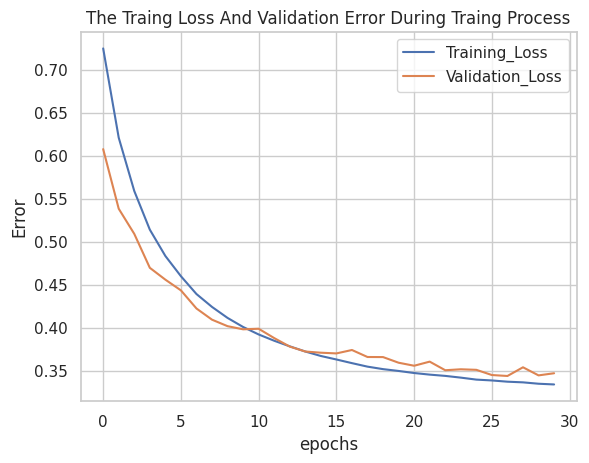

In [165]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('The Traing Loss And Validation Error During Traing Process')
plt.ylabel('Error')
plt.xlabel('epochs')
plt.legend(['Training_Loss' ,'Validation_Loss'] , loc='best')
plt.show()

In [166]:

# Predict and evaluate
y_pred = model.predict(X_test_processed)
y_pred_exp = np.expm1(y_pred)  # Reverse log-transform
y_test_exp = np.expm1(y_test)

1026/1026 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [169]:
# Combine predictions with actual values for comparison
results = test_data.copy()
results['predicted_num_orders'] = y_pred_exp.flatten()
results['actual_num_orders'] = y_test_exp.values
print(results[['week', 'actual_num_orders', 'predicted_num_orders']])

        week  actual_num_orders  predicted_num_orders
426858   136              649.0            307.116028
426843   136               67.0             36.543186
426828   136               94.0            224.534958
426941   136              135.0            109.294868
426894   136              244.0             94.336082
...      ...                ...                   ...
456487   145               69.0            115.801079
456463   145              581.0            370.670563
456531   145              540.0            275.548035
456534   145               26.0             23.602879
456332   145               27.0             33.669434

[32821 rows x 3 columns]


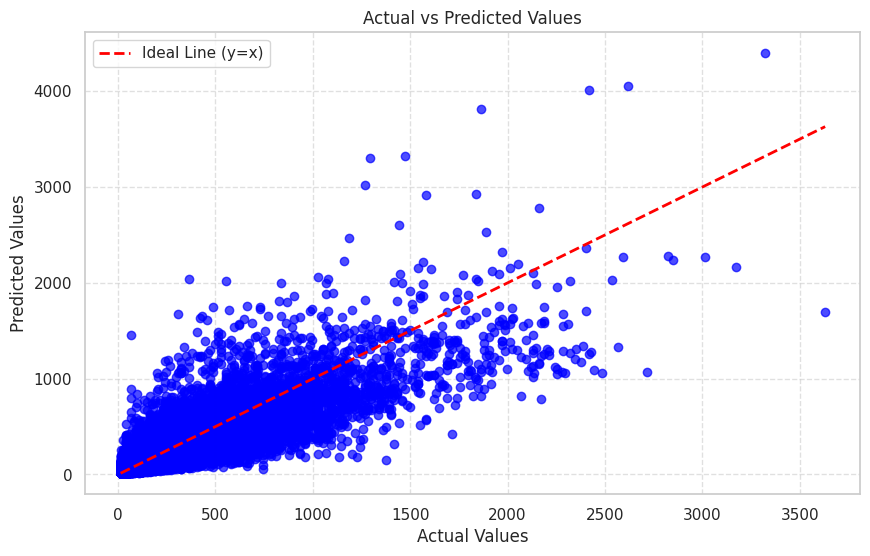

In [170]:
import matplotlib.pyplot as plt

# Dummy data for actual and predicted values
# Replace these lists with your actual data for 'actual_num_orders' and 'predicted_num_orders'
actual_values = results['actual_num_orders']
predicted_values = results['predicted_num_orders']

# Scatter plot for actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(actual_values, predicted_values, alpha=0.7, color='blue')
plt.plot([min(actual_values), max(actual_values)], [min(actual_values), max(actual_values)],
         color='red', linestyle='--', linewidth=2, label="Ideal Line (y=x)")
plt.title("Actual vs Predicted Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()
